In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import time

In [2]:
file_path = "Parameters_6_Fitted_FC_TmpDpn_RD_StrRt0.1.csv"
data = pd.read_csv(file_path)
filtered_data = data[data['PEEQ'] <= 3]
PEEQ = filtered_data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 200)

Parameter: C1, R^2: 0.4837, Coefficients: [ 0.23989825 -1.50440113  2.59622221  2.45005829 -1.17626506  0.02066127]
Parameter: C2, R^2: 0.7119, Coefficients: [-9.48652013e-04  2.90396992e+00  2.55410785e-02  9.56295796e-03
 -8.69789615e-05  1.60470607e+00]
Parameter: C3, R^2: 0.6000, Coefficients: [ 7.33571504e-01 -1.64678539e+01  1.96968016e+02 -1.14758512e+03
  1.14873303e+03  1.71595553e-01]
Parameter: C4, R^2: 0.7959, Coefficients: [-1.98116291 -3.3836281   3.76977398  0.10542819  0.65093904  0.92987634]
Parameter: C5, R^2: 0.8572, Coefficients: [ 10.55772353 -49.86118921 568.33012741 -27.4366773   -7.72053912
   1.        ]


/tmp/ipykernel_392998/3815664332.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(lambda x, a, b, c, d, e, f: combined_fit(x, a, b, c, d, e, f, parameter), x, y, maxfev=200000)
/root/coe-final-project/myenv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Parameter: C6, R^2: 0.7539, Coefficients: [ 1.03925115e+03  2.07422405e+04  3.56823992e+05  2.99223237e+06
 -2.99216652e+06 -1.19109286e-01]


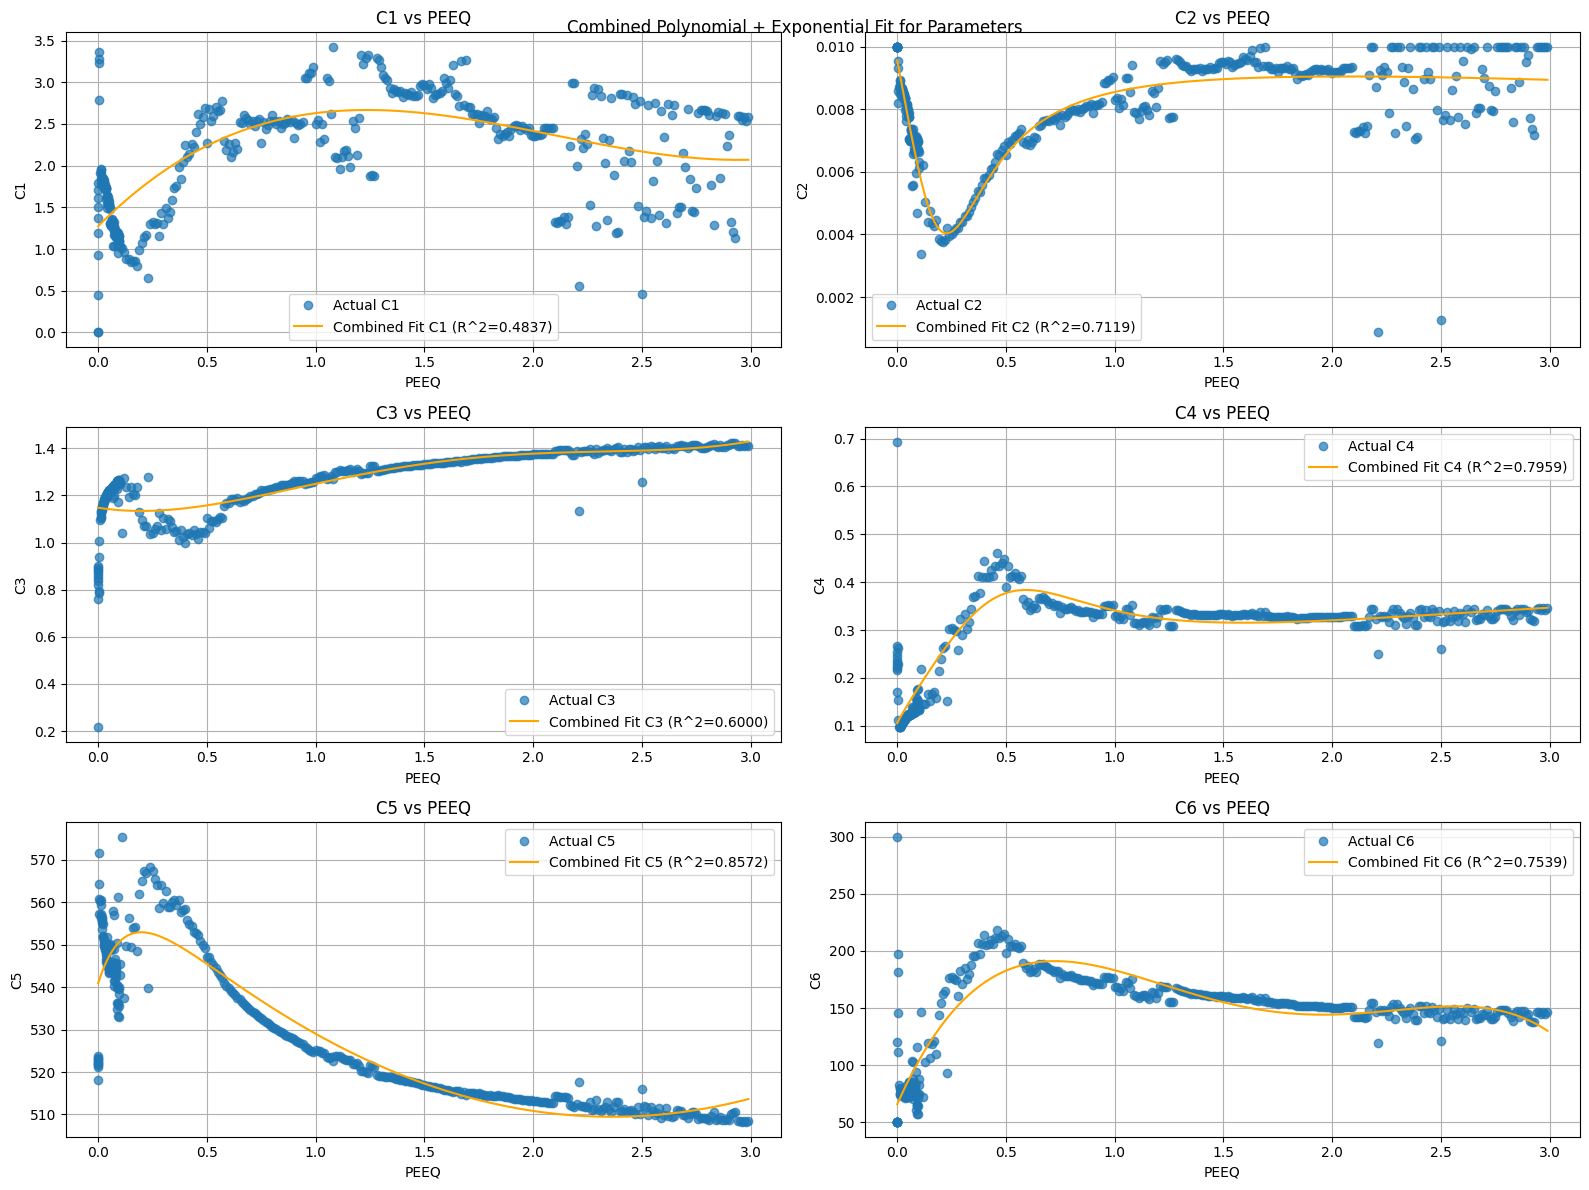

In [3]:
df_para_fit = pd.DataFrame(PEEQ, columns=["PEEQ"])

# Define the combined polynomial + exponential function
def combined_fit(x, a, b, c, d, e, f, C):
    if C == 'C4'or C == 'C2' :
        return (a*x)/(x**b + c) + d + e * (x**f)
    elif C == 'C5' : 
        return a * (x**2) + b * x + c + d * np.exp(e * x)
    else :
        return a * (x**3) + b * (x**2) + c * x + d + e * np.exp(-f * x)

# Function to fit the combined model and calculate R^2 score
def fit_combined_model(data, parameter):
    x = data['PEEQ']
    y = data[parameter]
    
    # Fit the combined model
    try:
        popt, _ = curve_fit(lambda x, a, b, c, d, e, f: combined_fit(x, a, b, c, d, e, f, parameter), x, y, maxfev=200000)
        y_pred = combined_fit(x, *popt, parameter)
        r2 = r2_score(y, y_pred)
    except RuntimeError:
        popt = None
        y_pred = None
        r2 = -np.inf  # Indicate failed fit
    
    if popt is not None:
        print(f'Parameter: {parameter}, R^2: {r2:.4f}, Coefficients: {popt}')
    else:
        print(f'Parameter: {parameter} - Fit failed')
    
    return popt, y_pred, r2

# List of parameters to fit
parameters = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# Fit models and plot results
plt.figure(figsize=(16, 12))

for i, param in enumerate(parameters):
    popt, y_pred, r2 = fit_combined_model(data, param)
    x = data['PEEQ']
    y_actual = data[param]
    df_para_fit[param] = y_pred
    
    plt.subplot(3, 2, i + 1)
    plt.plot(x, y_actual, 'o', label=f'Actual {param}', alpha=0.7)
    
    # Plot fitted combined model if successful
    if y_pred is not None:
        plt.plot(x, y_pred, '-', color='orange', label=f'Combined Fit {param} (R^2={r2:.4f})')
    
    plt.xlabel('PEEQ')
    plt.ylabel(param)
    plt.title(f'{param} vs PEEQ')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Combined Polynomial + Exponential Fit for Parameters')
plt.show()

In [4]:
df_para_fit.to_csv('para_fit_results_0.0001.csv', index=False)
# Assuming the file is one level up from the current directory
file_path = "Fitted_FC_TmpDpn_RD_StrRt0.0001_ref.csv"
stress_data = pd.read_csv(file_path)

fitted_para = pd.read_csv('para_fit_results_0.0001.csv')

[1.36251004 0.72599133 0.4815976  0.72841393 0.82948758 0.82191691
 0.57495016]


/tmp/ipykernel_392998/2394559744.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))


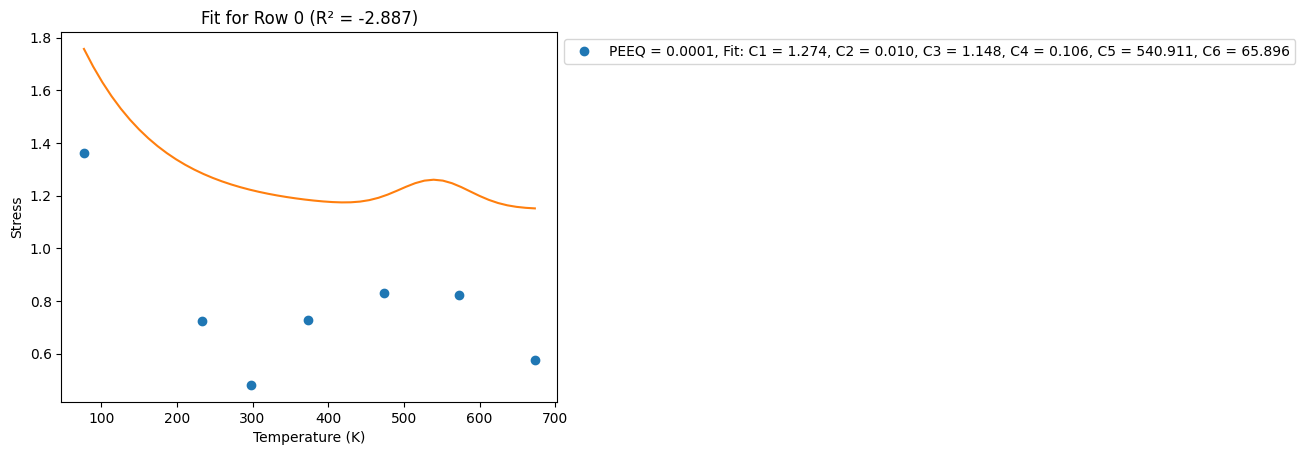

[1.39661004 0.76880383 0.73903496 0.81717545 0.89282197 0.86740631
 0.73184152]


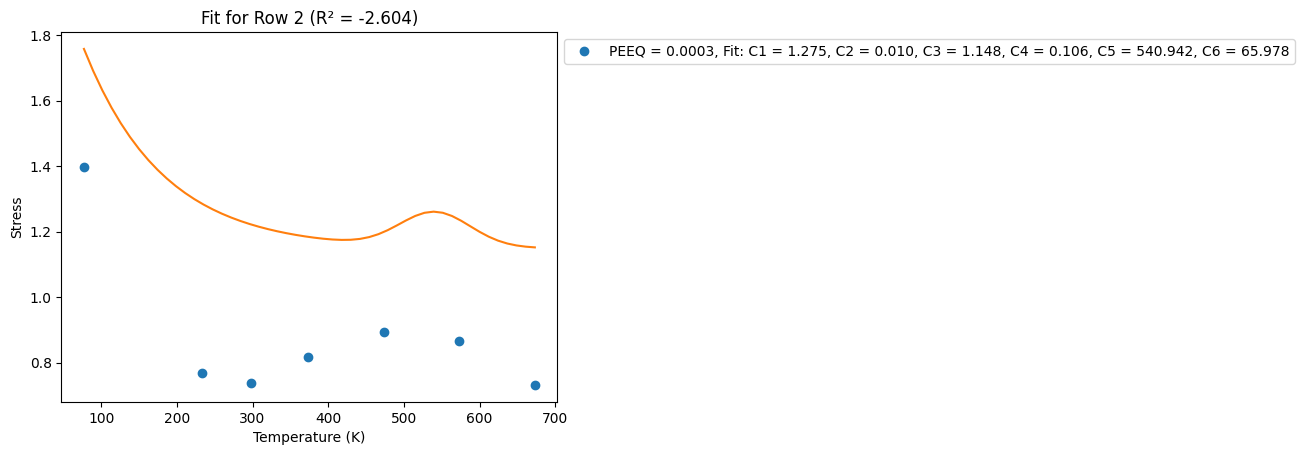

[1.4194923  0.80649924 0.83371755 0.86048538 0.93187057 0.8998833
 0.78170283]


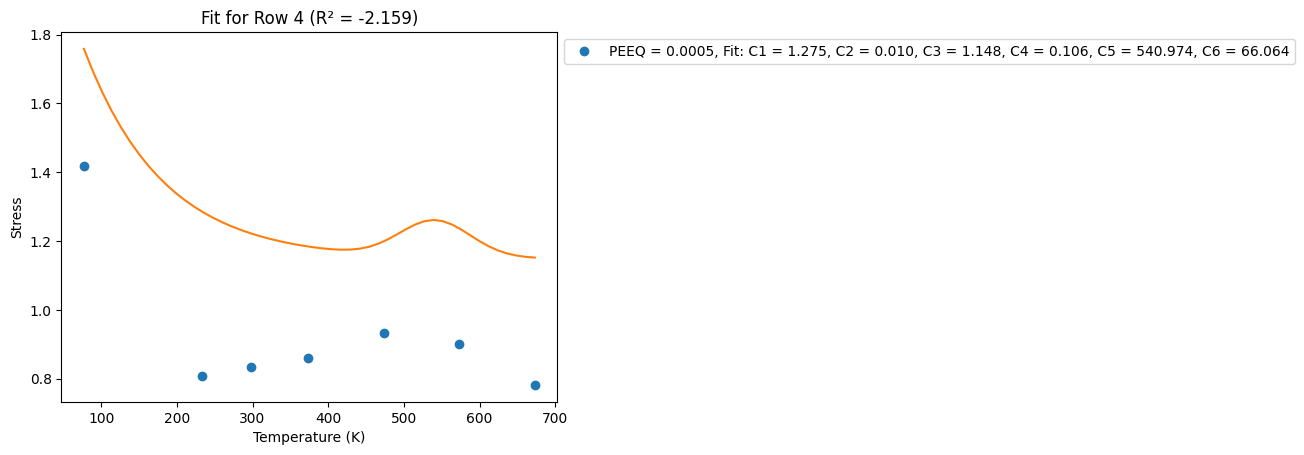

[1.43798219 0.83988294 0.87162077 0.88972207 0.95852643 0.92485234
 0.81279316]


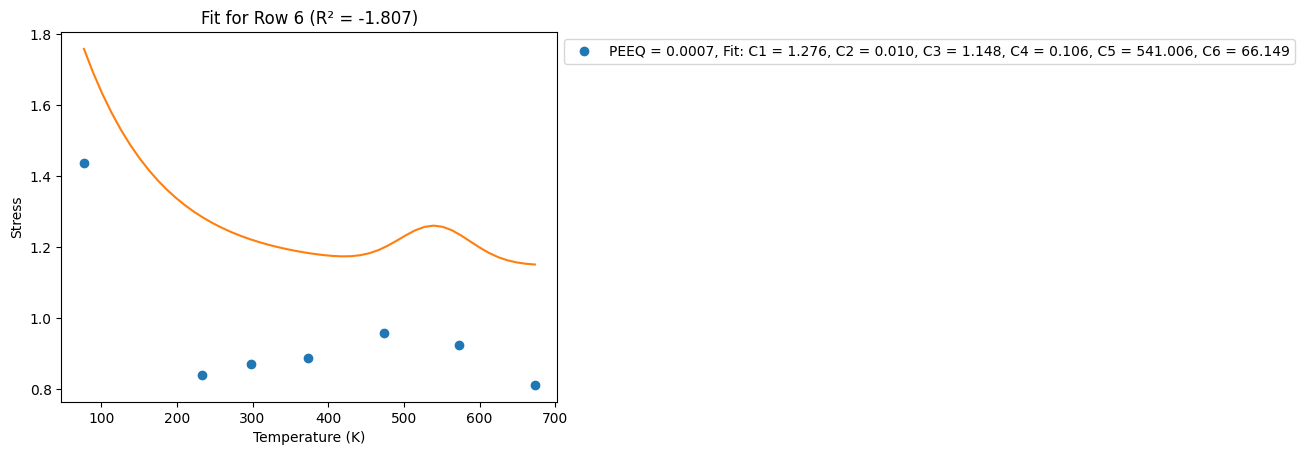

[1.45390356 0.86960473 0.89948635 0.91198087 0.97851338 0.94500133
 0.83565583]


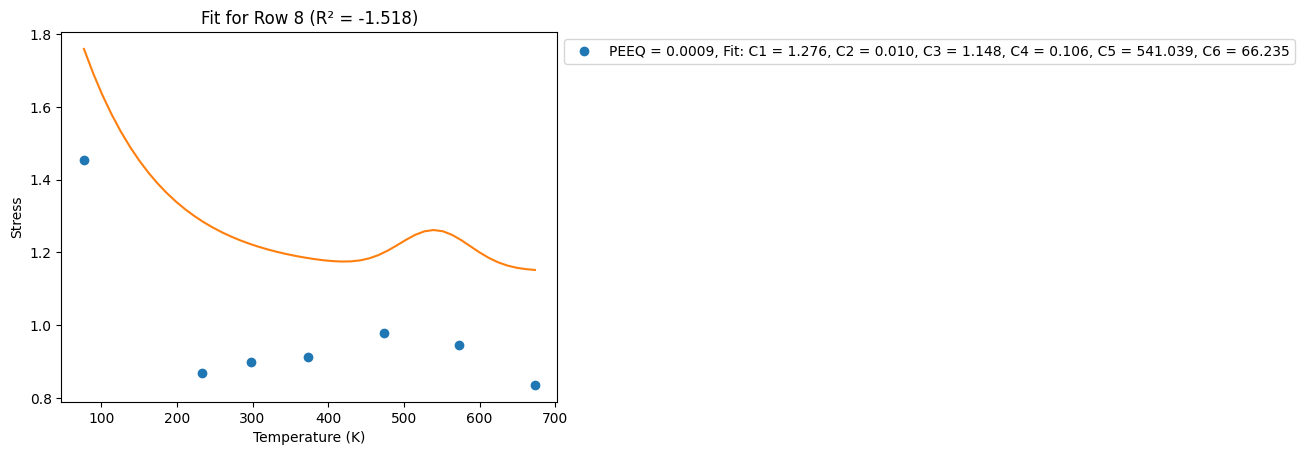

[1.46805583 0.89619448 0.92251927 0.93004991 0.99464934 0.96183385
 0.85385738]


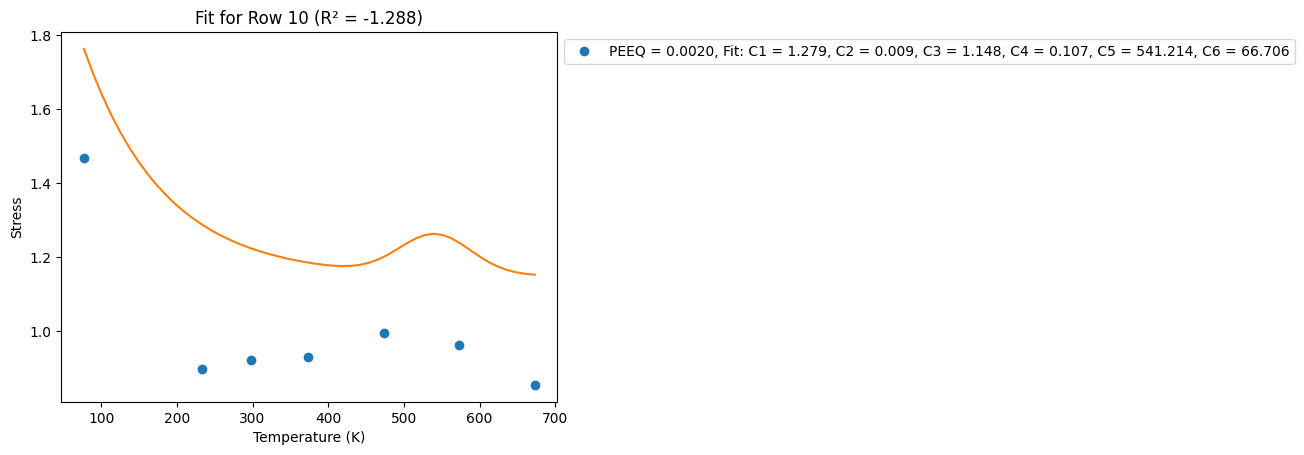

[1.56284214 1.05834586 1.04711581 1.02881016 1.08750725 1.05704757
 0.94991592]


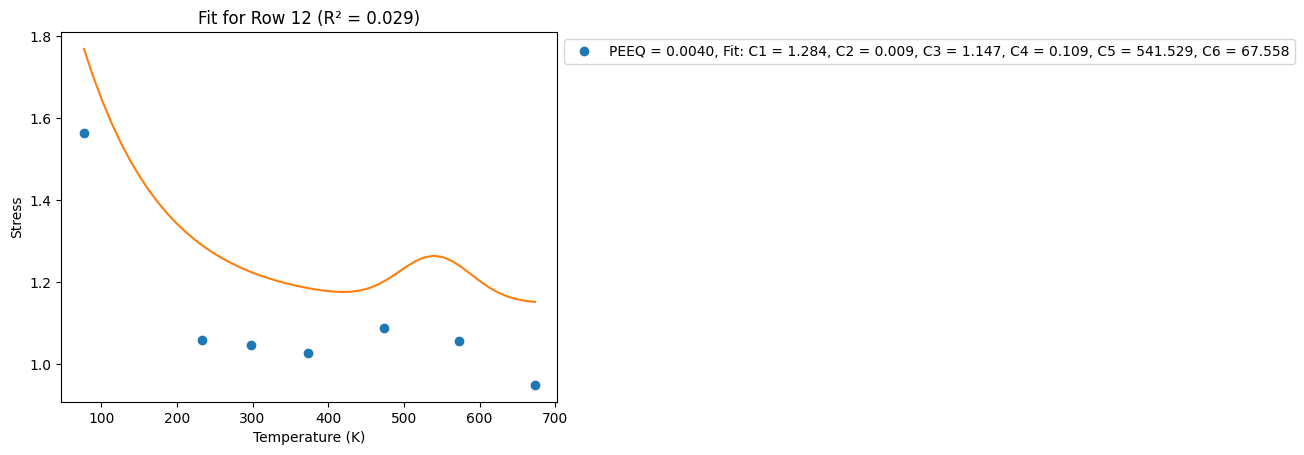

[1.61818012 1.13342744 1.10571589 1.08022565 1.13822488 1.1094487
 0.99792427]


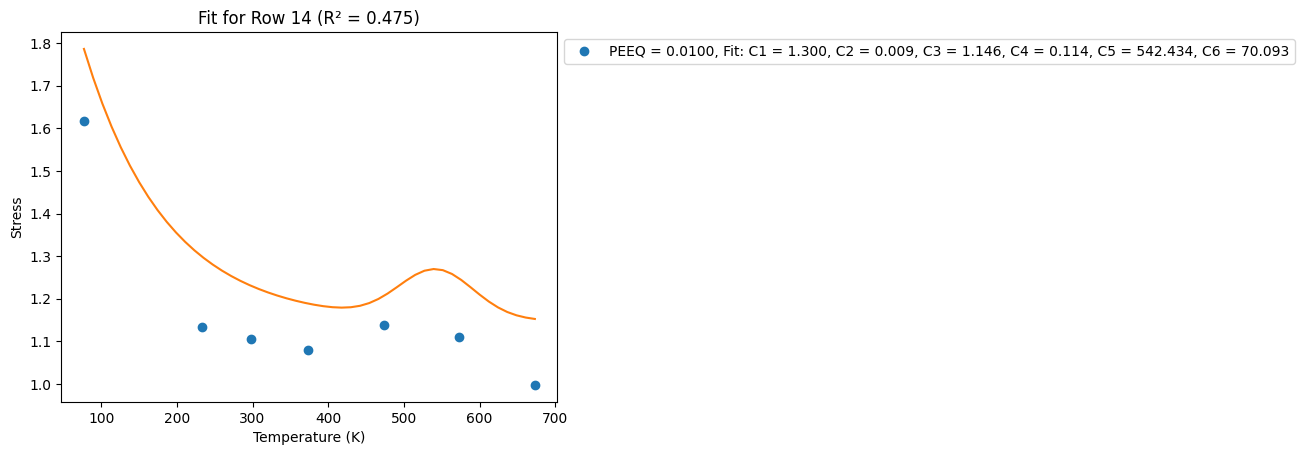

[1.70359577 1.23074727 1.19060952 1.1640928  1.22051093 1.20278589
 1.07190862]


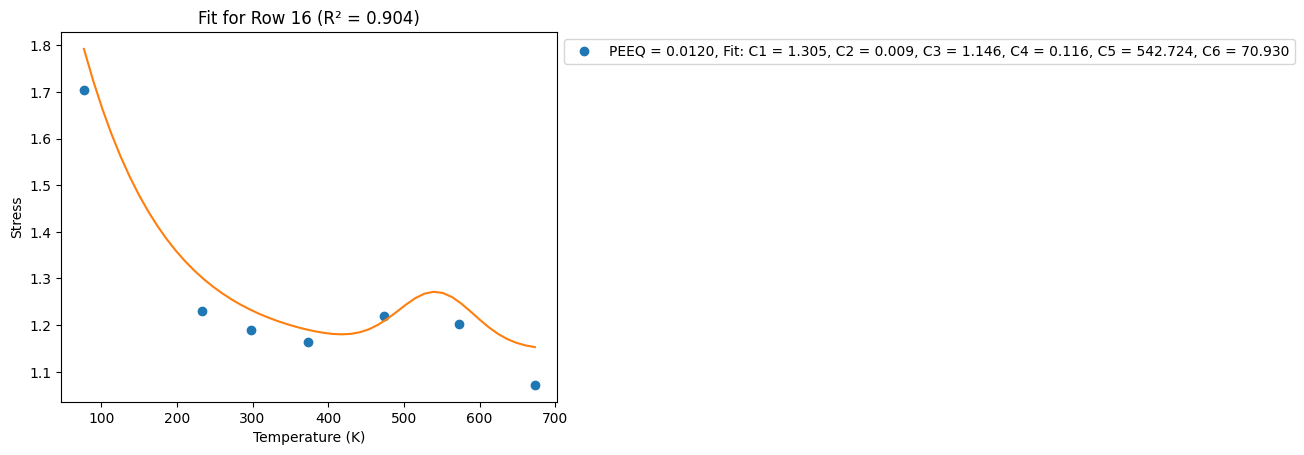

[1.7209566  1.2500482  1.20743061 1.18183176 1.2380837  1.22371858
 1.08681534]


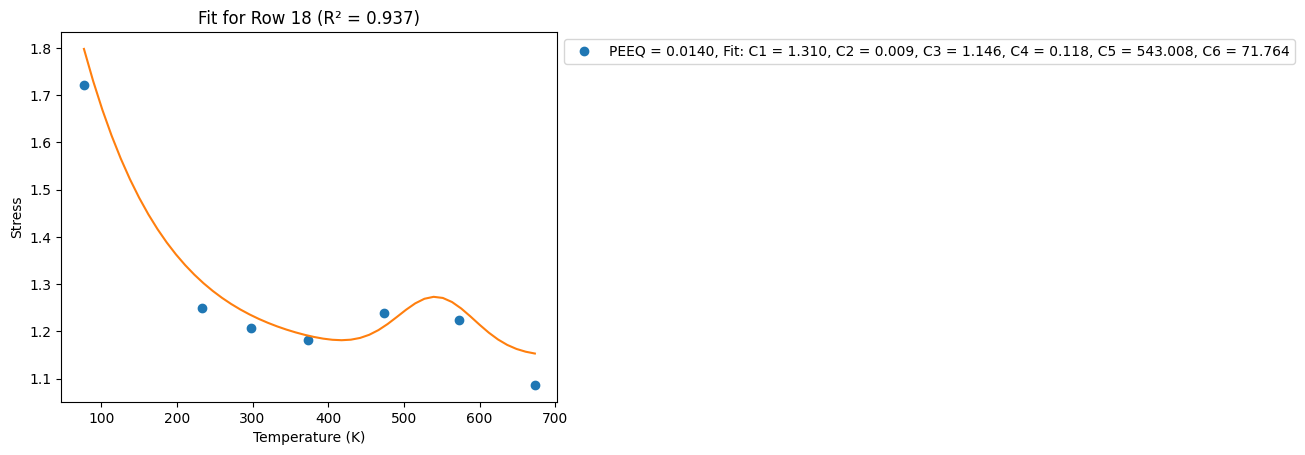

[1.73582767 1.26666909 1.22148435 1.19679938 1.25309879 1.2417217
 1.0992523 ]


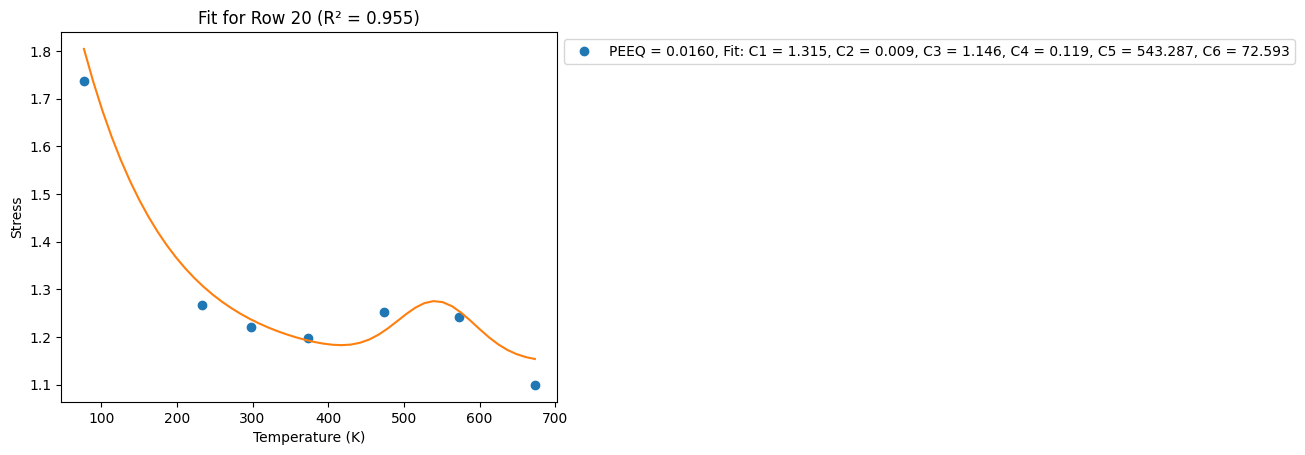

[1.74896644 1.28129345 1.23350345 1.20965377 1.26618549 1.25746864
 1.10987435]


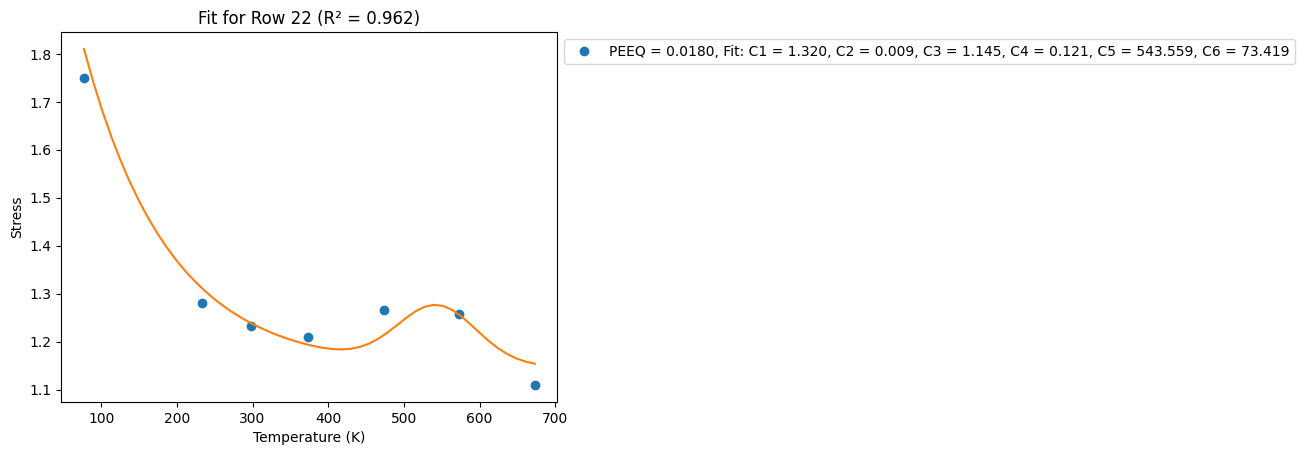

[1.76083908 1.29431158 1.24396878 1.22085456 1.27776823 1.27143681
 1.11912256]


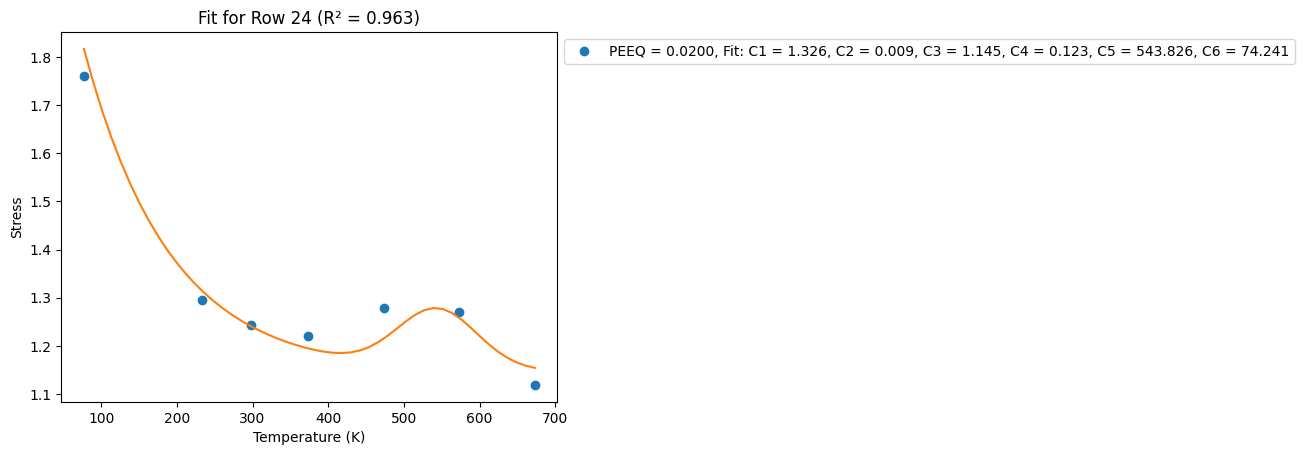

[1.77174337 1.30597541 1.25321201 1.23073566 1.28814648 1.28397296
 1.12730446]


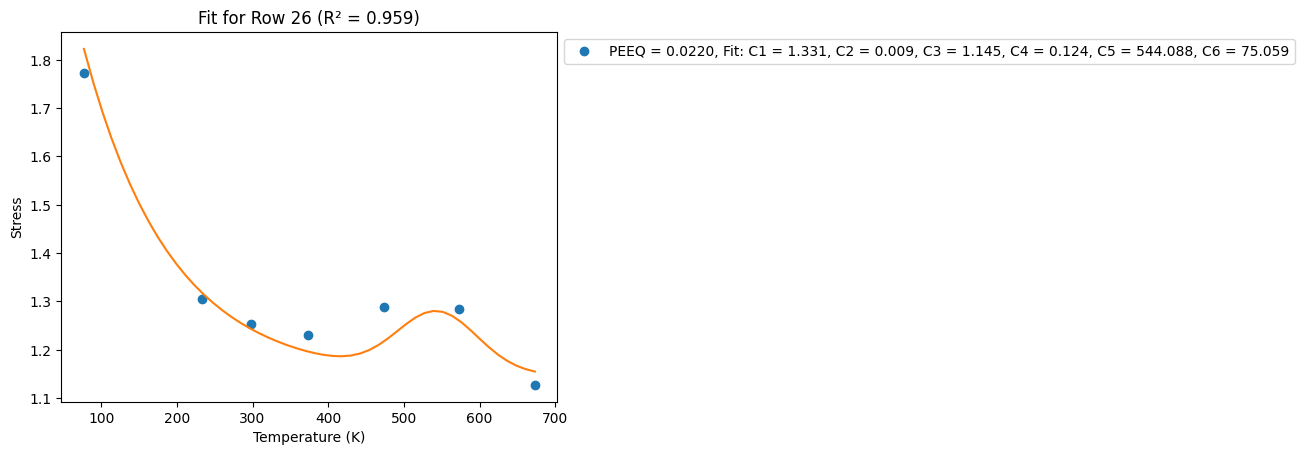

[1.78187729 1.31646755 1.26147097 1.23954674 1.2975392  1.2953347
 1.13464038]


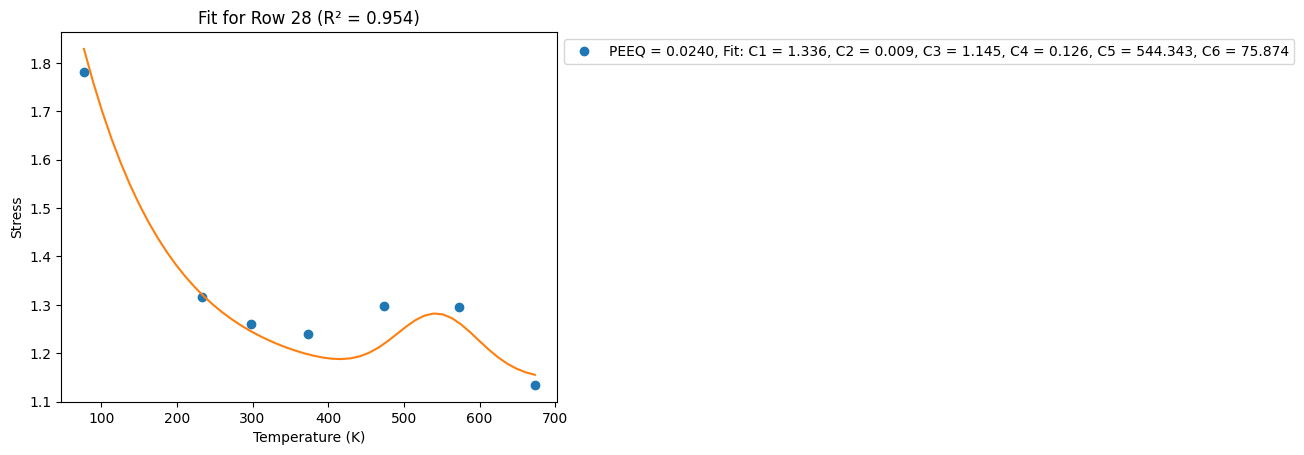

[1.79137792 1.32593264 1.26892168 1.24747859 1.30611125 1.30571746
 1.14129182]


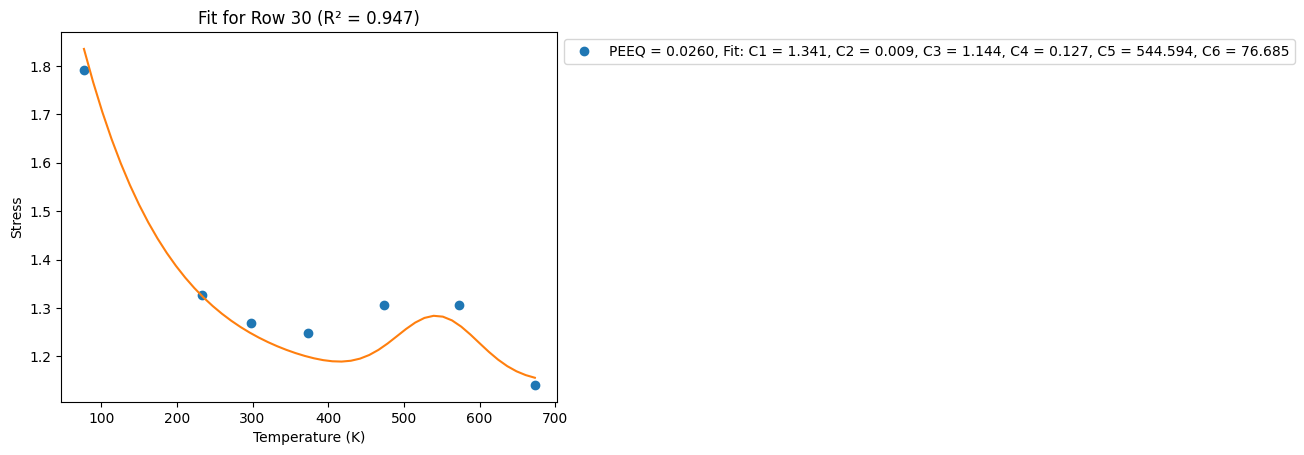

[1.80034418 1.33449189 1.27569786 1.25467951 1.3139897  1.31527247
 1.14737956]


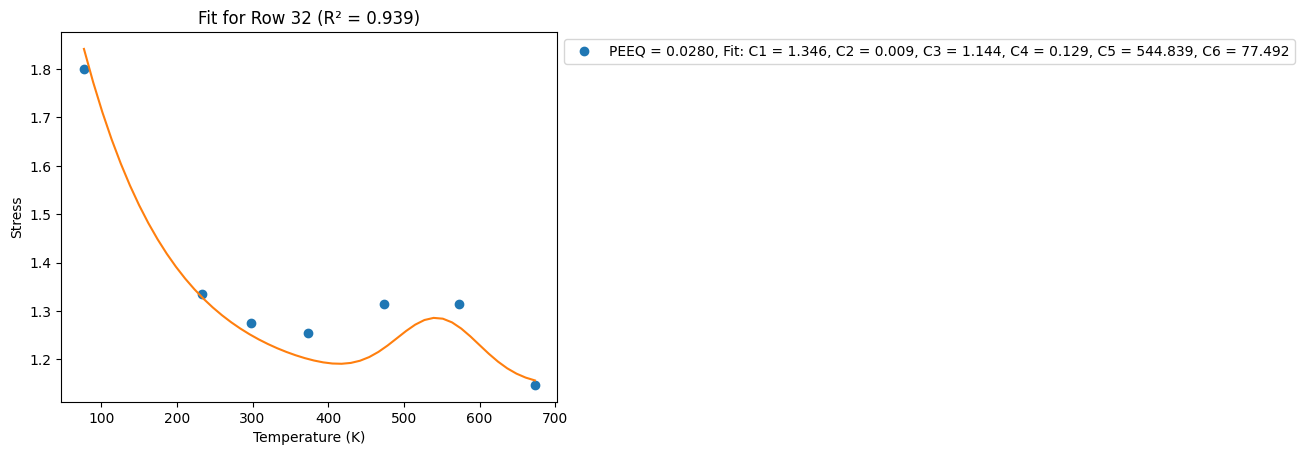

[1.80885015 1.34225003 1.28190331 1.26126641 1.32127459 1.3241189
 1.15299558]


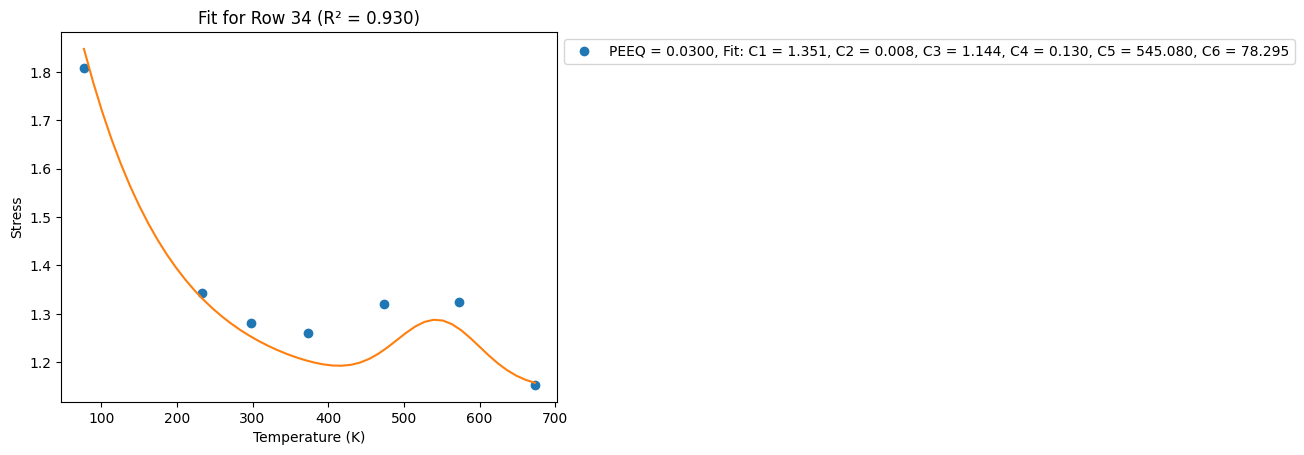

[1.81695326 1.34929878 1.28762013 1.26733252 1.32804598 1.33235217
 1.1582112 ]


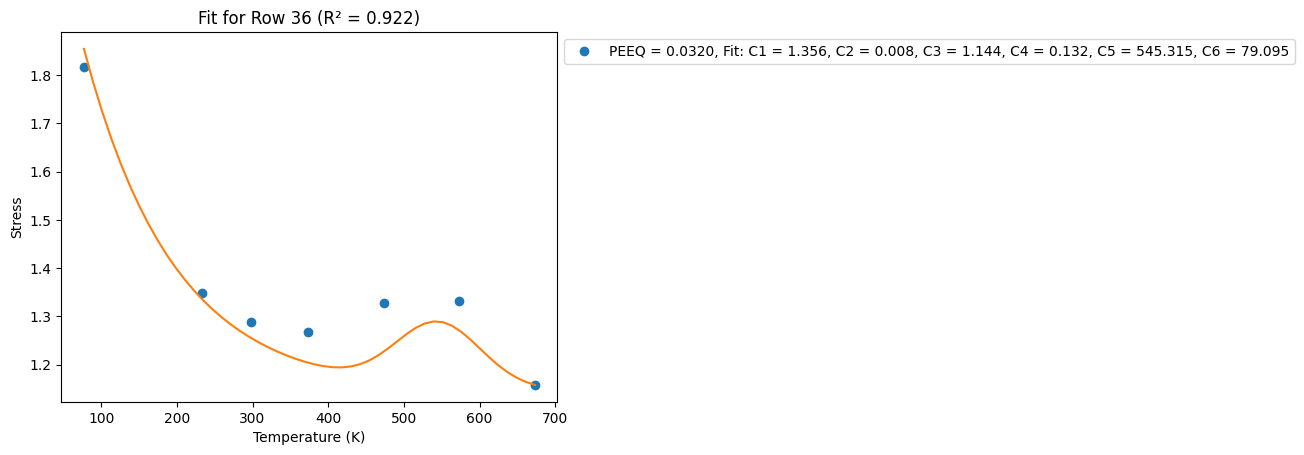

[1.82469928 1.35571892 1.29291433 1.27295295 1.33436895 1.34004984
 1.16308255]


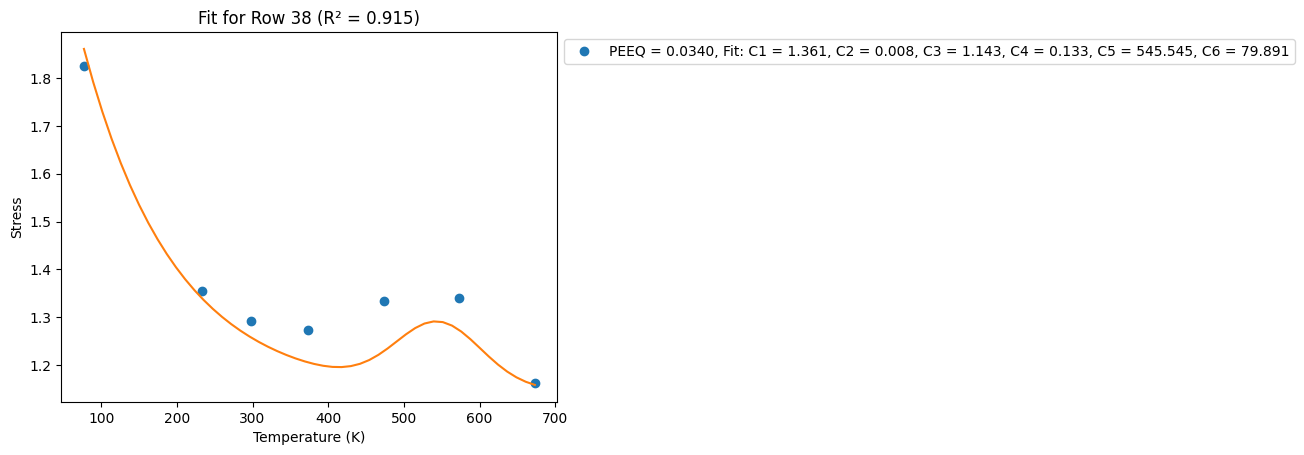

[1.83212564 1.36158161 1.29783969 1.2781888  1.34029708 1.34727573
 1.16765452]


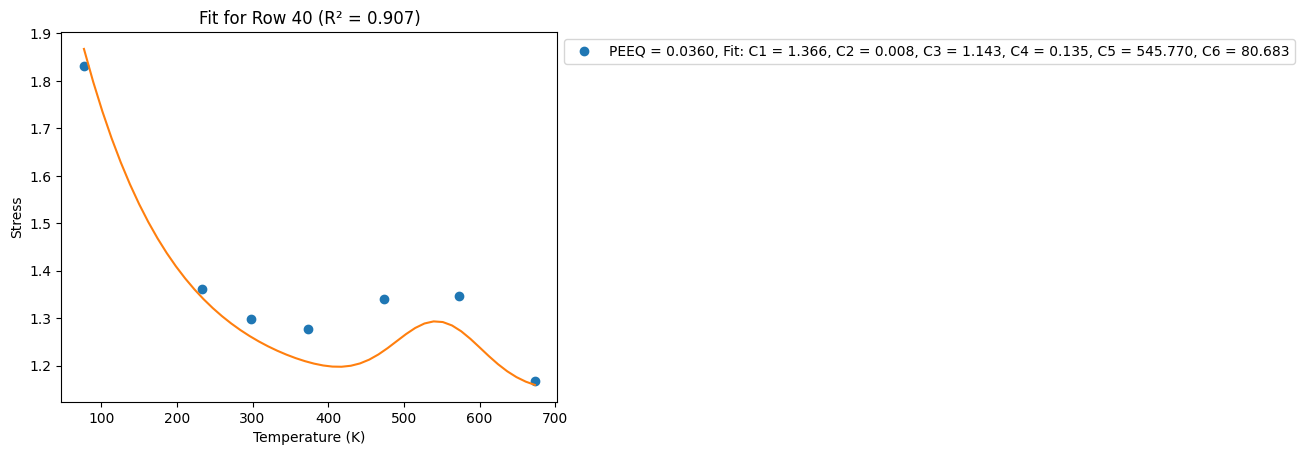

[1.83926348 1.36694947 1.3024406  1.28309014 1.34587501 1.35408299
 1.17196351]


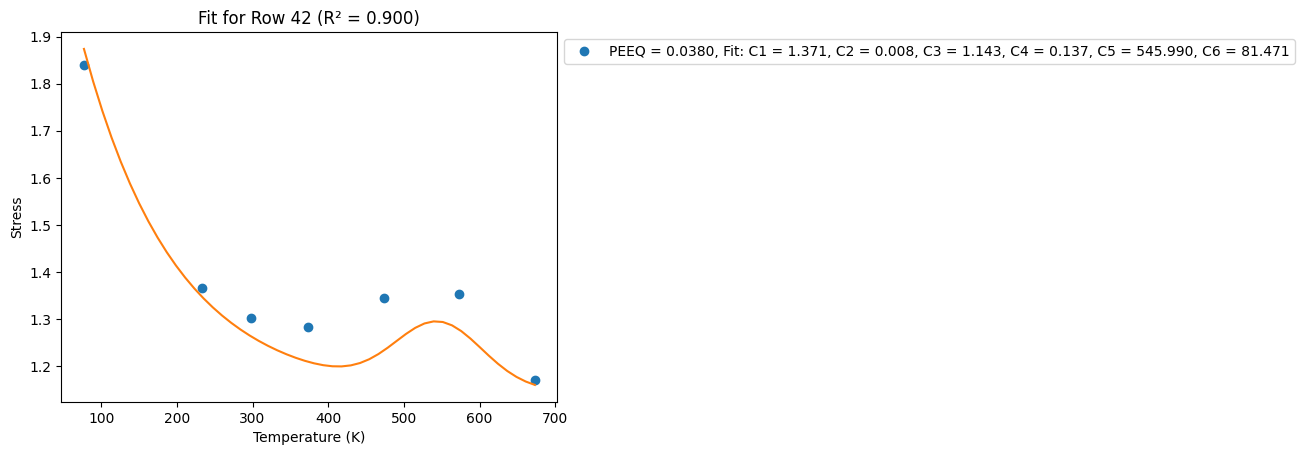

[1.84613916 1.37187752 1.30675409 1.28769837 1.35114031 1.36051634
 1.17603946]


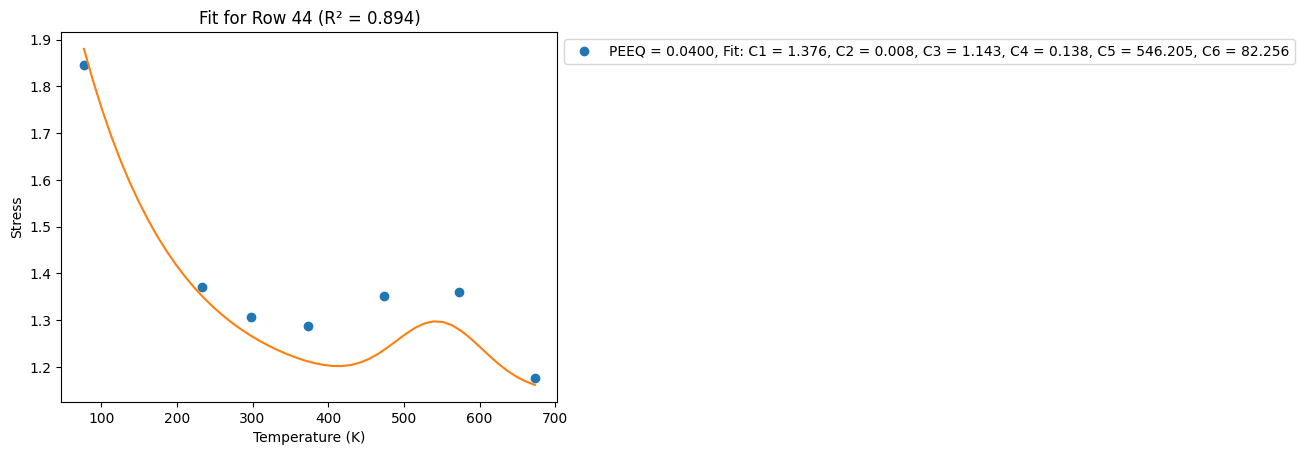

[1.85277529 1.37641401 1.31081134 1.29204793 1.35612486 1.36661375
 1.17990724]


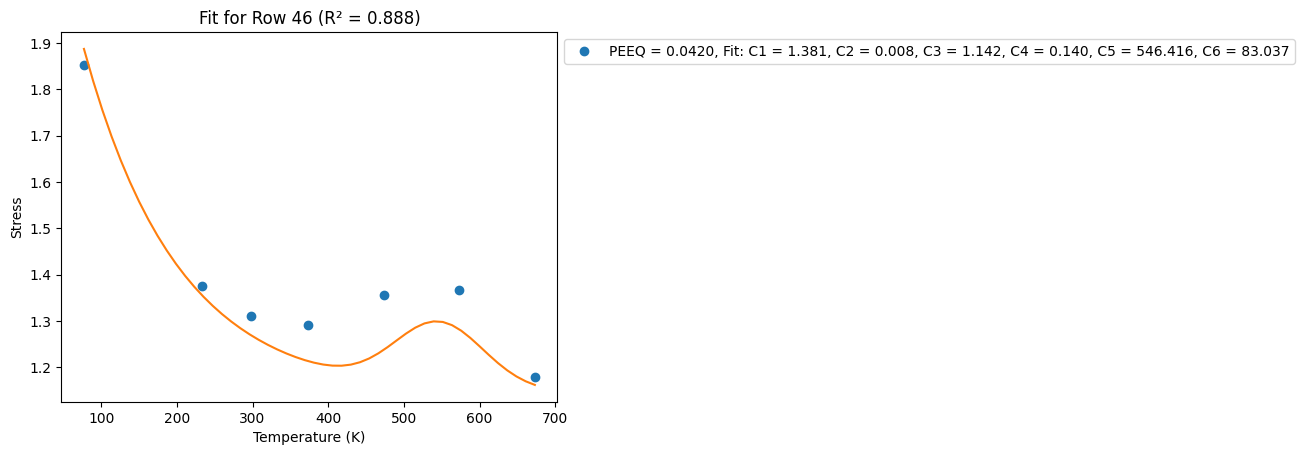

[1.85919142 1.38060124 1.31463887 1.29616773 1.36085598 1.37240774
 1.18358782]


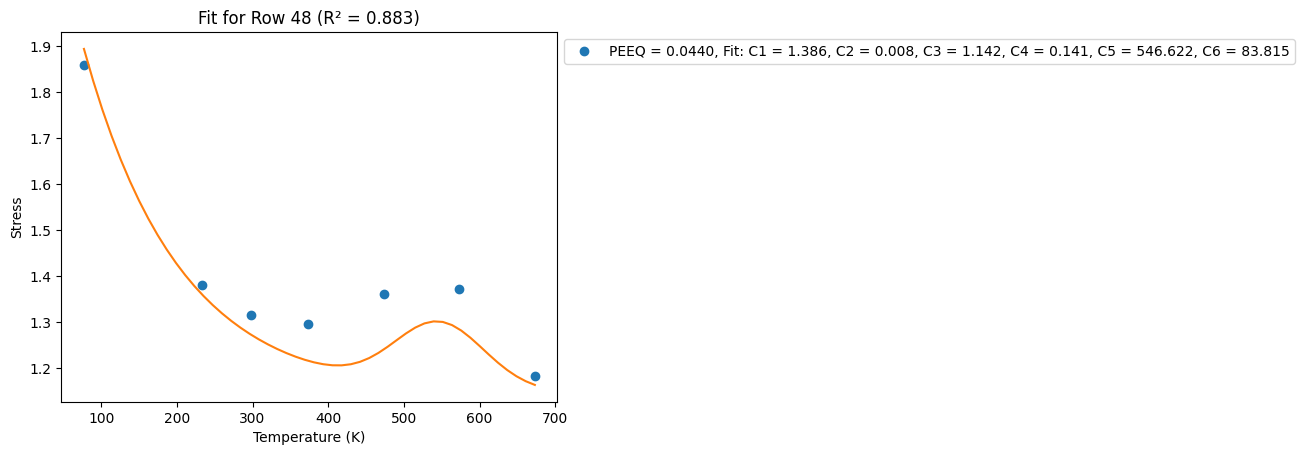

[1.86540465 1.38447627 1.31825937 1.30008214 1.36535724 1.37792634
 1.187099  ]


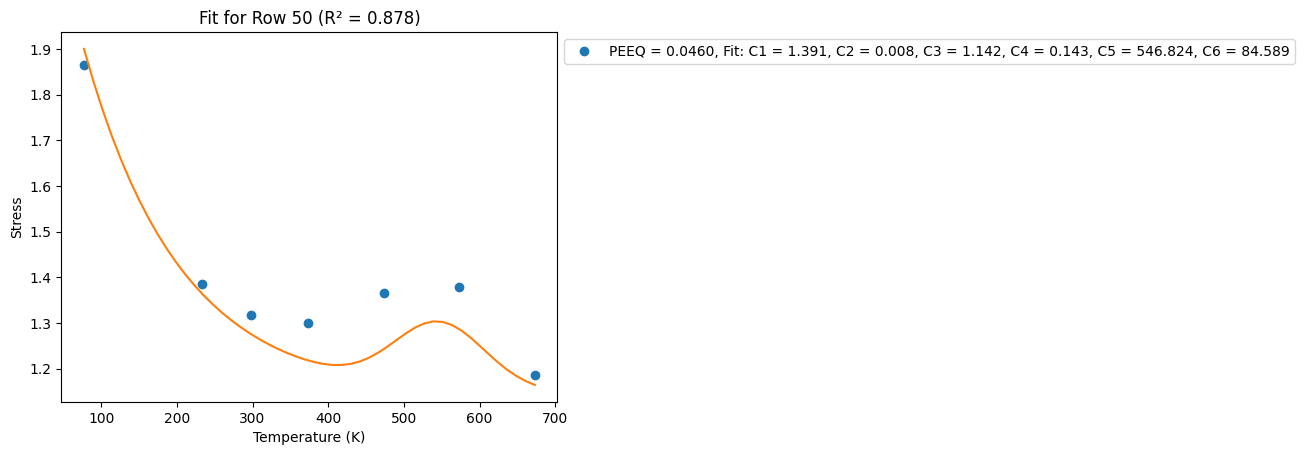

[1.87143004 1.38807155 1.32169241 1.30381188 1.36964908 1.38319392
 1.19045608]


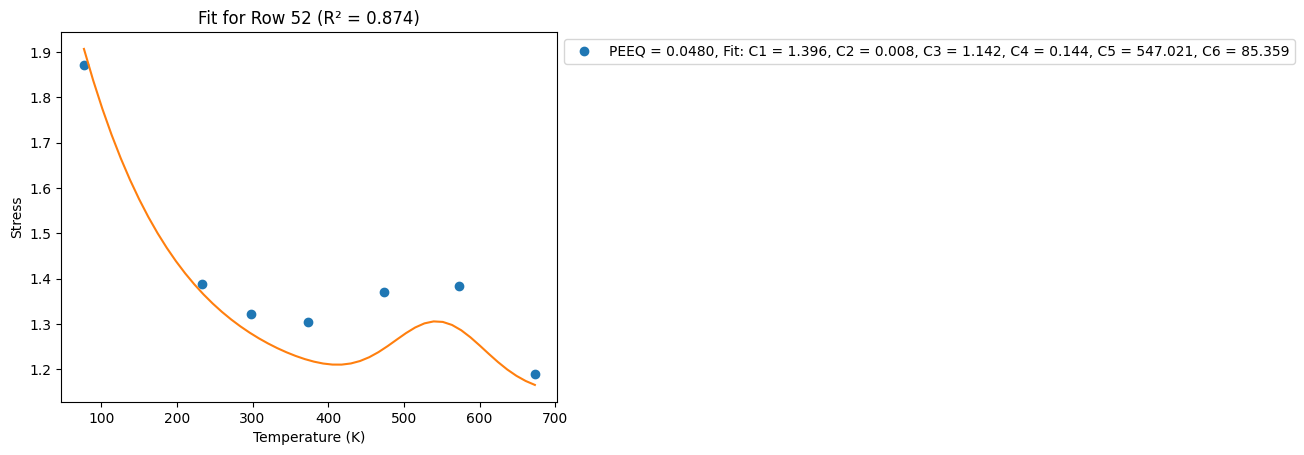

[1.87728091 1.39141556 1.32495501 1.30737468 1.3737494  1.38823177
 1.19367229]


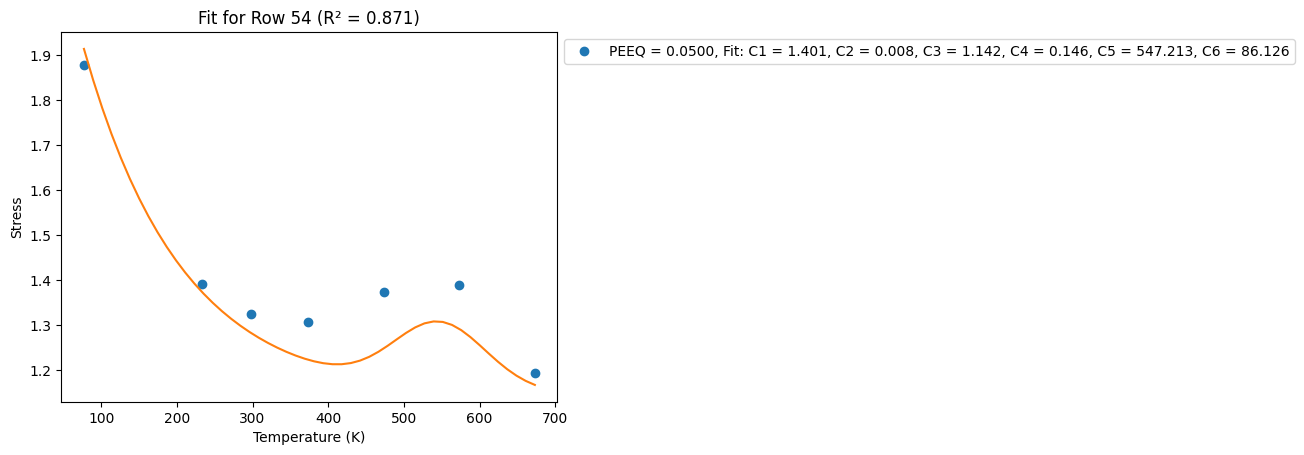

[1.88296914 1.39453326 1.328062   1.31078578 1.37767391 1.3930586
 1.19675917]


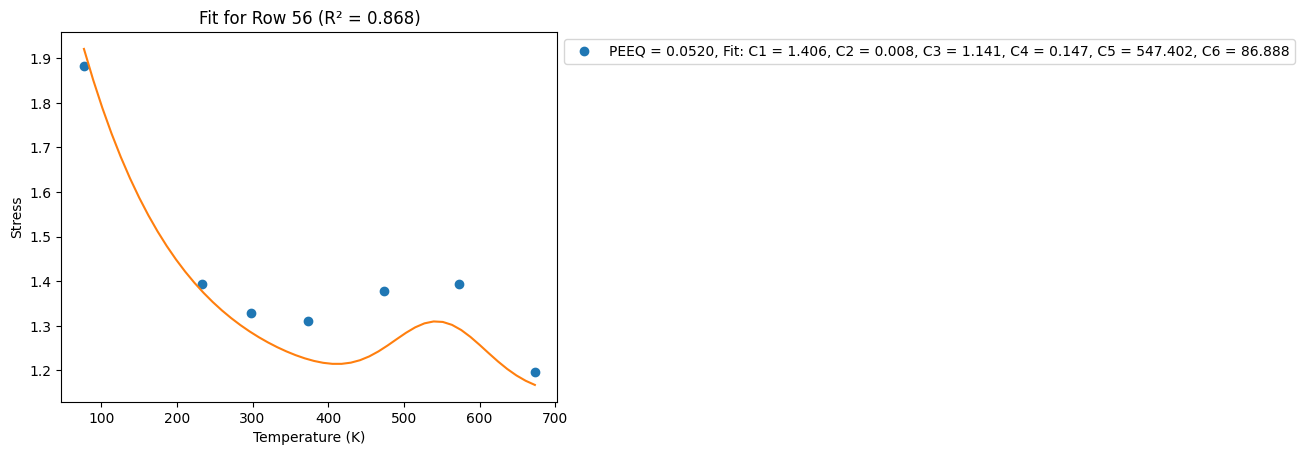

[1.88850538 1.39744661 1.33102644 1.3140584  1.38143649 1.39769095
 1.19972686]


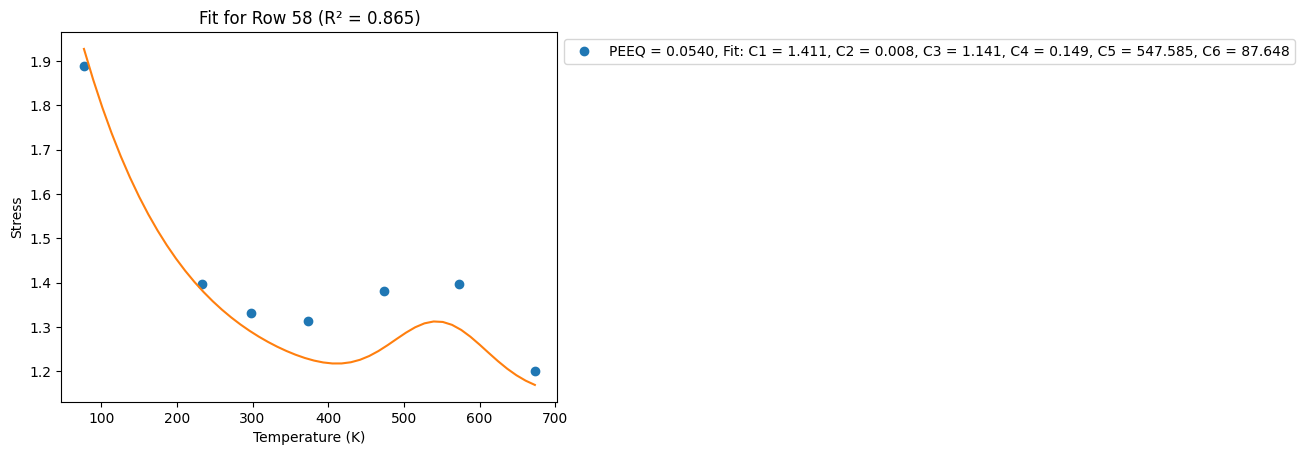

[1.89389919 1.40017497 1.33385983 1.31720403 1.38504945 1.40214349
 1.20258433]


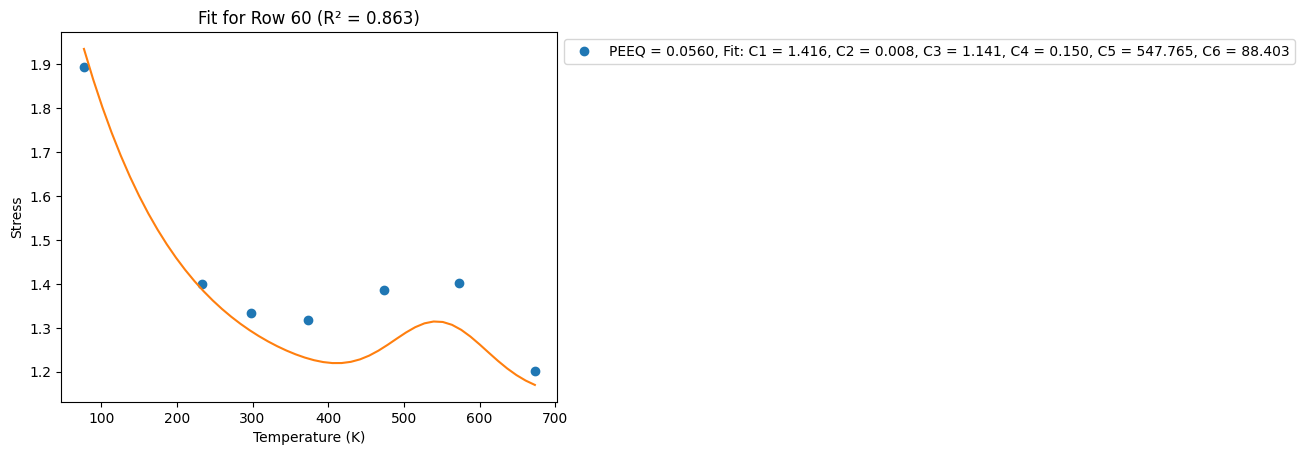

[1.89915921 1.40273538 1.33657238 1.32023275 1.38852379 1.40642931
 1.20533955]


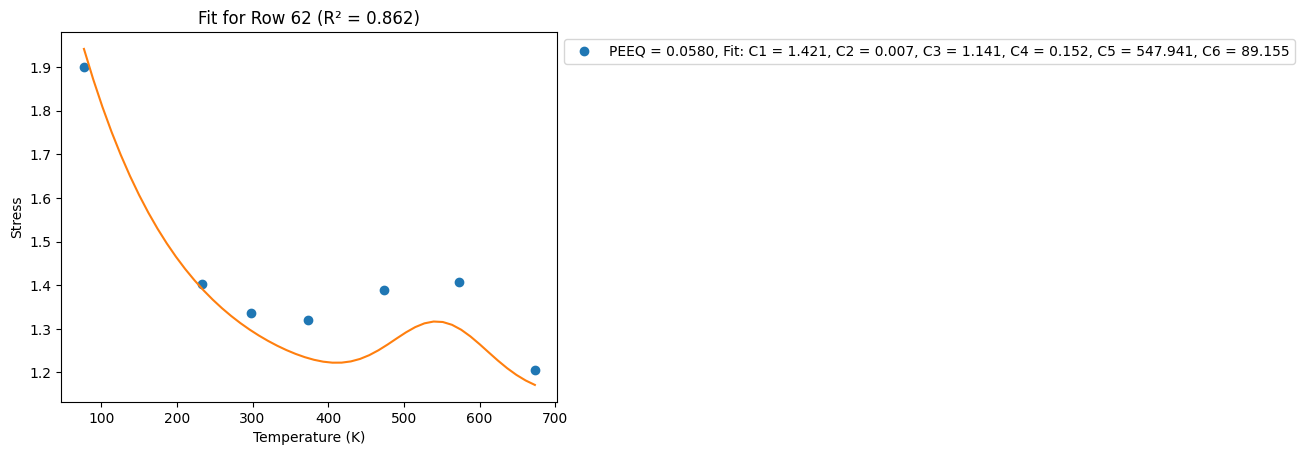

[1.90429329 1.40514294 1.33917319 1.32315342 1.39186932 1.41056014
 1.20799963]


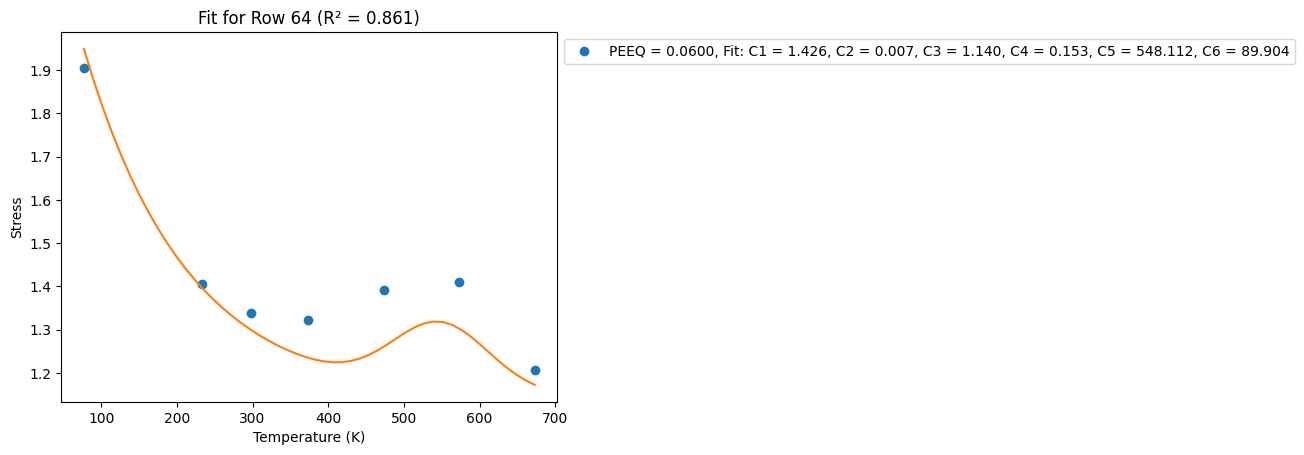

[1.90930854 1.40741103 1.34167038 1.32597389 1.3950949  1.41454653
 1.21057096]


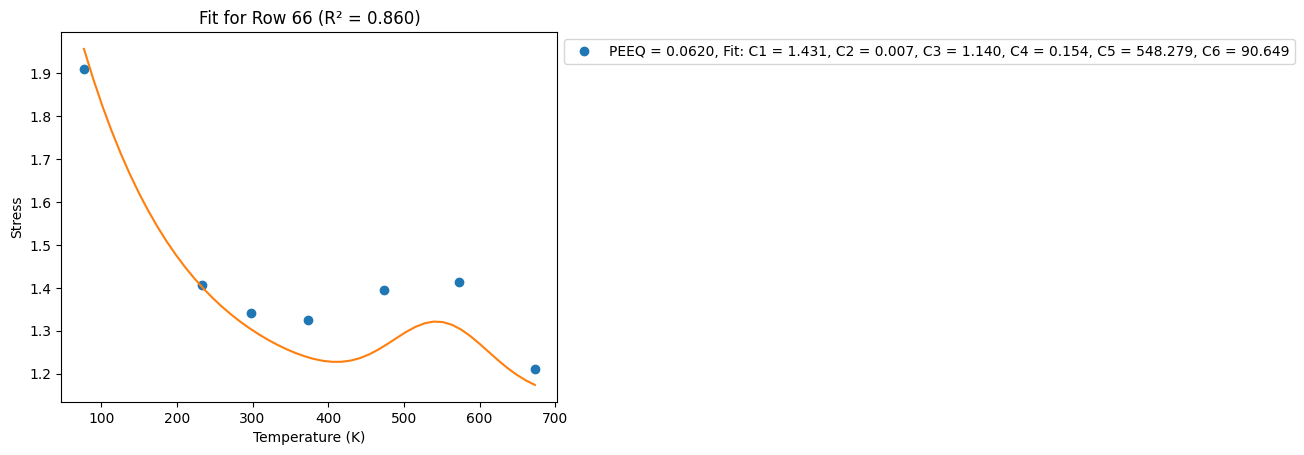

[1.91421149 1.40955154 1.34407126 1.32870116 1.39820849 1.41839797
 1.2130593 ]


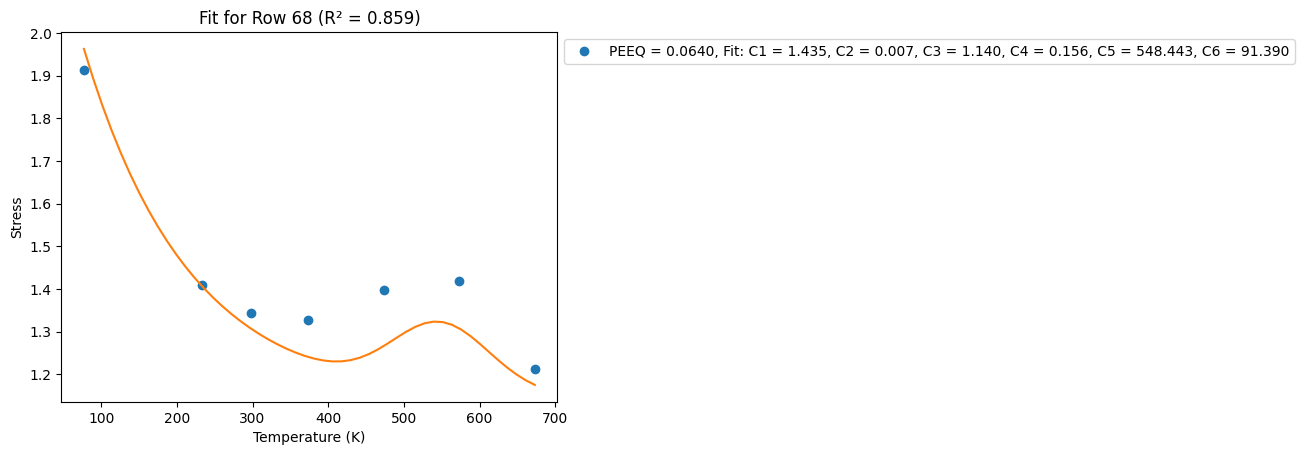

[1.91900808 1.41157508 1.34638239 1.33134145 1.40121729 1.42212307
 1.21546985]


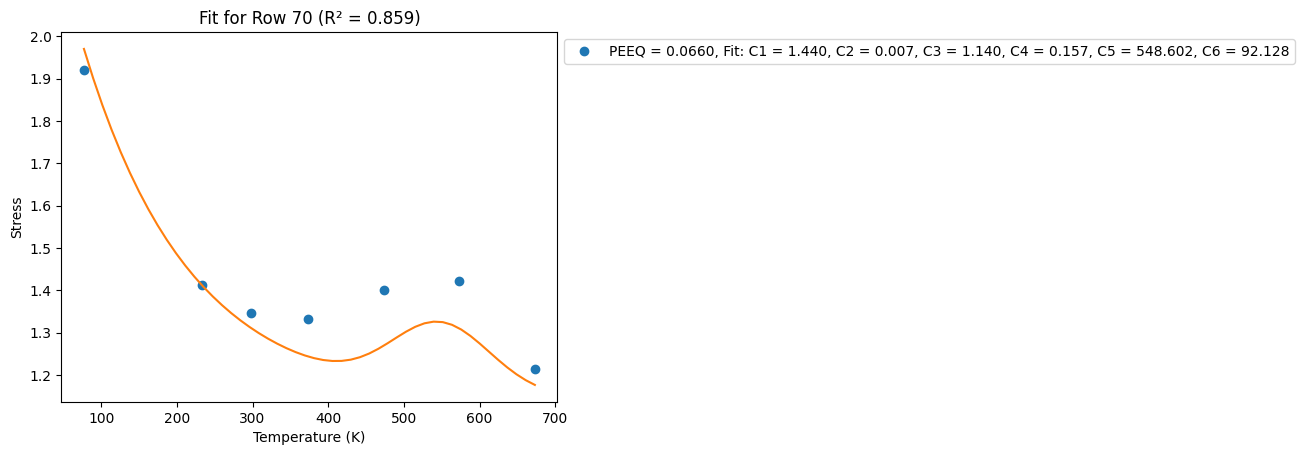

[1.9237038  1.41349109 1.34860974 1.33390038 1.40412786 1.42572966
 1.21780735]


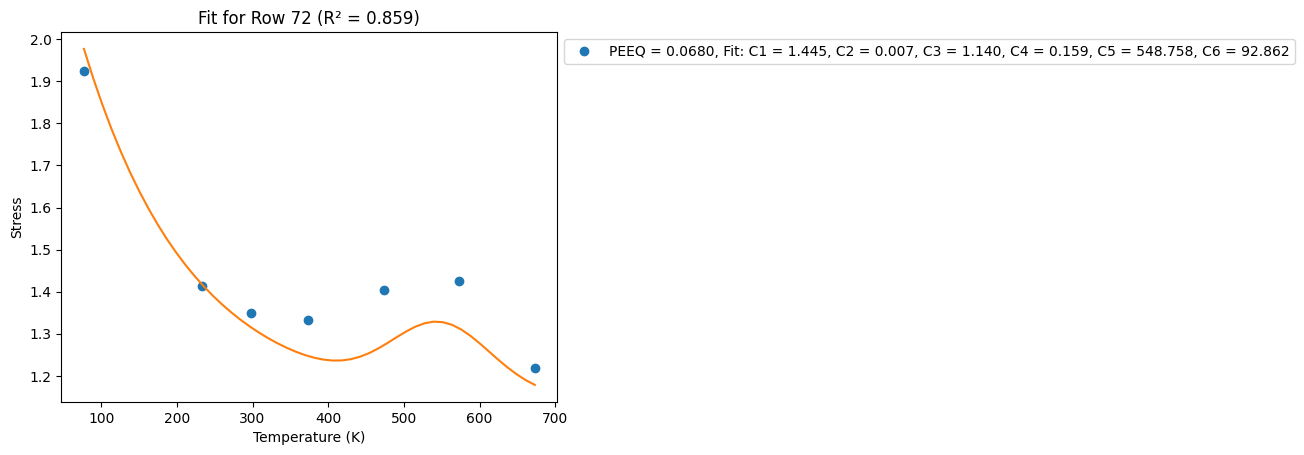

[1.92830366 1.41530807 1.35075867 1.336383   1.40694615 1.42922484
 1.2200761 ]


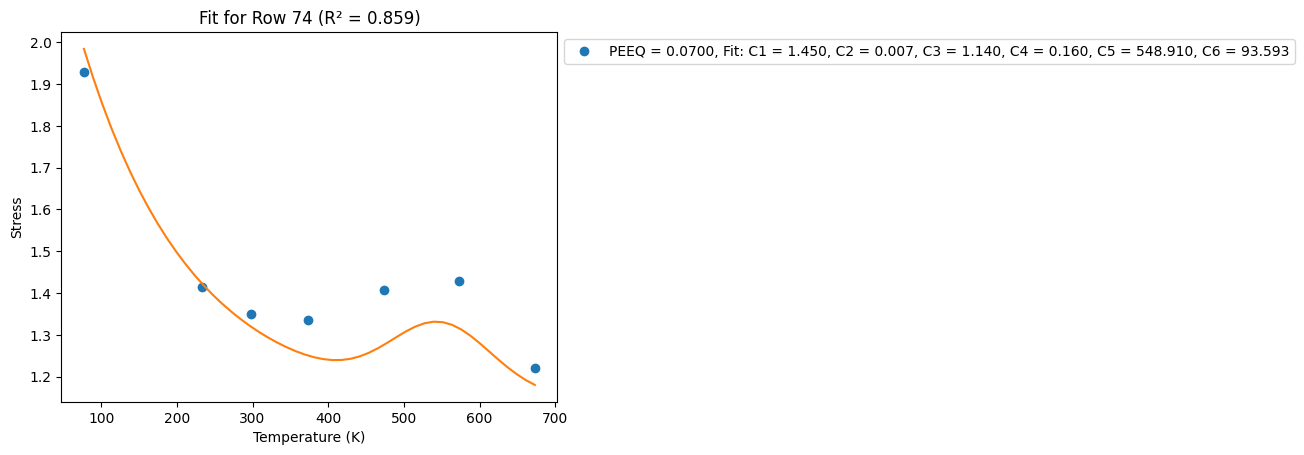

[1.93281234 1.41703362 1.3528341  1.33879387 1.40967761 1.43261513
 1.22228003]


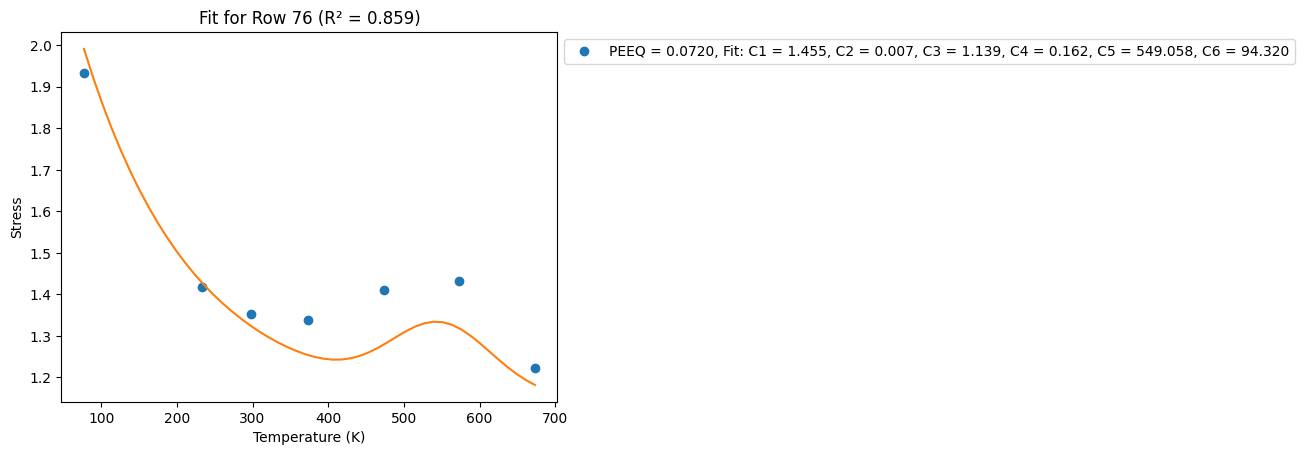

[1.93723411 1.4186746  1.35484049 1.34113716 1.41232721 1.43590647
 1.22442276]


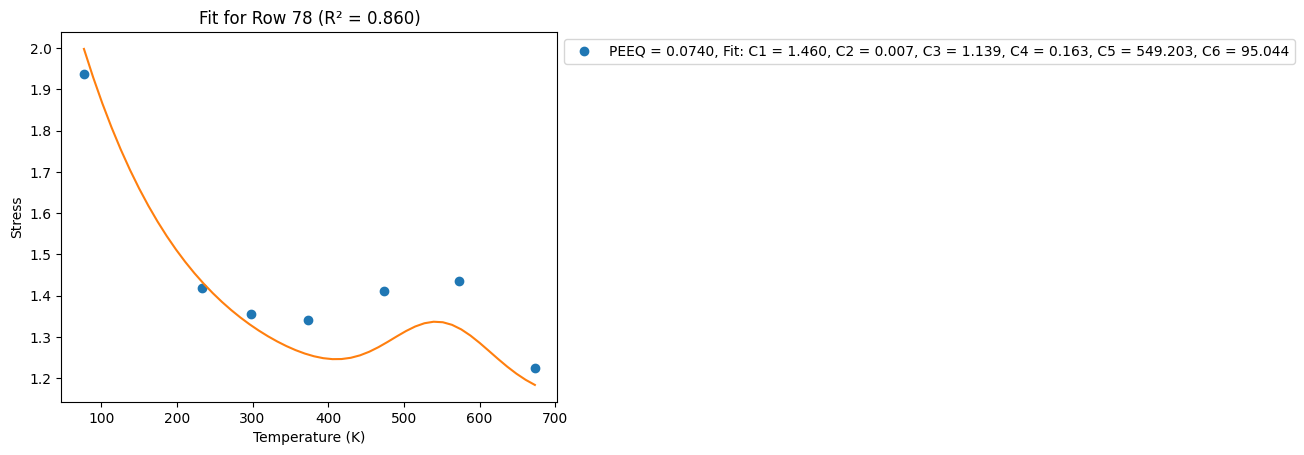

[1.94157297 1.42023719 1.35678191 1.34341665 1.41489952 1.43910433
 1.22650759]


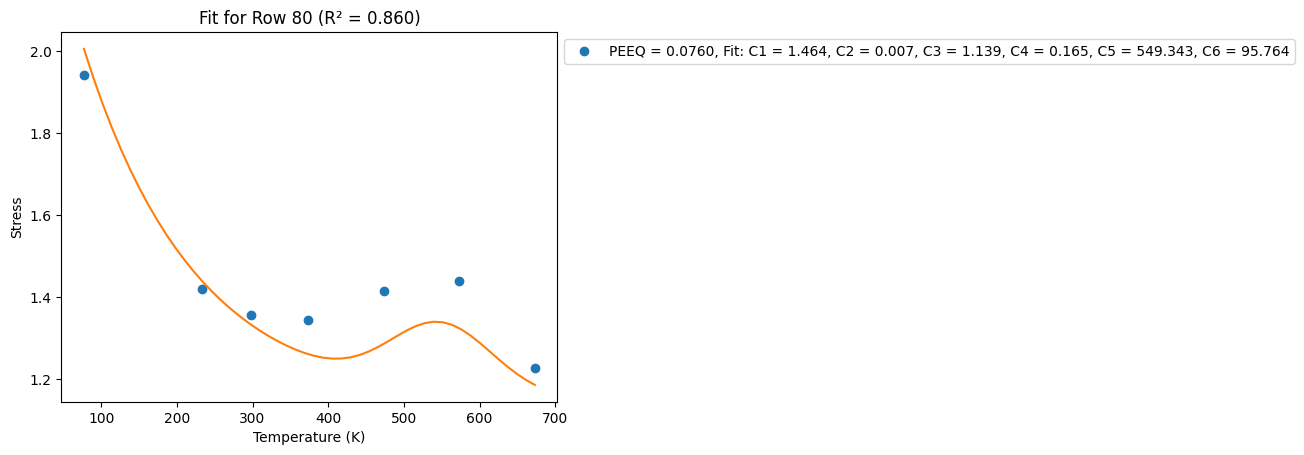

[1.94583261 1.42172698 1.35866212 1.3456358  1.41739874 1.44221373
 1.22853757]


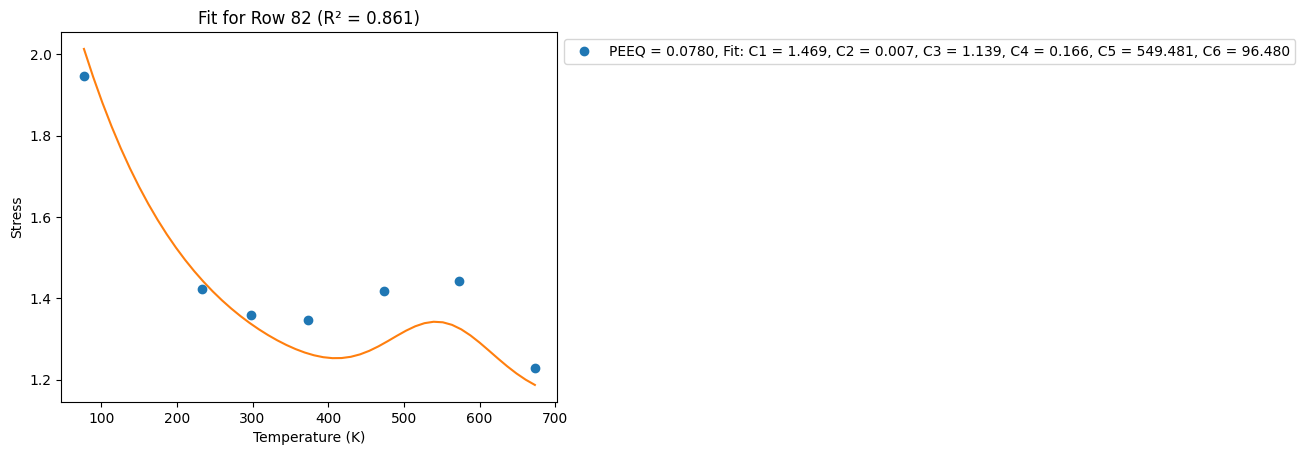

[1.9500165  1.42314905 1.36048455 1.3477978  1.41982875 1.44523932
 1.23051552]


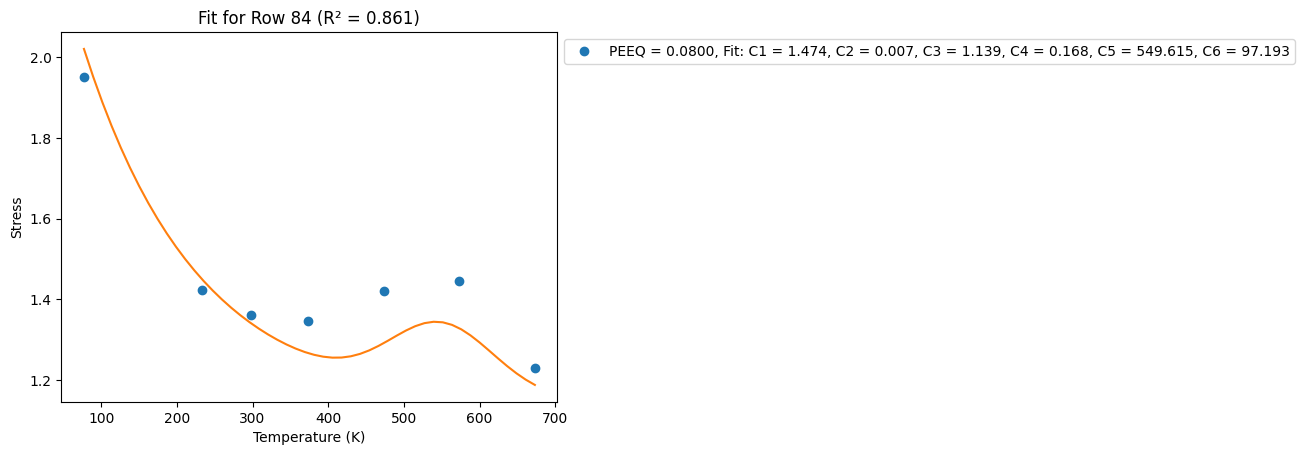

[1.95412783 1.424508   1.36225236 1.34990557 1.42219312 1.44818538
 1.23244403]


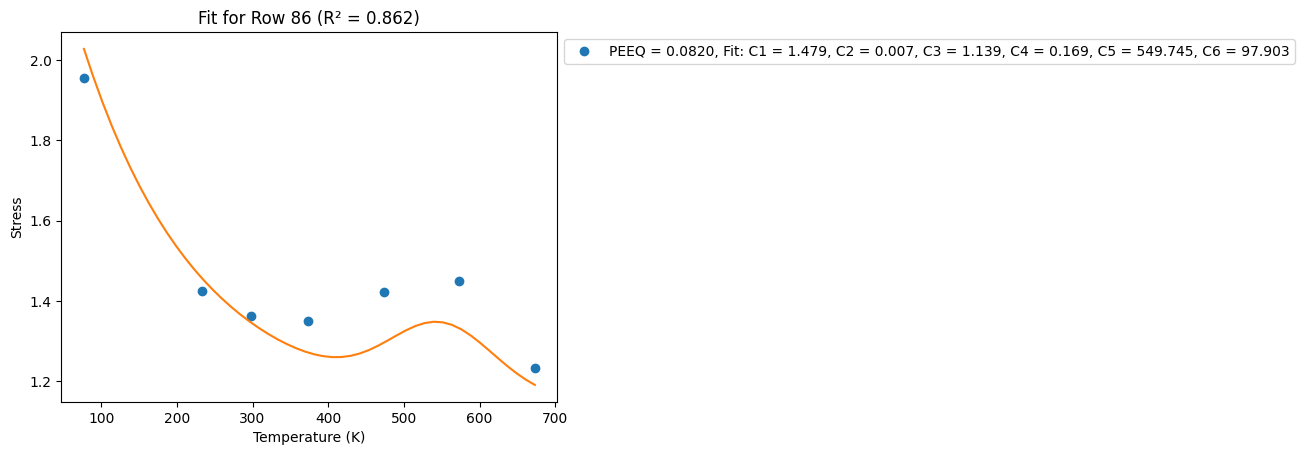

[1.95816961 1.42580803 1.36396847 1.3519618  1.42449516 1.45105586
 1.23432553]


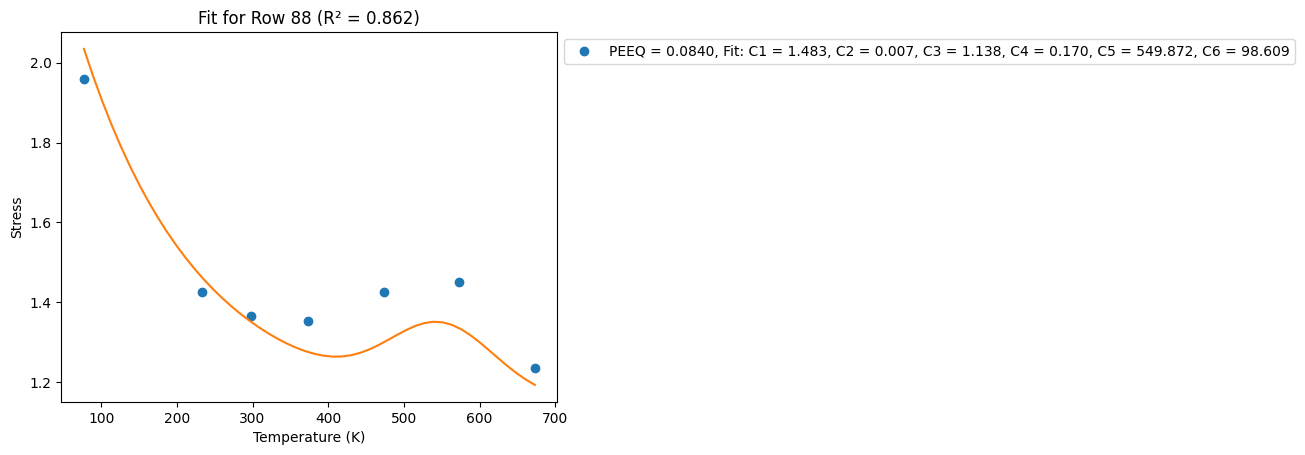

[1.96214465 1.42705298 1.36563557 1.353969   1.42673795 1.45385447
 1.23616224]


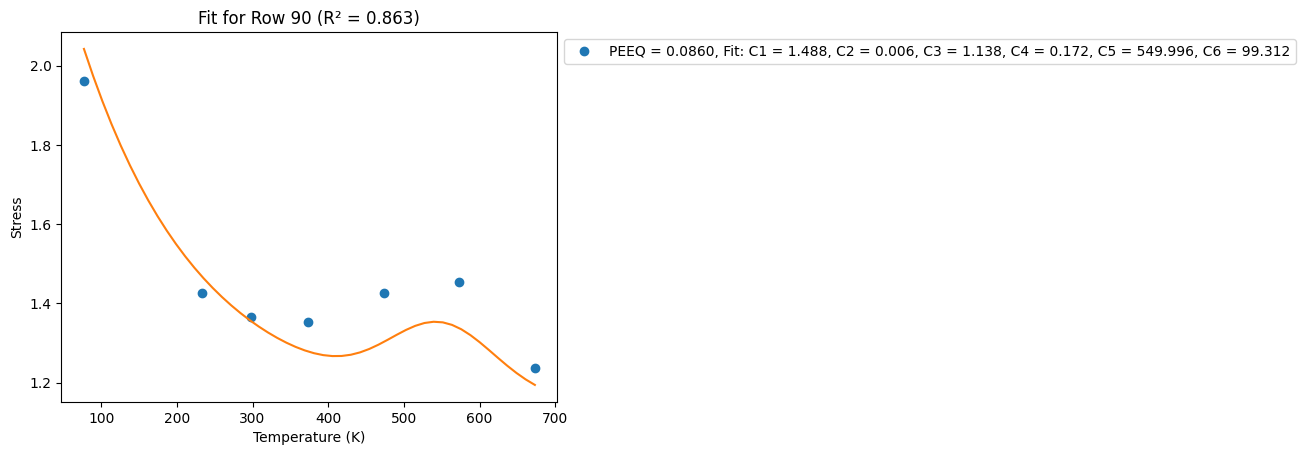

[1.96605558 1.42824633 1.36725617 1.35592948 1.42892432 1.4565846
 1.23795626]


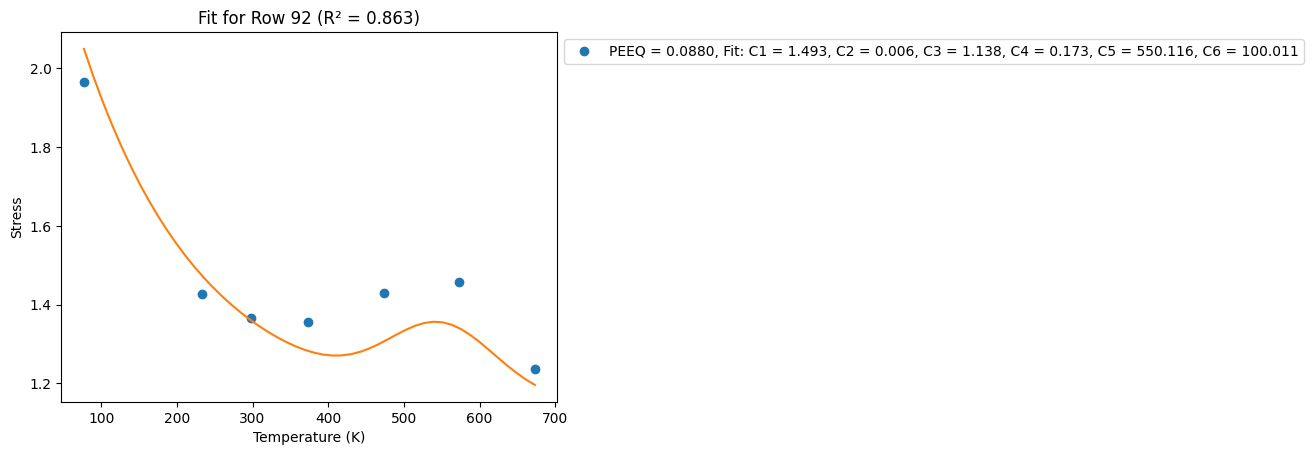

[1.96990487 1.42939131 1.36883258 1.35784537 1.43105695 1.45924945
 1.23970951]


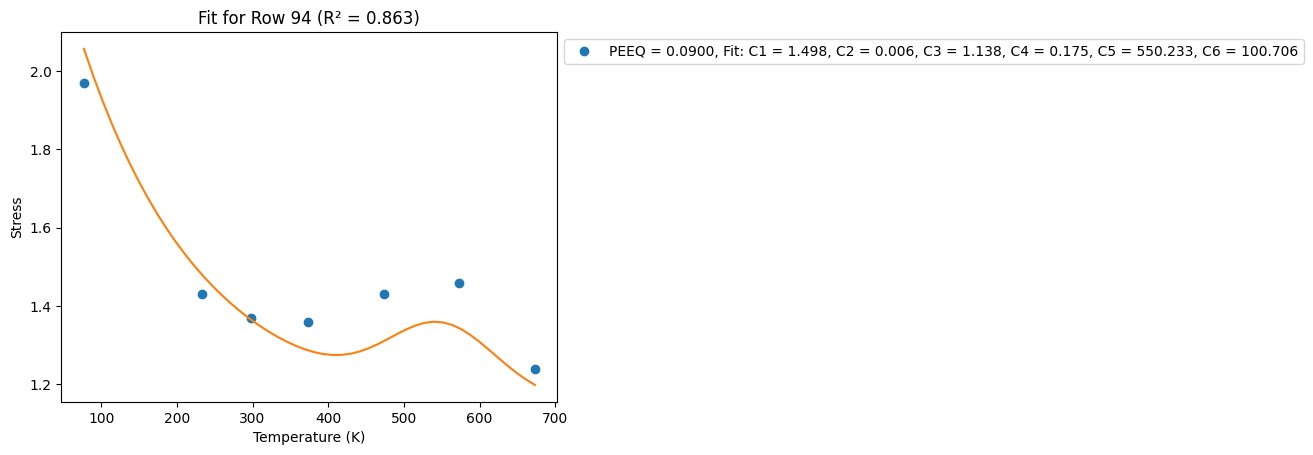

[1.97369485 1.43049085 1.37036695 1.3597187  1.43313829 1.46185199
 1.24142382]


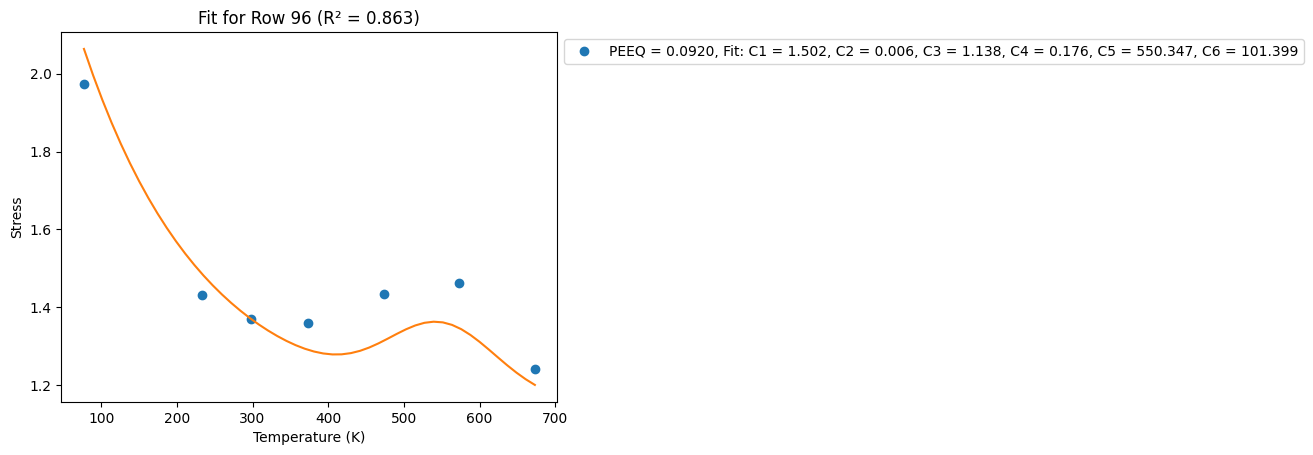

[1.9774277  1.43154767 1.37186128 1.36155132 1.43517066 1.46439498
 1.24310088]


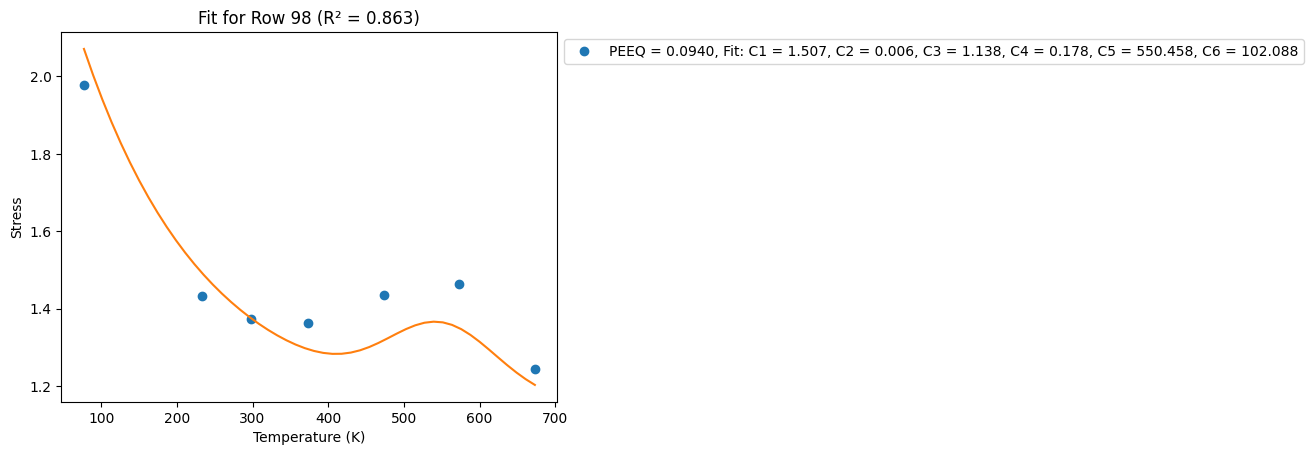

[1.98110548 1.43256427 1.37331745 1.36334497 1.43715622 1.46688103
 1.24474227]


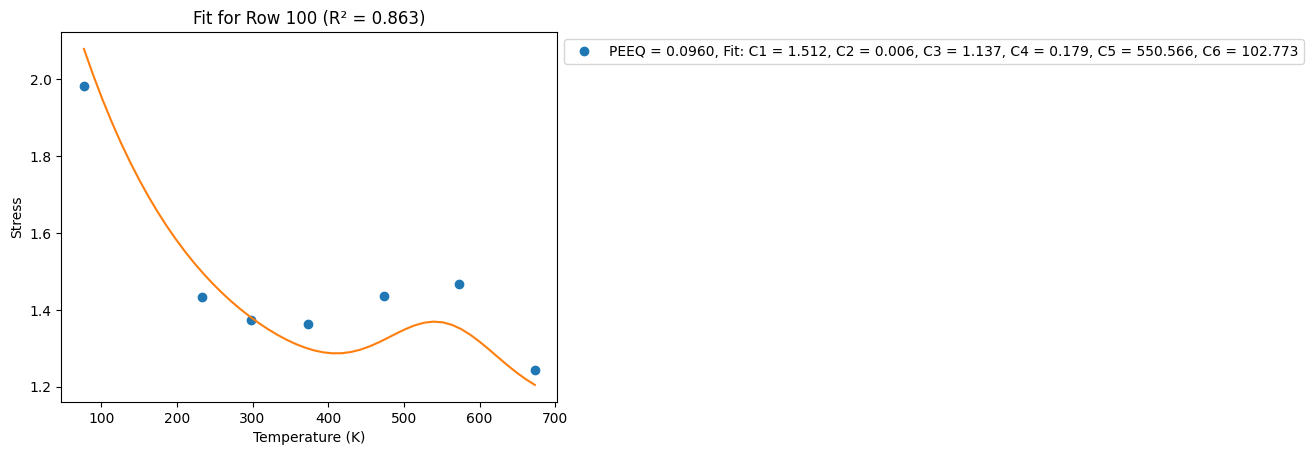

[1.98473014 1.43354294 1.37473719 1.36510129 1.43909698 1.46931255
 1.24634947]


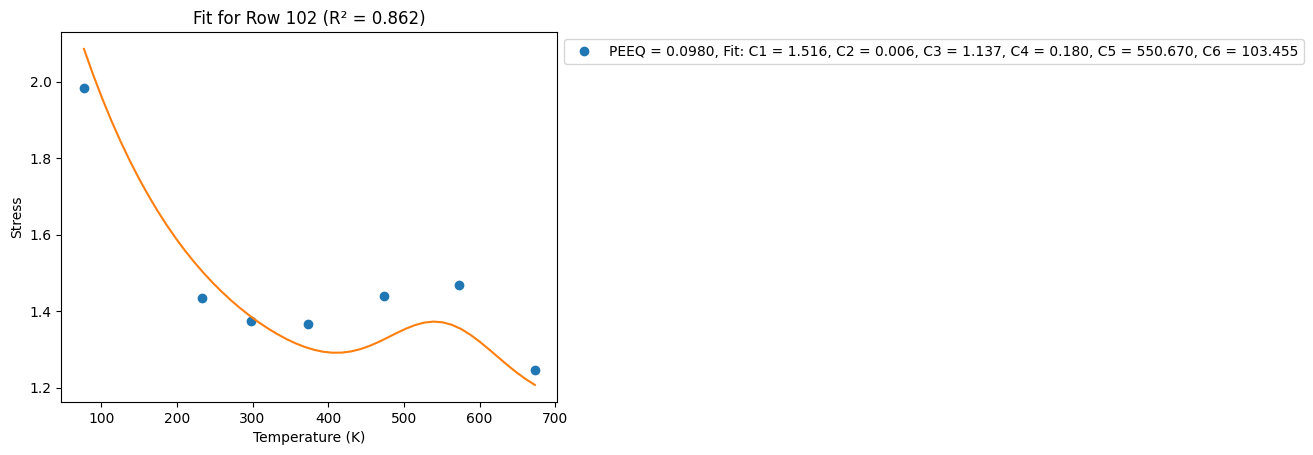

[1.98830352 1.43448582 1.37612214 1.36682181 1.44099485 1.47169183
 1.24792388]


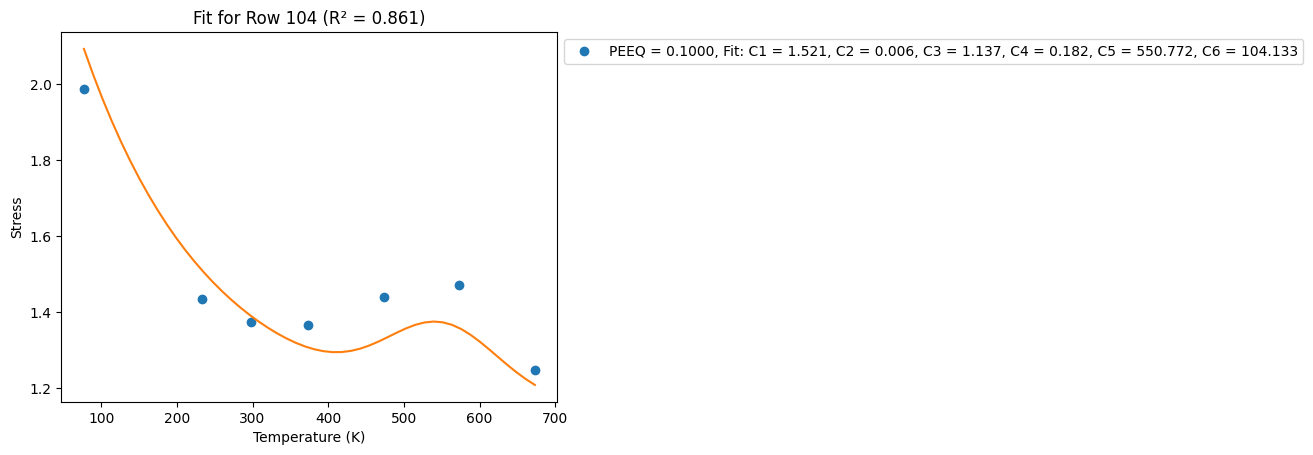

[2.0071137  1.43911315 1.38318112 1.3757049  1.45074066 1.48393353
 1.256052  ]


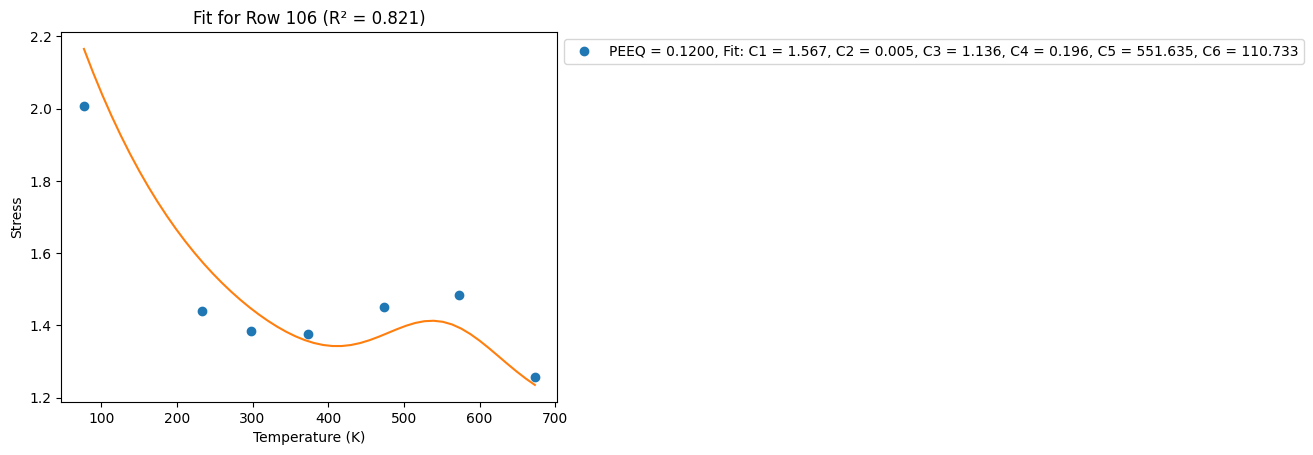

[2.03822165 1.44568235 1.39406686 1.3897932  1.46601438 1.50320096
 1.26894021]


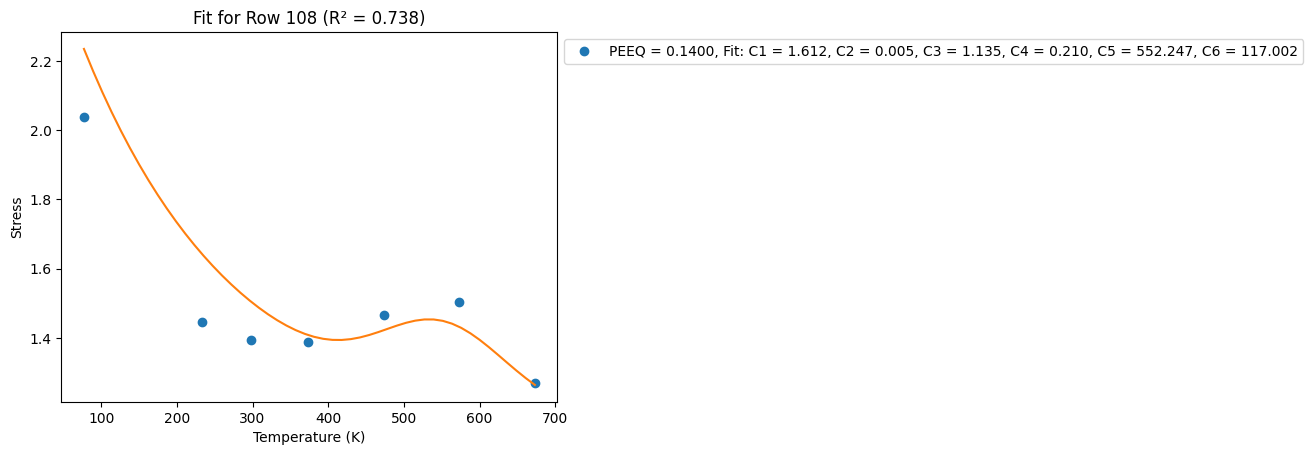

[2.06617536 1.4506355  1.40309998 1.40186531 1.47892331 1.51956633
 1.27998105]


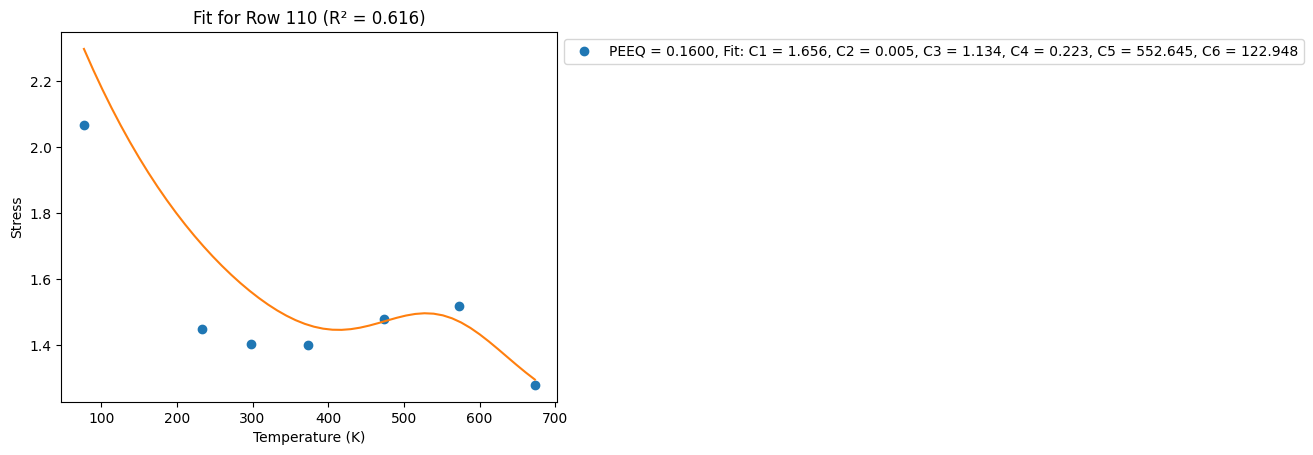

[2.09165822 1.45451203 1.41078586 1.41242702 1.49008186 1.53377461
 1.28963835]


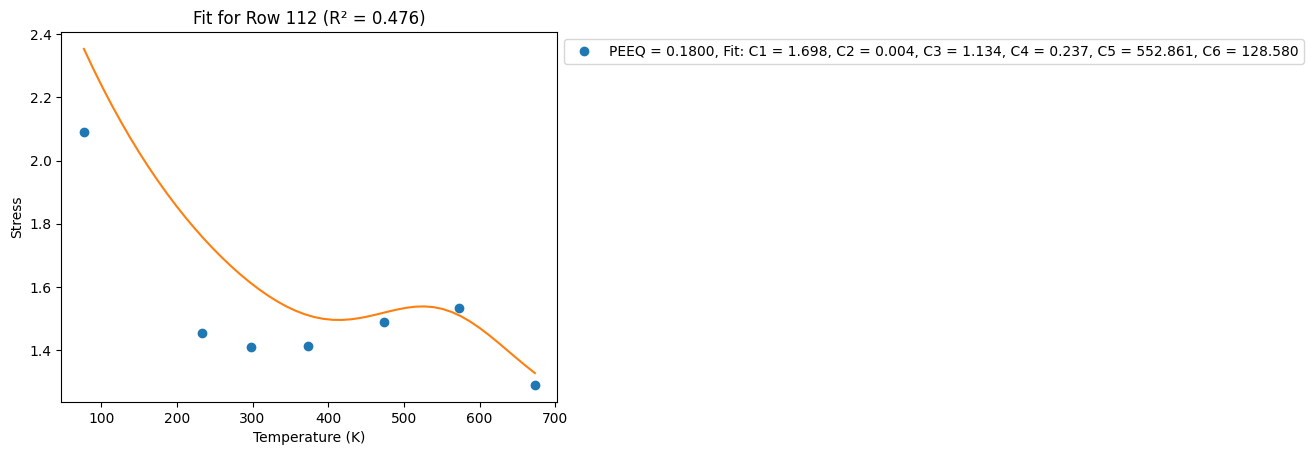

[2.11514448 1.45763383 1.41745147 1.42181478 1.49989444 1.5463179
 1.29822057]


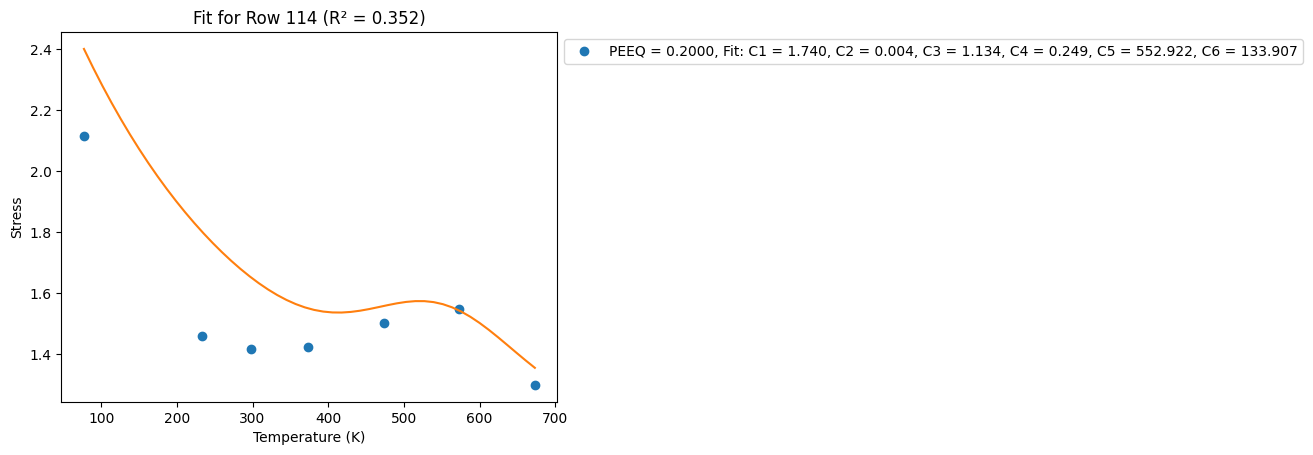

[2.13697818 1.46020522 1.42331987 1.43026377 1.50864104 1.55753803
 1.30594329]


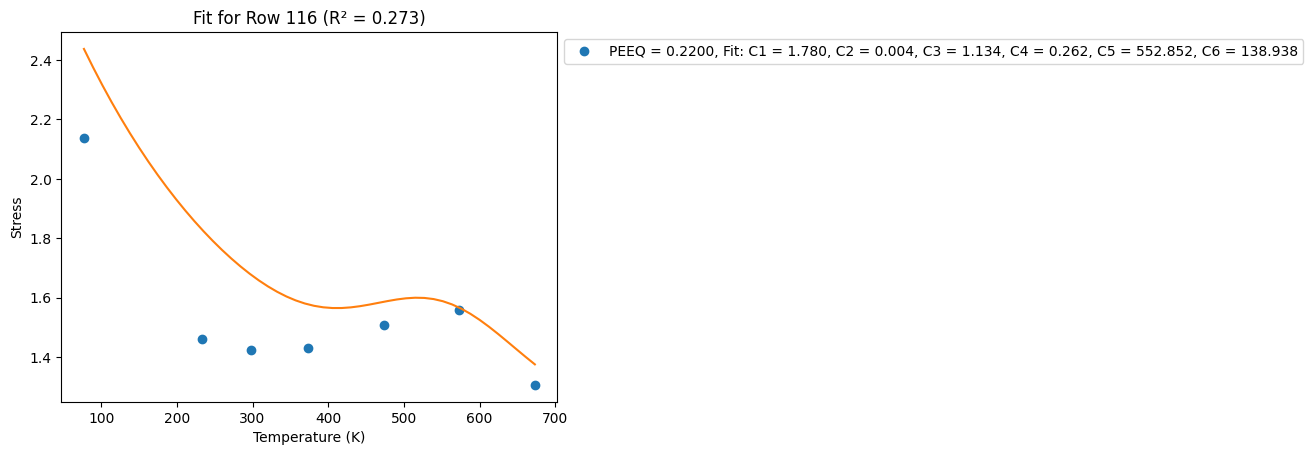

[2.15741767 1.46236236 1.42854963 1.43794489 1.51652335 1.56768197
 1.31296311]


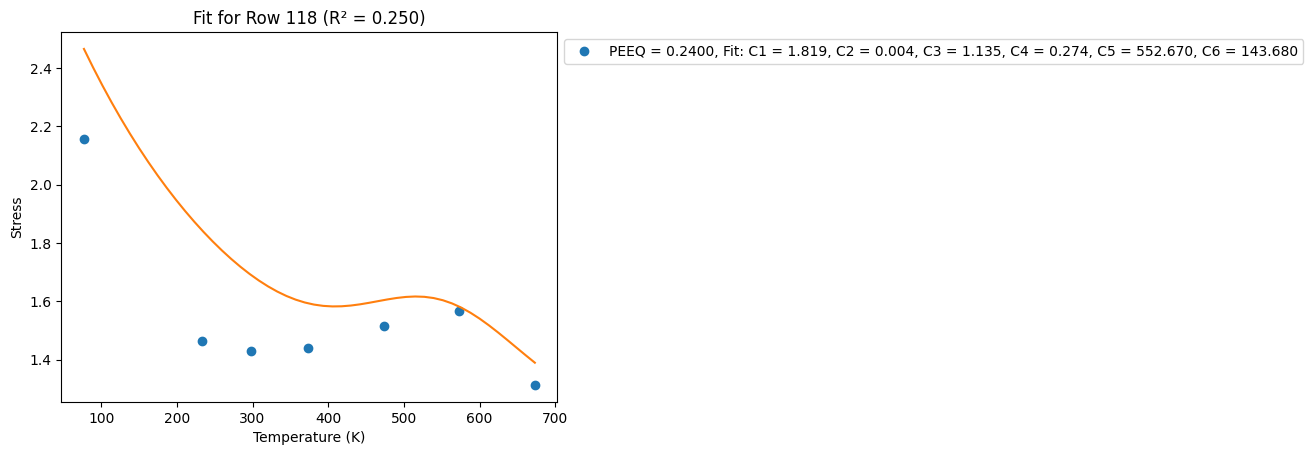

[2.17666243 1.46419959 1.43325726 1.44498622 1.52369129 1.57693386
 1.31939737]


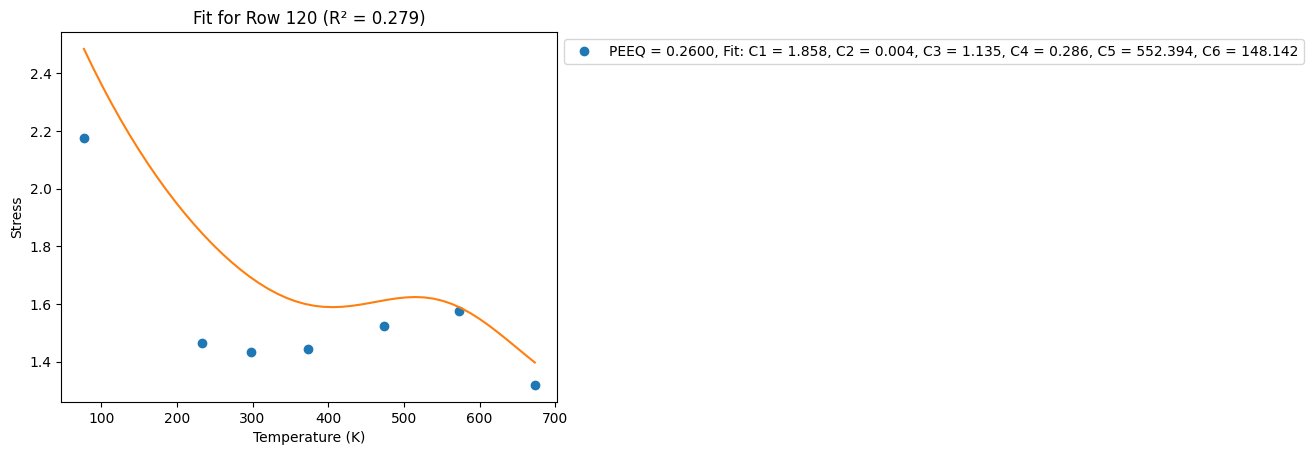

[2.19487003 1.46578439 1.43753076 1.45148625 1.53025933 1.58543458
 1.32533631]


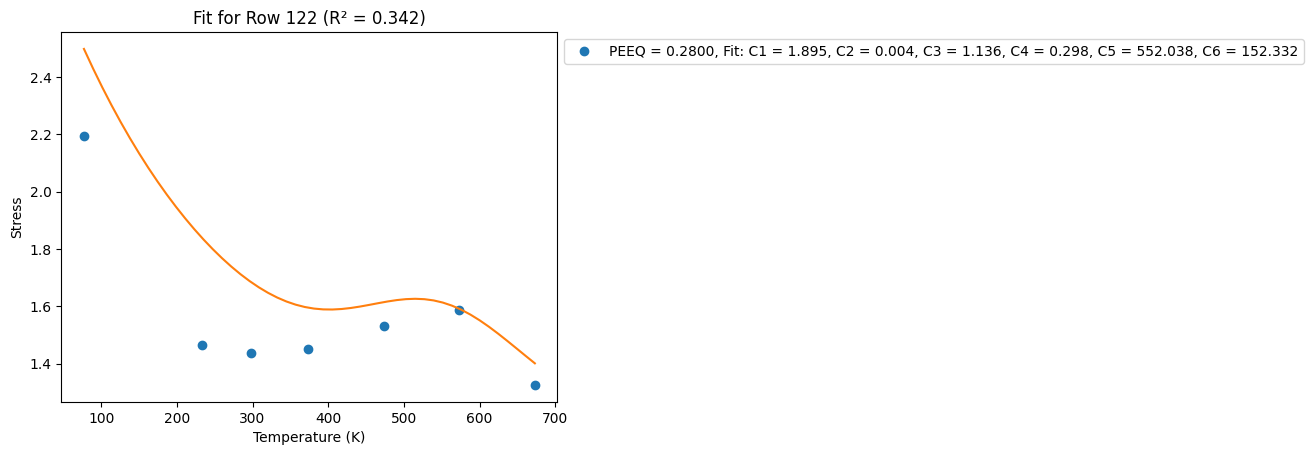

[2.21216737 1.46716637 1.44143808 1.45752234 1.53631672 1.59329433
 1.33085075]


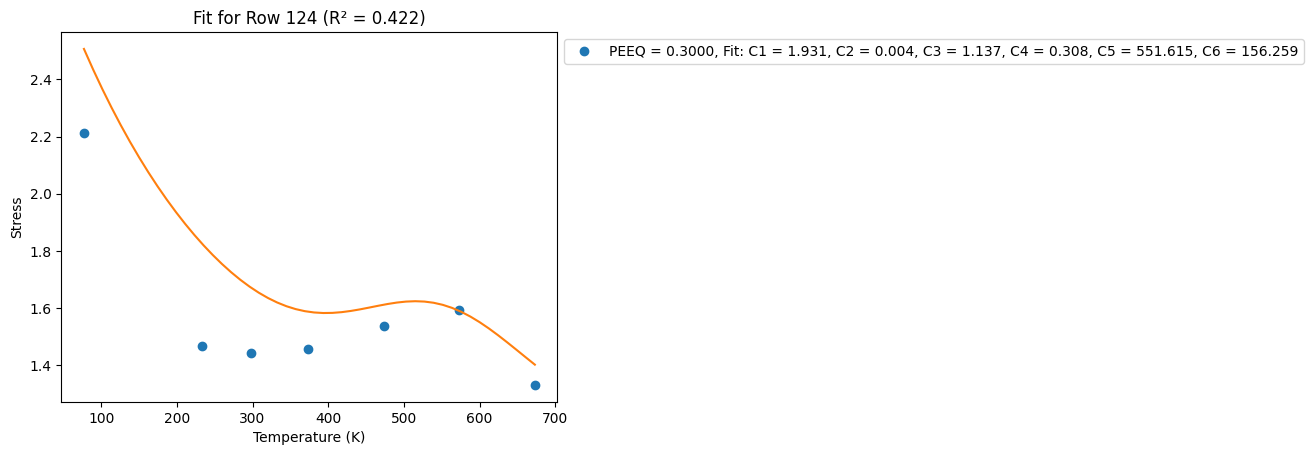

[2.22865829 1.46838283 1.44503277 1.46315636 1.54193442 1.60060087
 1.33599737]


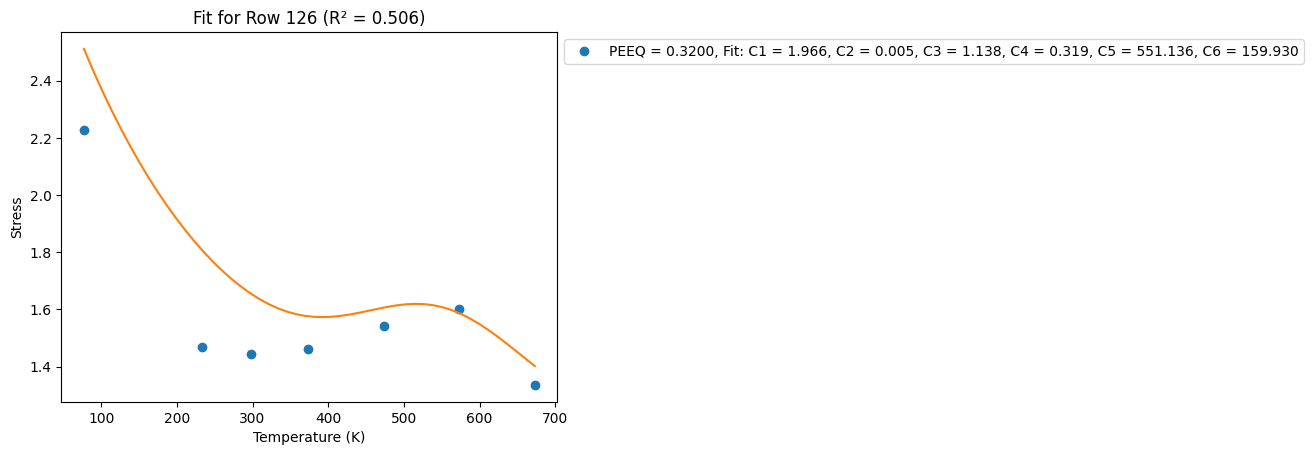

[2.24442896 1.46946237 1.44835768 1.46843858 1.5471697  1.6074252
 1.34082217]


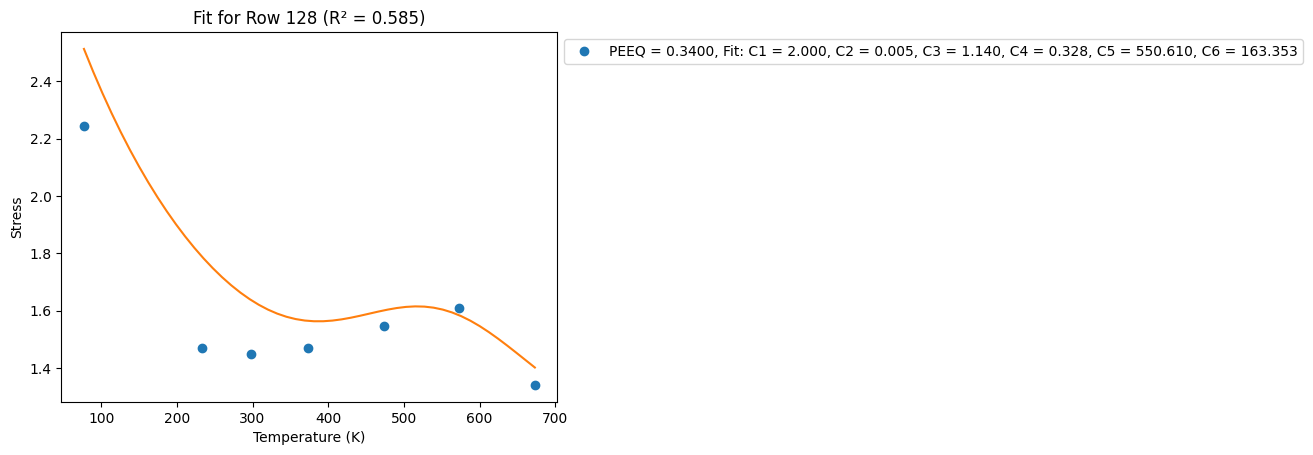

[2.25955177 1.47042731 1.45144765 1.47341038 1.55206946 1.61382558
 1.34536305]


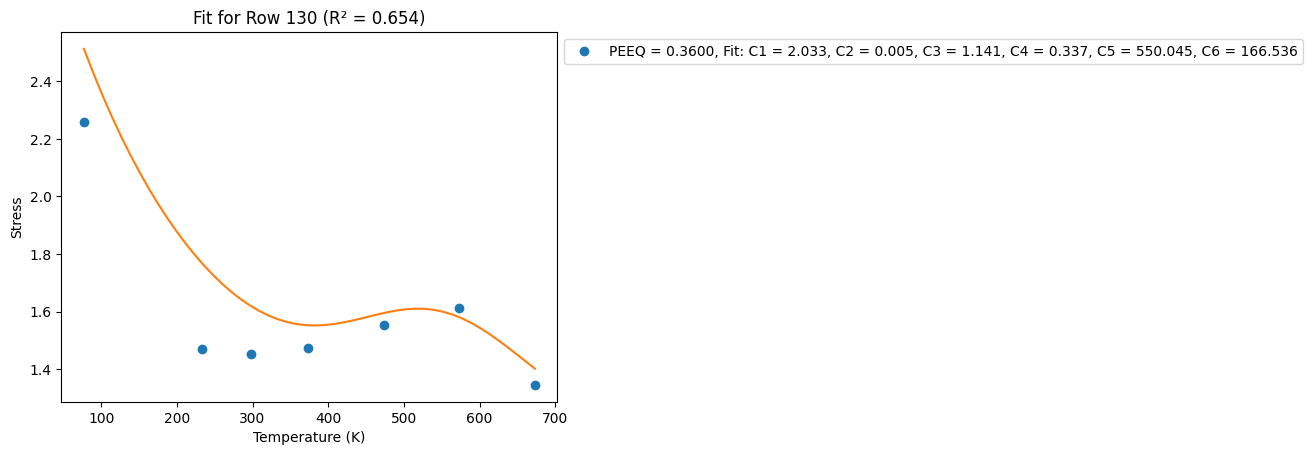

[2.27408818 1.47129532 1.45433133 1.47810626 1.55667257 1.61985041
 1.34965158]


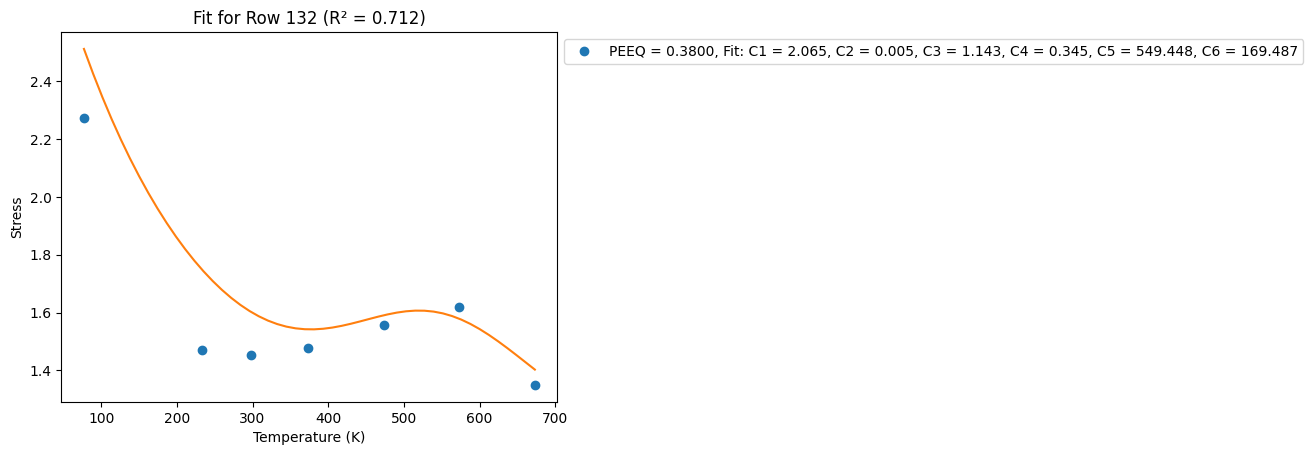

[2.28809086 1.4720806  1.45703256 1.48255524 1.56101161 1.62554029
 1.35371434]


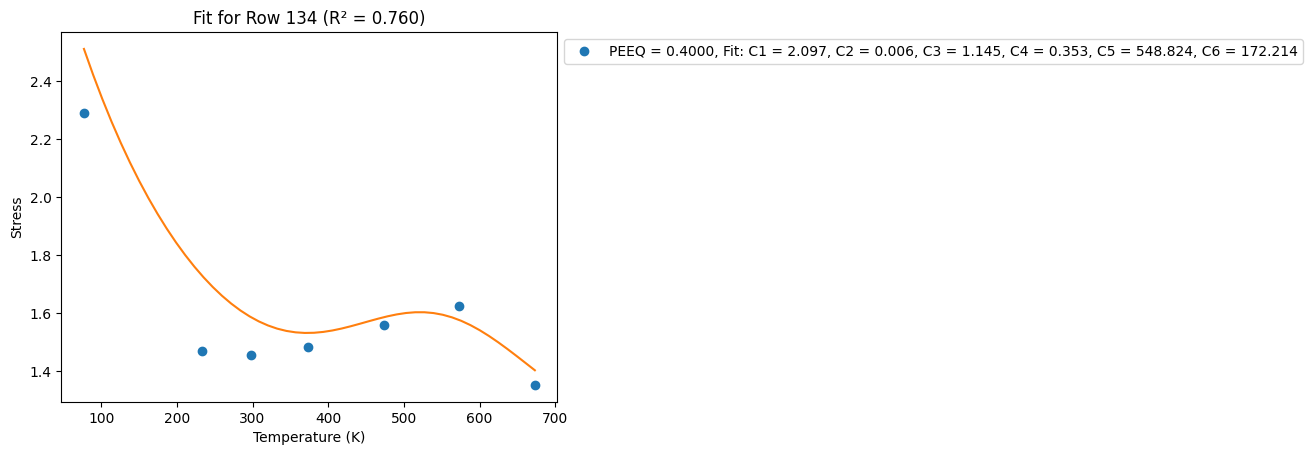

[2.30160534 1.47279466 1.45957138 1.48678203 1.56511412 1.63092962
 1.35757391]


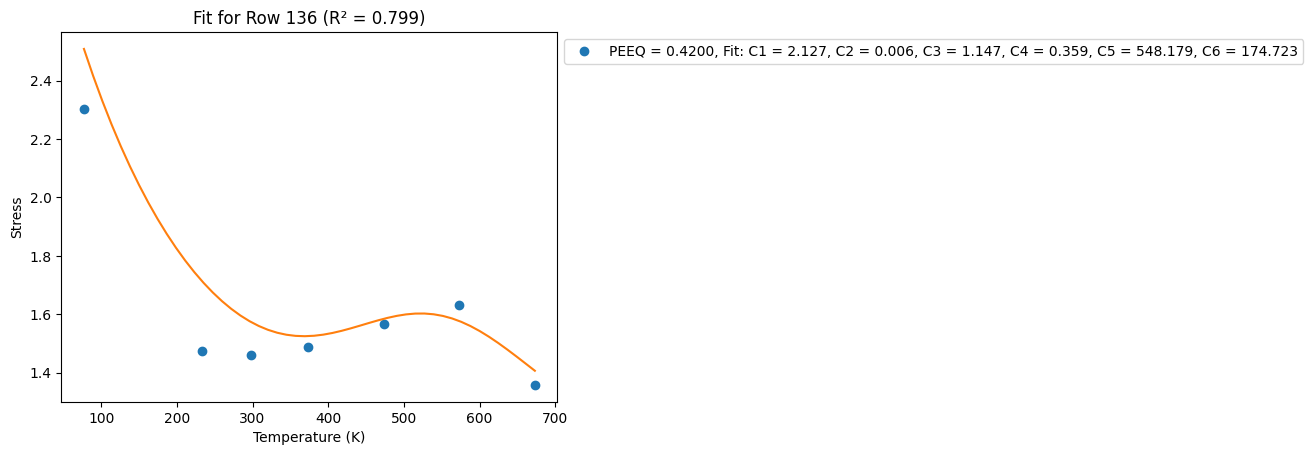

[2.31467125 1.47344695 1.46196478 1.49080776 1.5690036  1.63604781
 1.36124966]


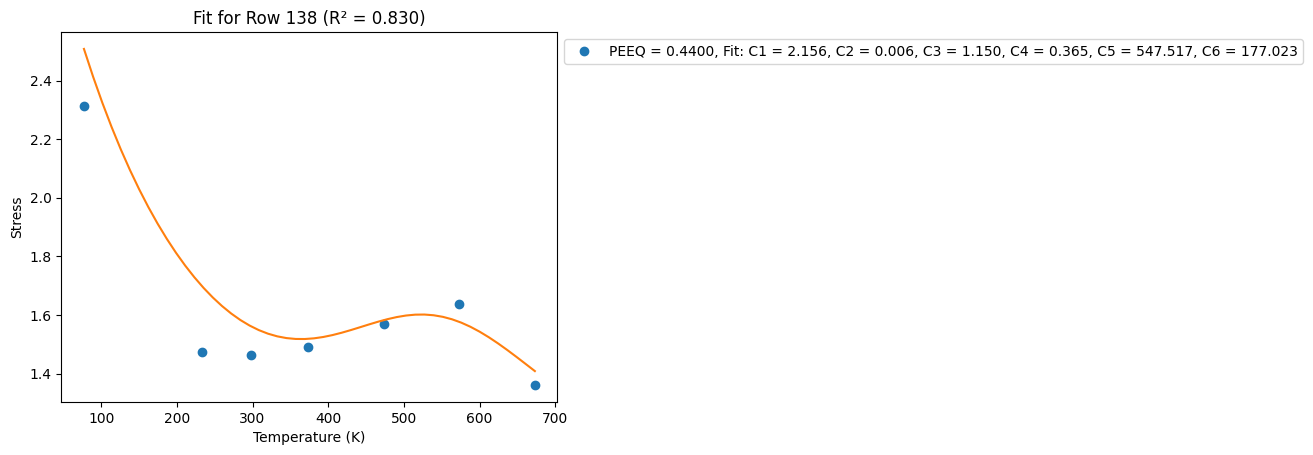

[2.32732334 1.47404533 1.4642273  1.49465072 1.57270025 1.64092019
 1.3647583 ]


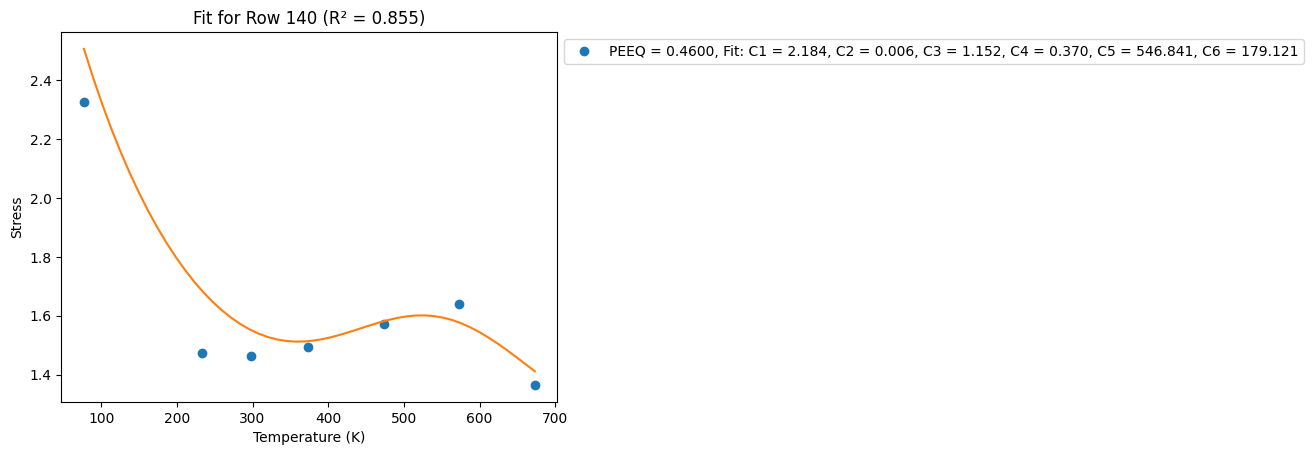

[2.33959227 1.47459633 1.46637144 1.49832679 1.57622159 1.64556872
 1.36811436]


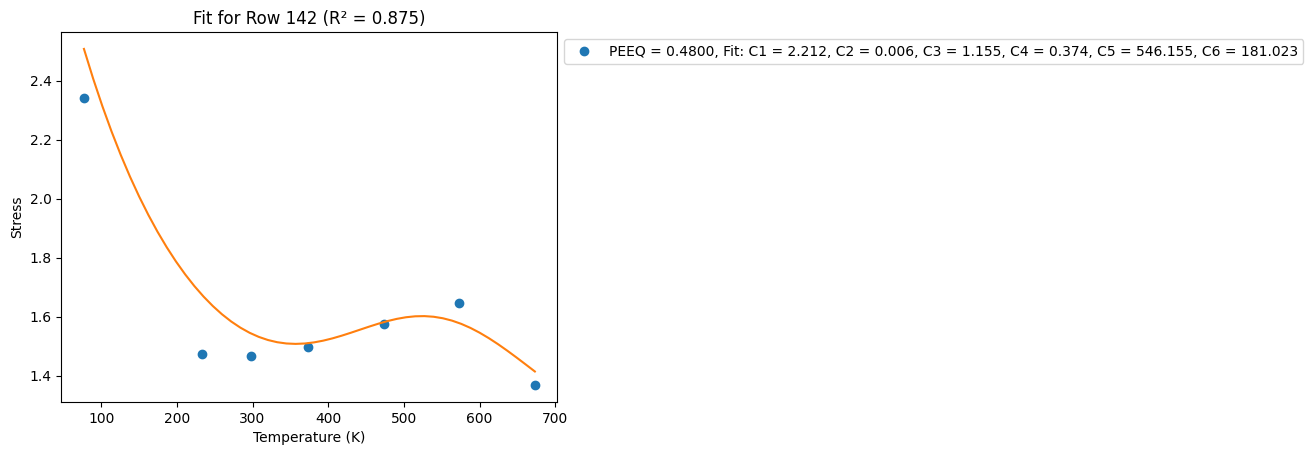

[2.35150524 1.47510549 1.46840805 1.50184987 1.57958285 1.65001256
 1.37133058]


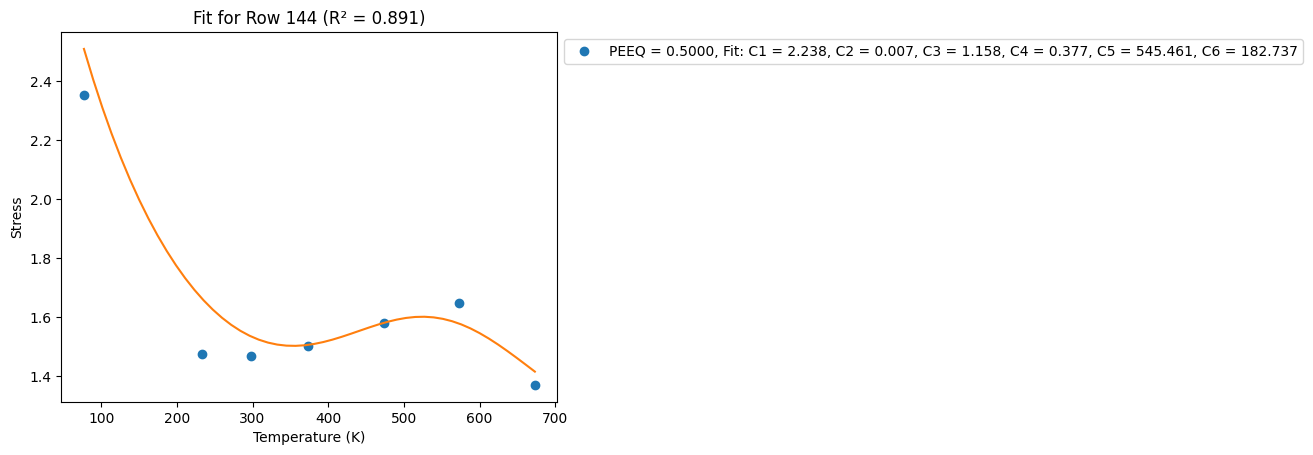

[2.36308648 1.4755775  1.47034658 1.5052322  1.5827974  1.65426855
 1.37441814]


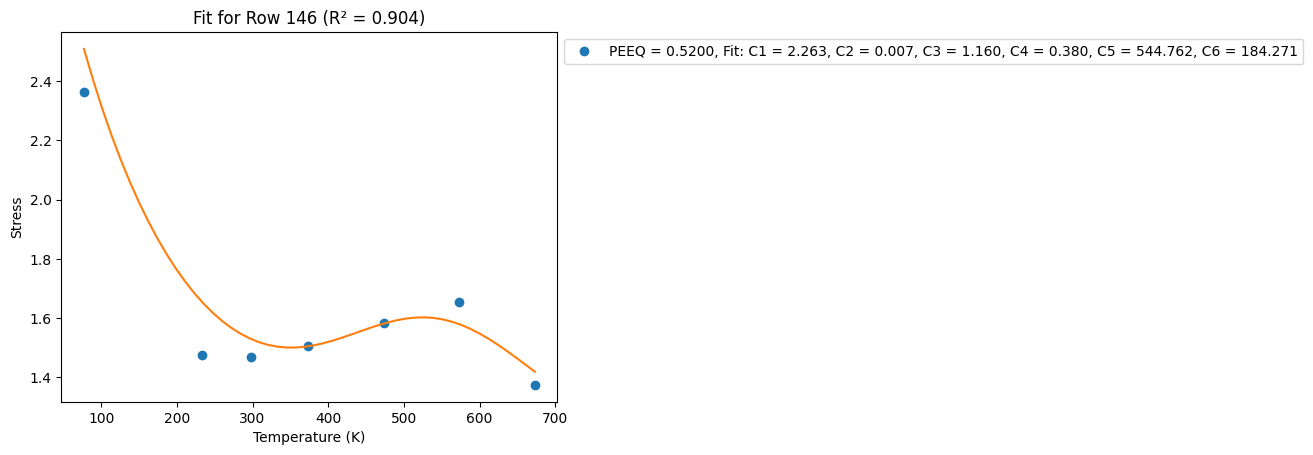

[2.37435771 1.47601635 1.47219533 1.5084846  1.58587703 1.65835153
 1.37738694]


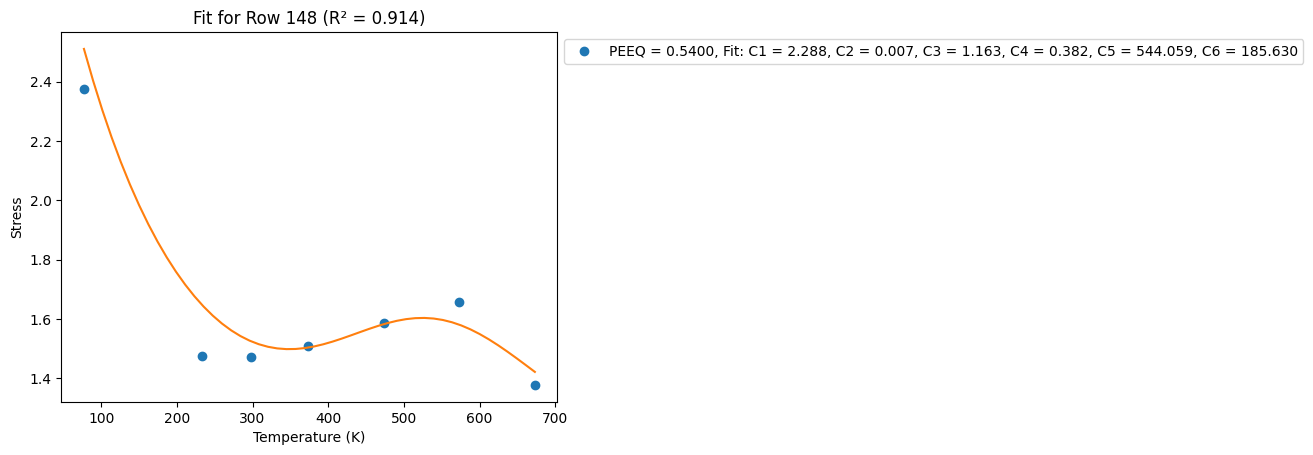

[2.38533848 1.4764255  1.47396162 1.51161669 1.58883217 1.66227467
 1.38024577]


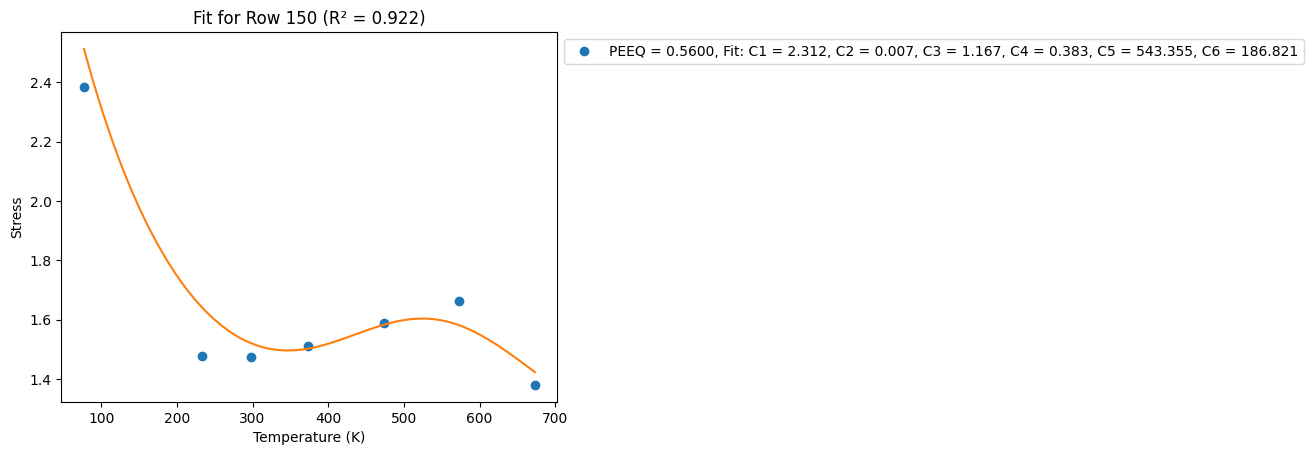

[2.39604644 1.47680793 1.47565193 1.51463705 1.59167211 1.66604971
 1.3830025 ]


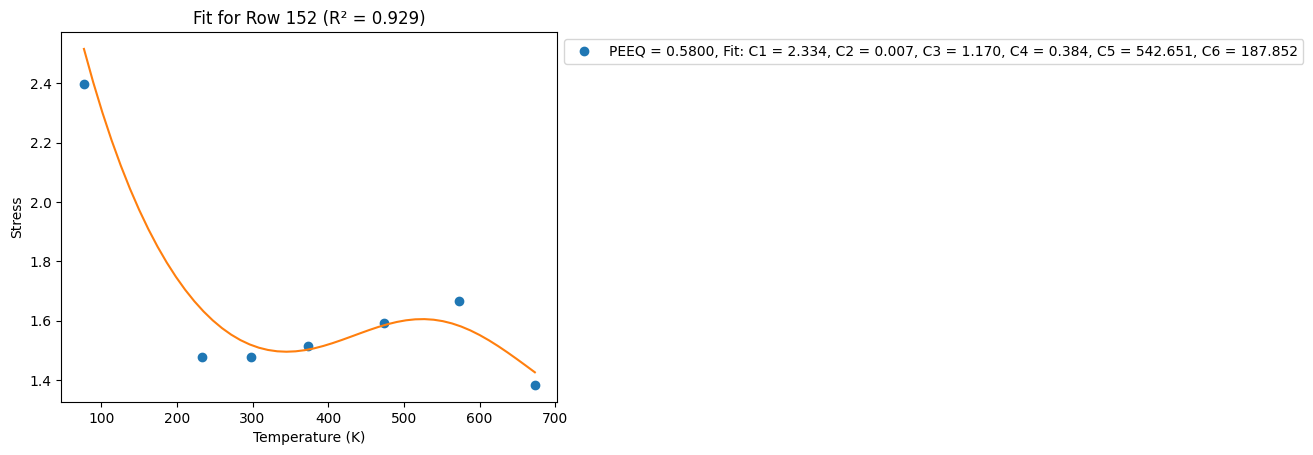

[2.40649759 1.47716622 1.47727202 1.5175534  1.59440515 1.66968715
 1.38566417]


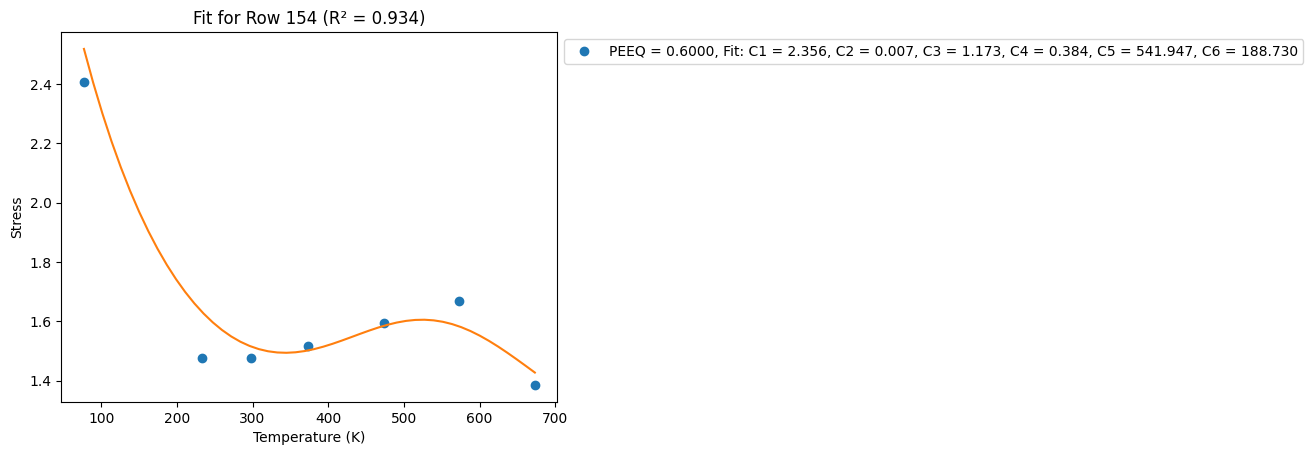

[2.41670649 1.47750263 1.47882704 1.52037266 1.59703872 1.6731964
 1.38823711]


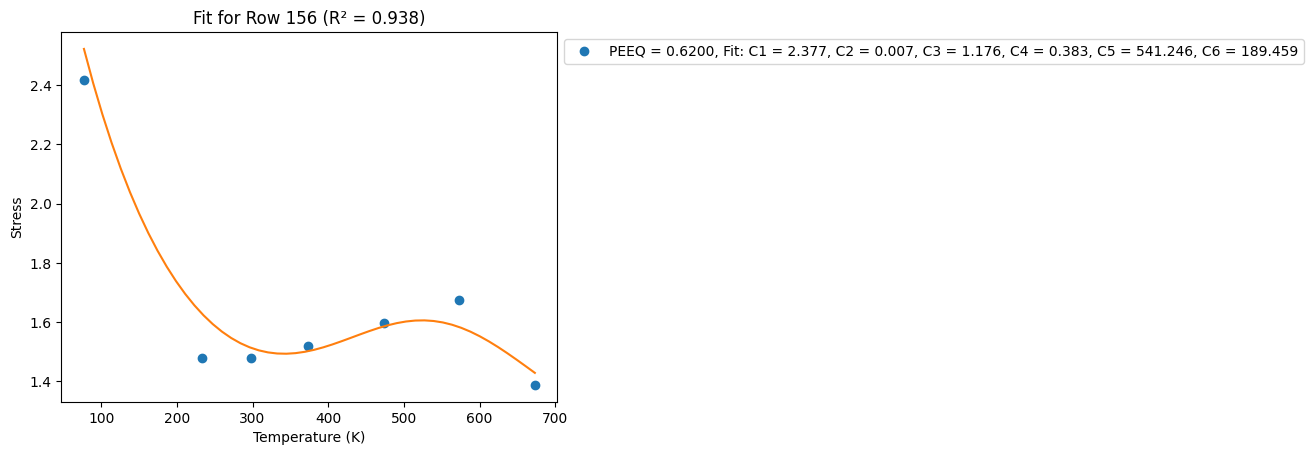

[2.42668643 1.47781916 1.48032162 1.52310109 1.59957954 1.67658599
 1.39072706]


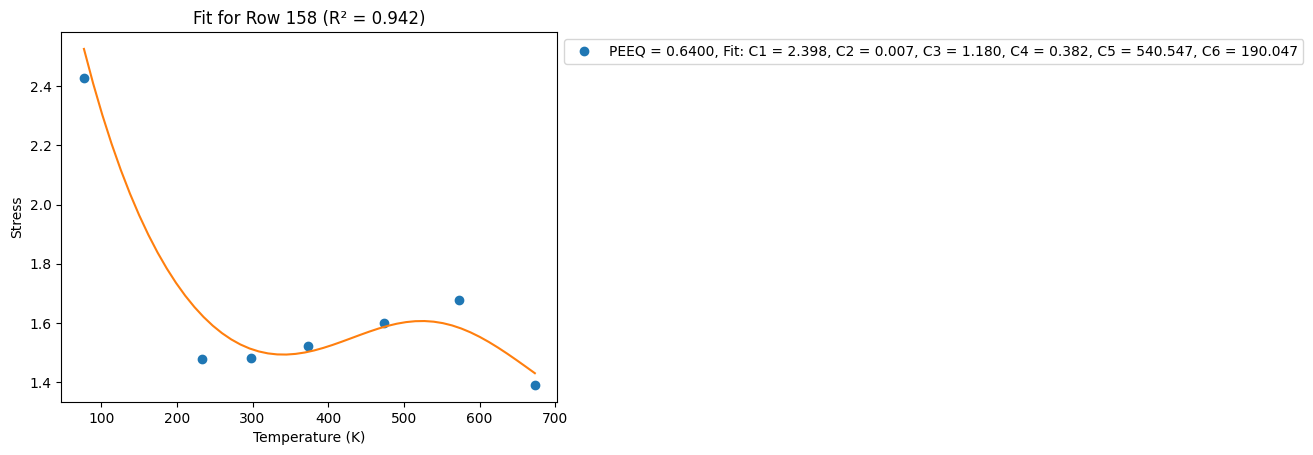

[2.43644957 1.47811755 1.4817599  1.52574436 1.60203365 1.67986358
 1.39313919]


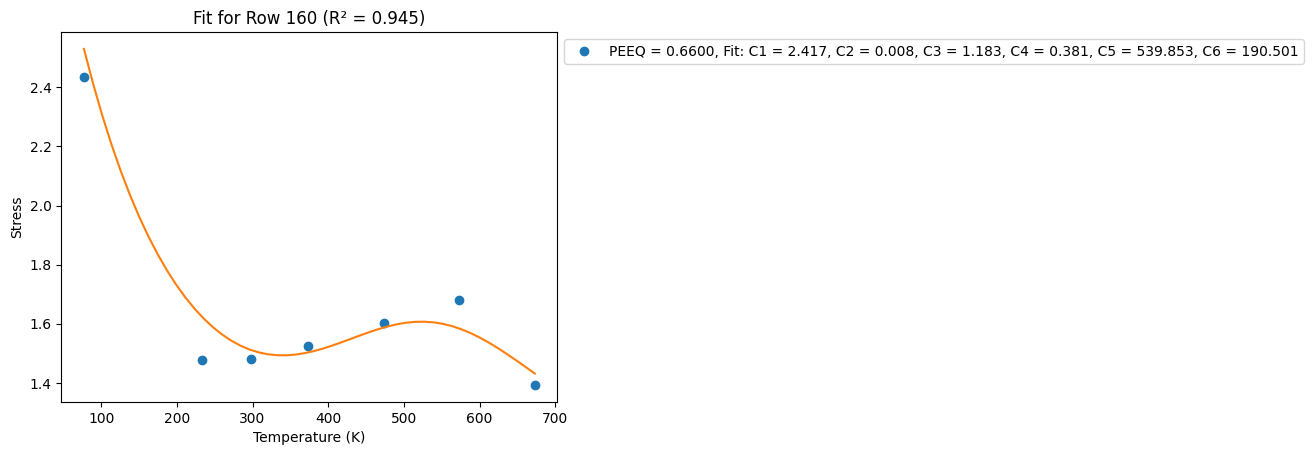

[2.44600708 1.47839935 1.48314566 1.52830764 1.60440655 1.68303617
 1.39547823]


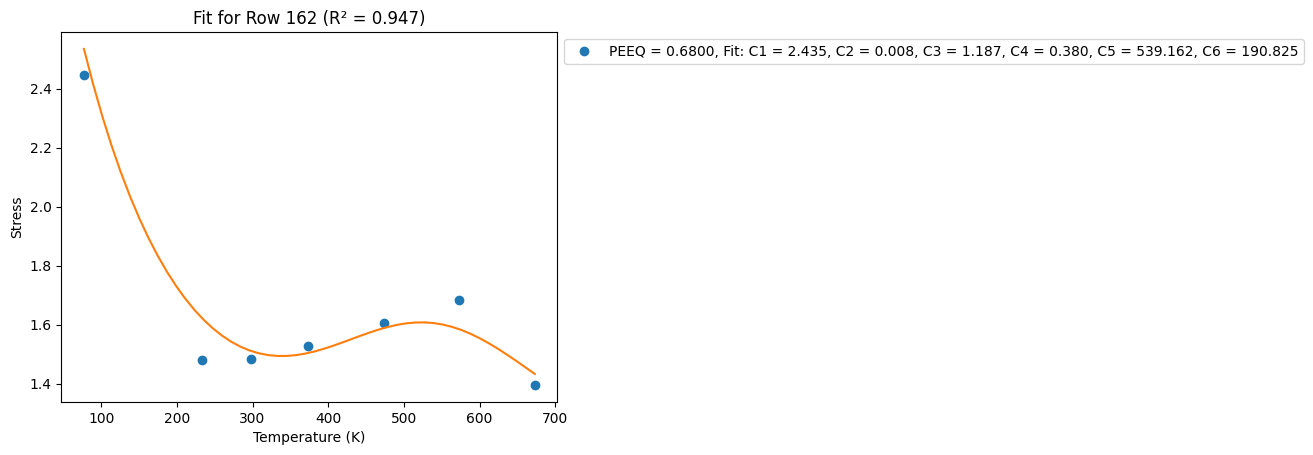

[2.45536924 1.47866593 1.48448228 1.53079562 1.60670322 1.68611009
 1.39774848]


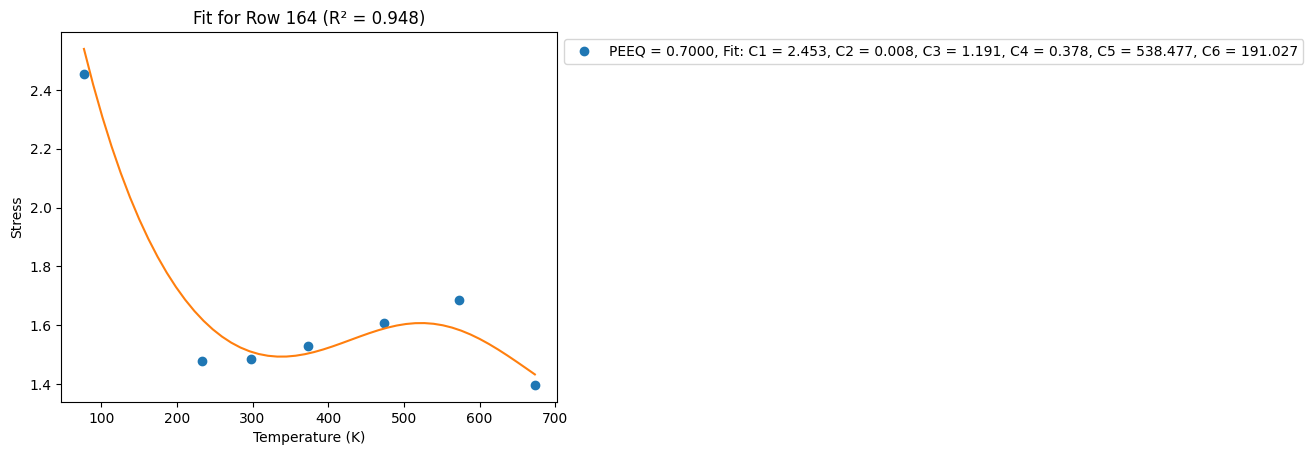

[2.46454554 1.47891853 1.48577287 1.53321261 1.60892823 1.68909115
 1.39995386]


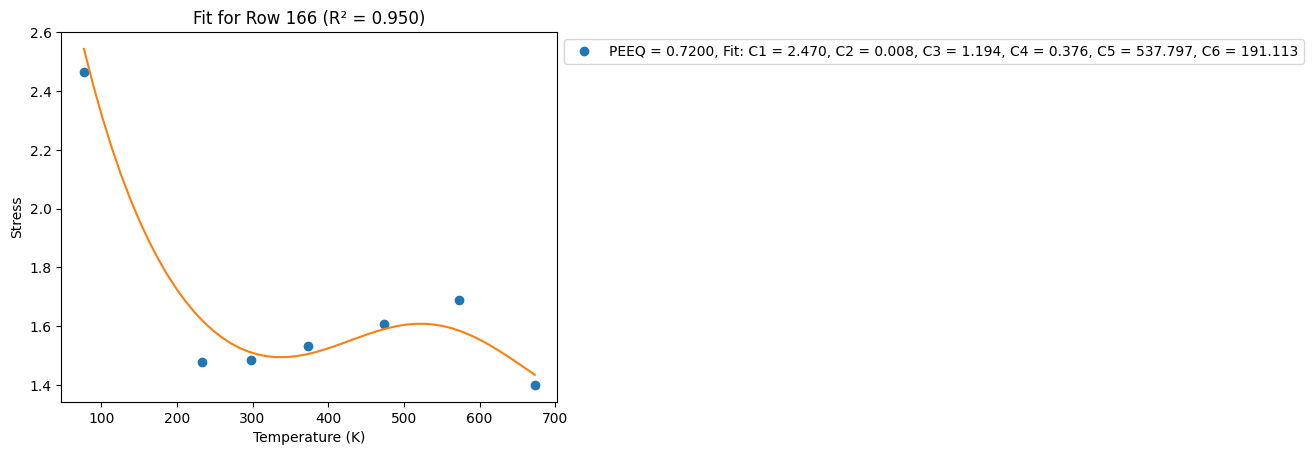

[2.47354474 1.47915823 1.48702023 1.53556255 1.61108573 1.69198465
 1.40209798]


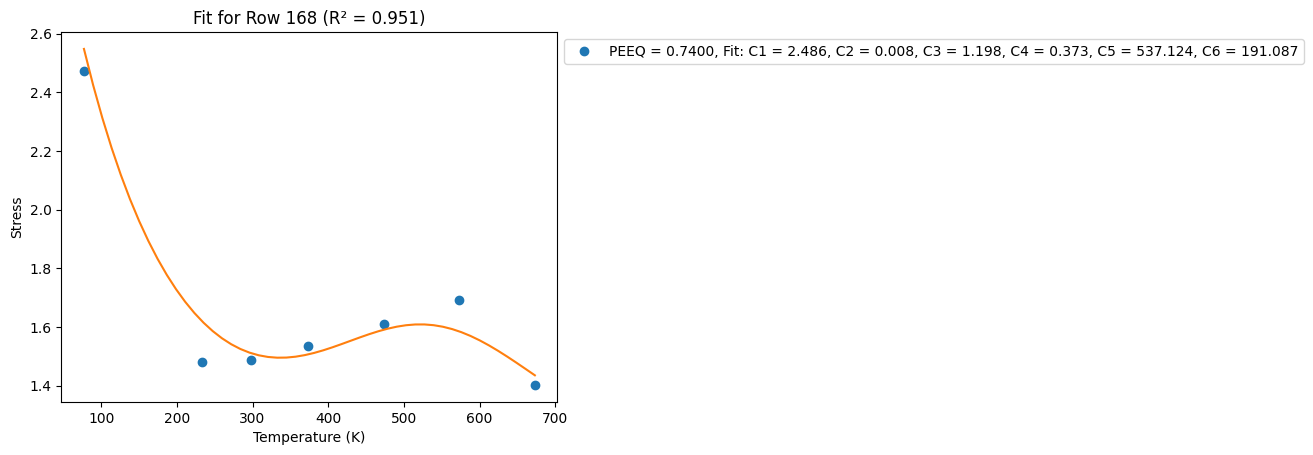

[2.48237499 1.47938603 1.48822694 1.53784906 1.61317952 1.69479545
 1.40418416]


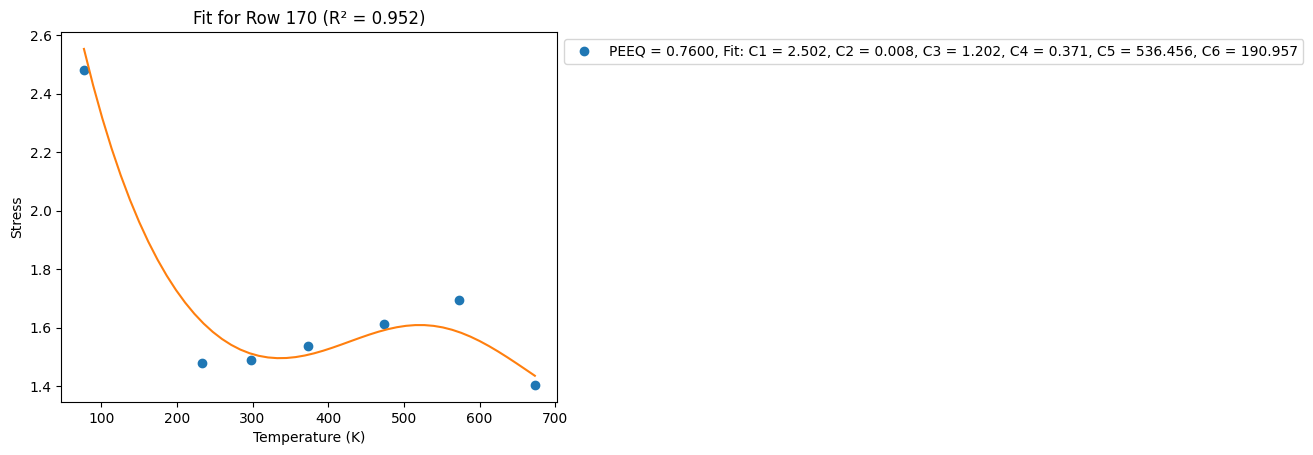

[2.49104383 1.4796028  1.48939536 1.54007547 1.61521313 1.69752803
 1.40621544]


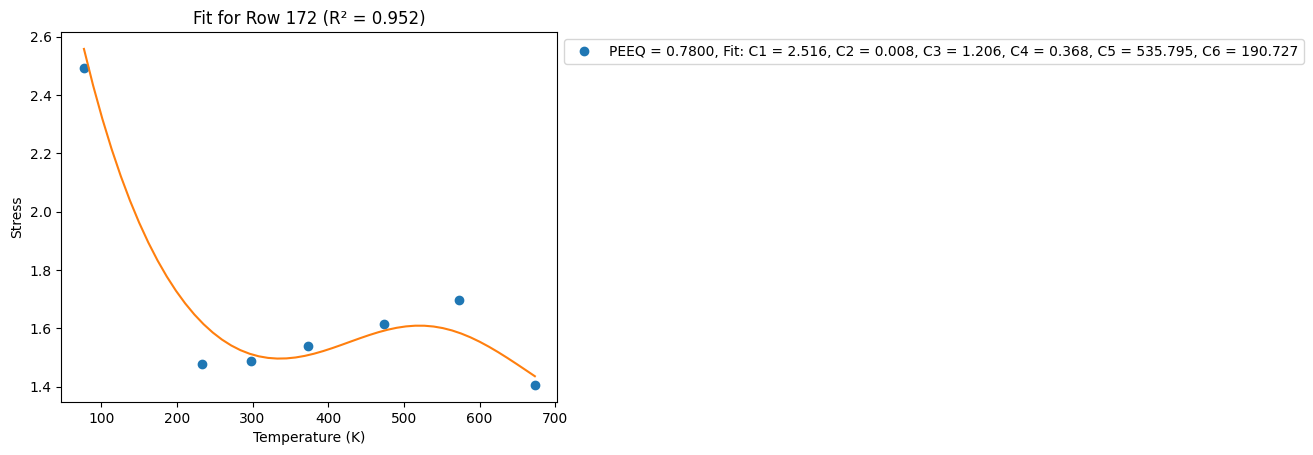

[2.49955829 1.47980934 1.49052765 1.54224487 1.61718977 1.70018652
 1.40819464]


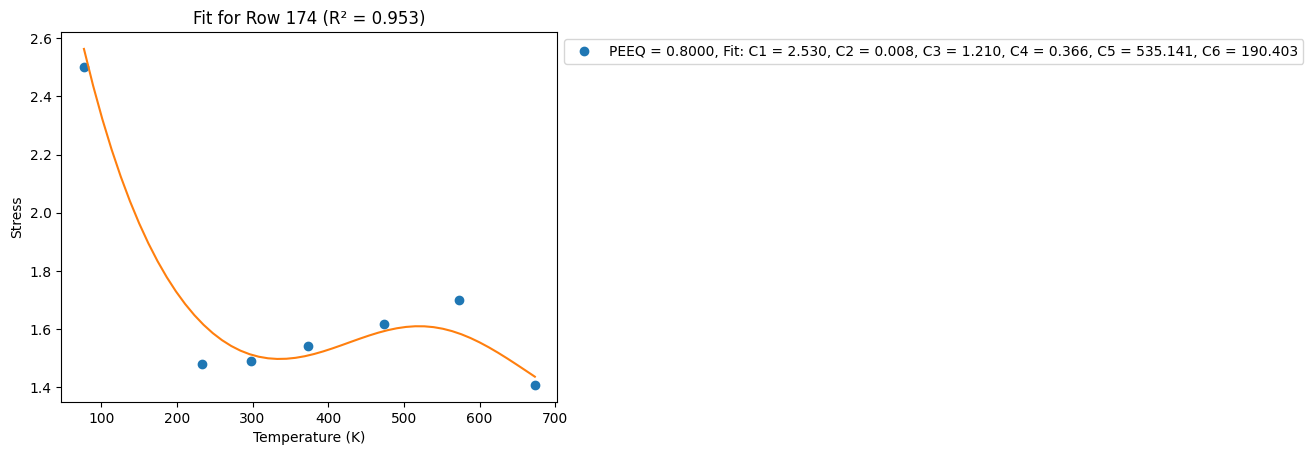

[2.50792493 1.48000638 1.49162579 1.54436011 1.61911242 1.70277472
 1.41012437]


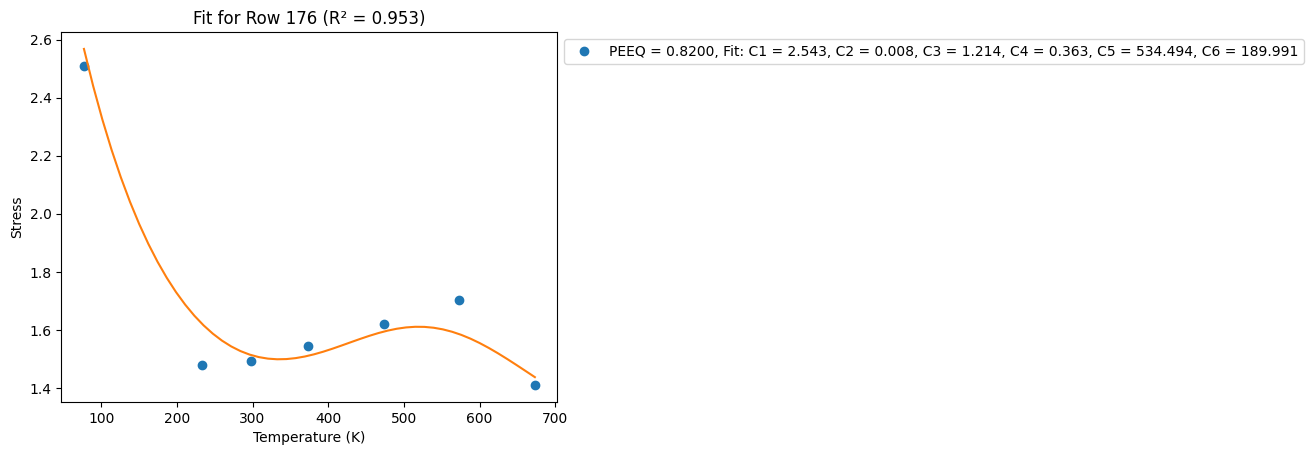

[2.51614987 1.48019458 1.49269163 1.54642382 1.62098383 1.70529616
 1.41200702]


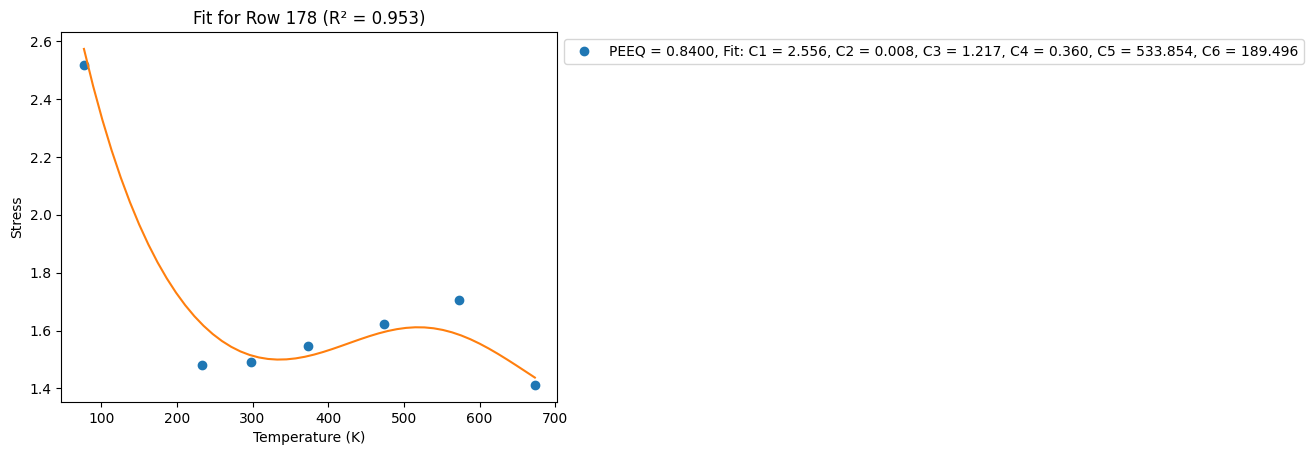

[2.52423884 1.48037452 1.49372686 1.54843847 1.62280655 1.70775411
 1.41384486]


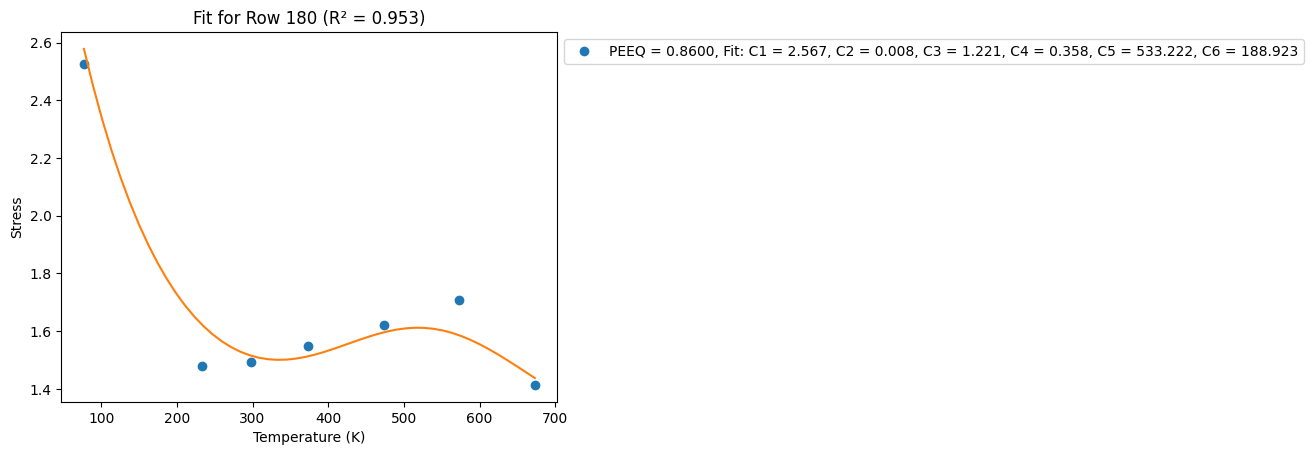

[2.53219722 1.48054675 1.49473304 1.55040632 1.62458295 1.7101516
 1.41563996]


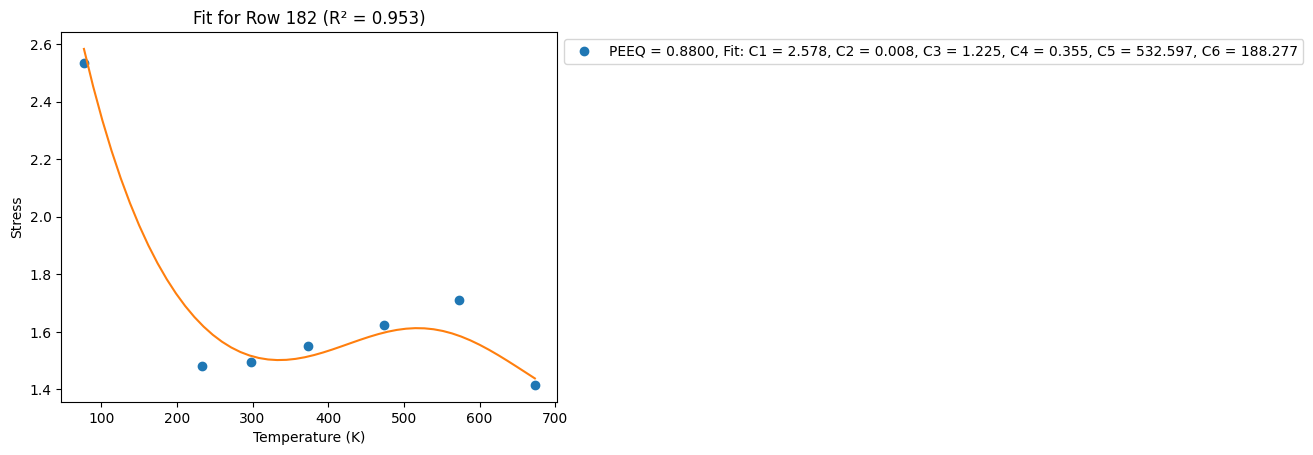

[2.54003003 1.48071176 1.49571163 1.5523295  1.62631523 1.71249146
 1.41739426]


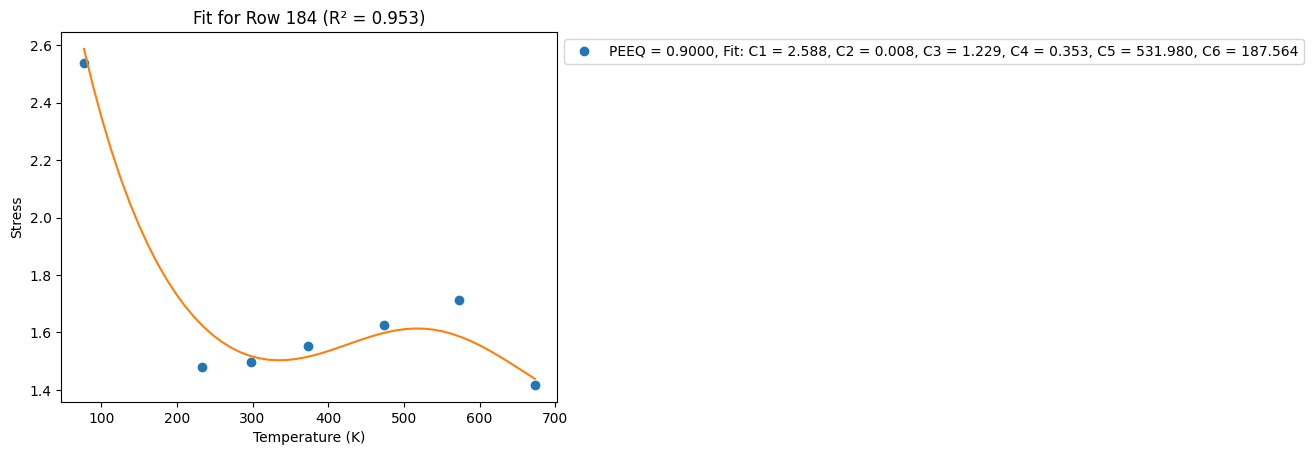

[2.54774201 1.48087002 1.49666399 1.55421001 1.62800545 1.71477633
 1.41910959]


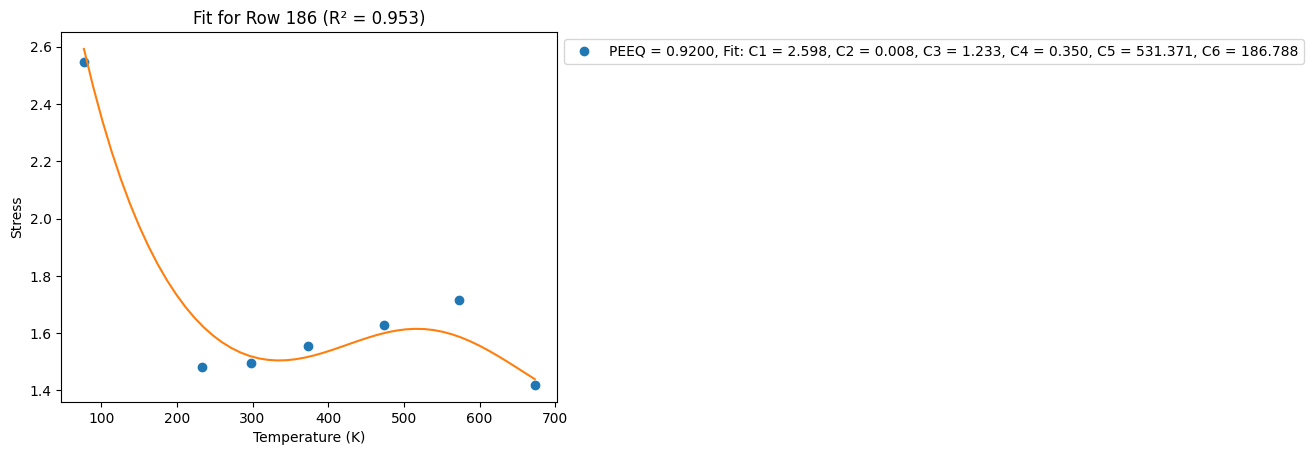

[2.55533763 1.48102193 1.49759137 1.55604969 1.62965551 1.71700866
 1.42078762]


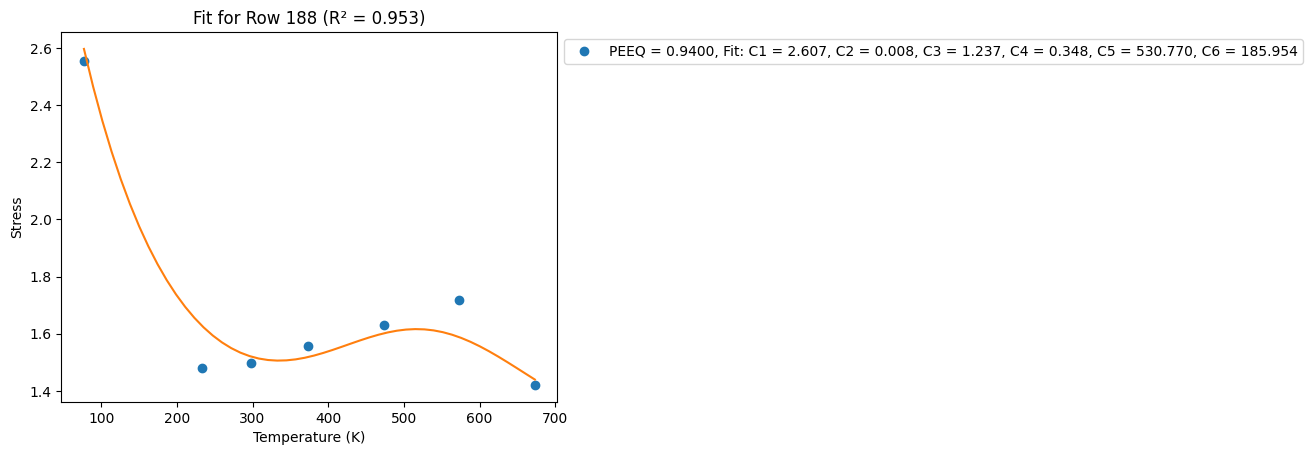

[2.56282109 1.48116788 1.49849493 1.55785027 1.63126719 1.71919075
 1.42242996]


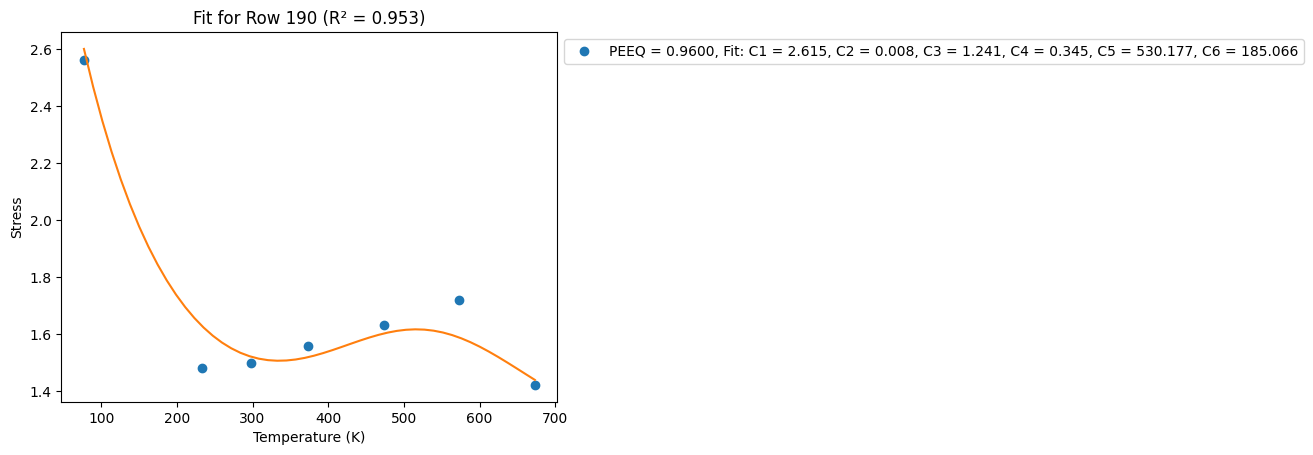

[2.57019635 1.48130823 1.49937579 1.5596134  1.63284218 1.72132475
 1.42403808]


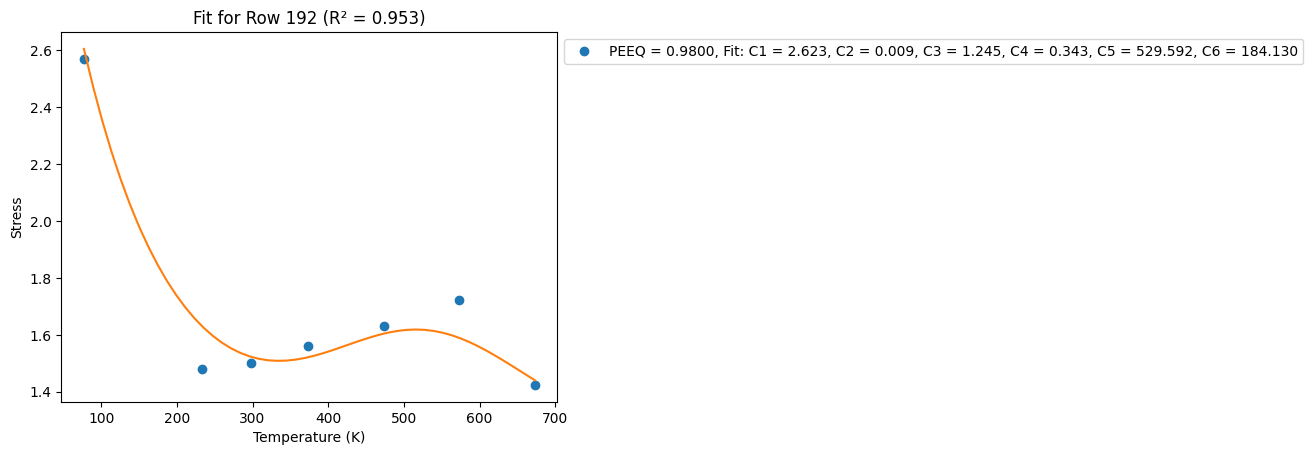

[2.57746716 1.48144328 1.50023494 1.56134059 1.63438204 1.72341269
 1.42561338]


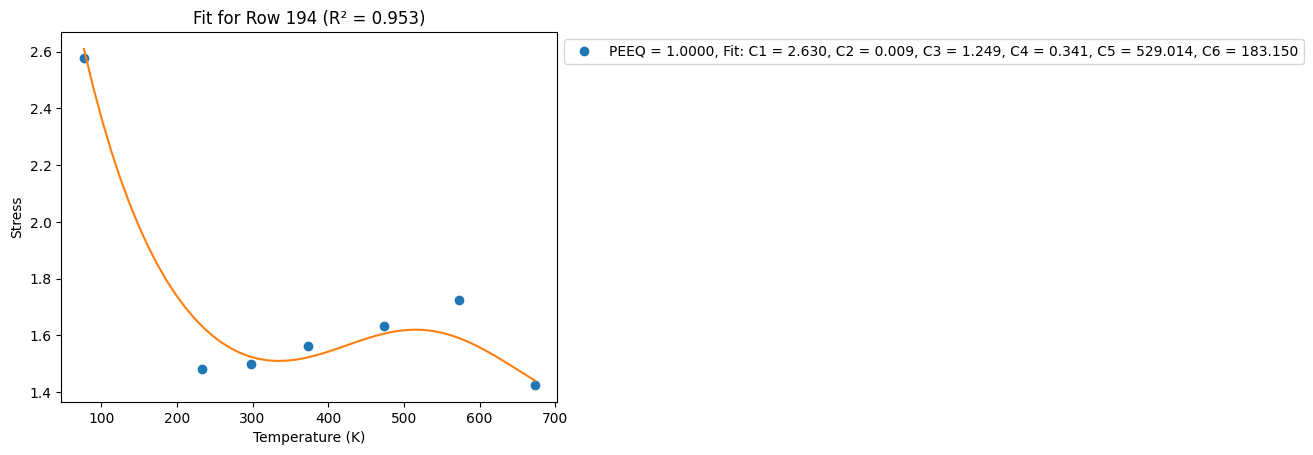

[2.58463707 1.48157335 1.50107336 1.56303328 1.63588823 1.72545646
 1.42715719]


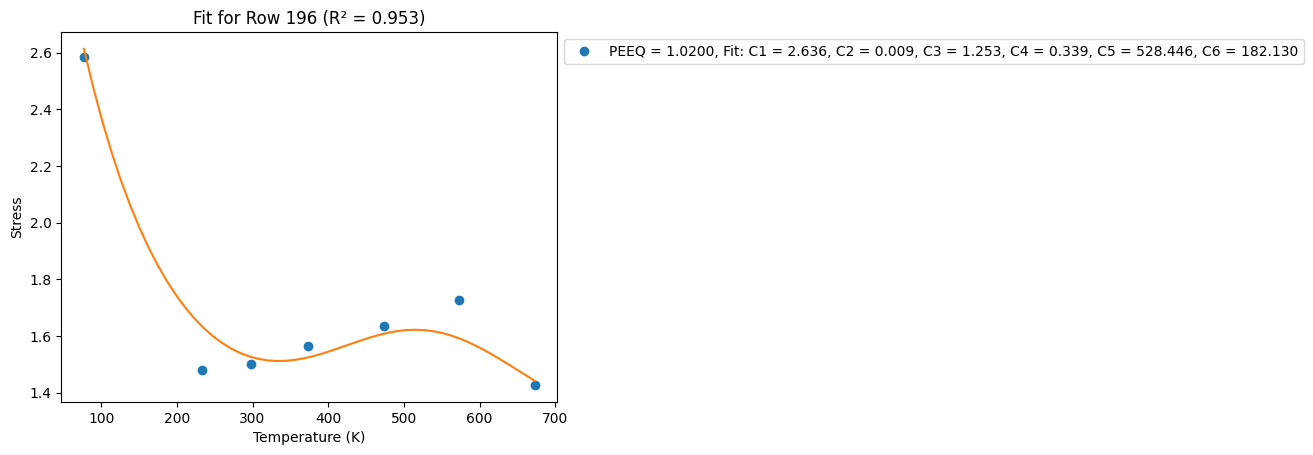

[2.59170943 1.48169871 1.50189194 1.56469282 1.63736214 1.72745783
 1.42867072]


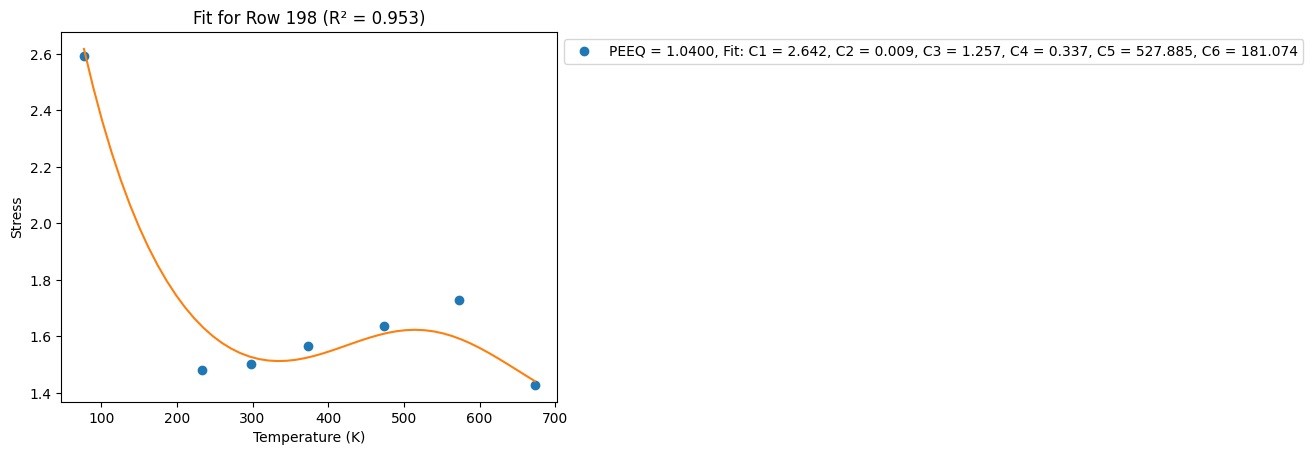

[2.59868742 1.48181962 1.50269152 1.56632049 1.63880507 1.72941849
 1.43015515]


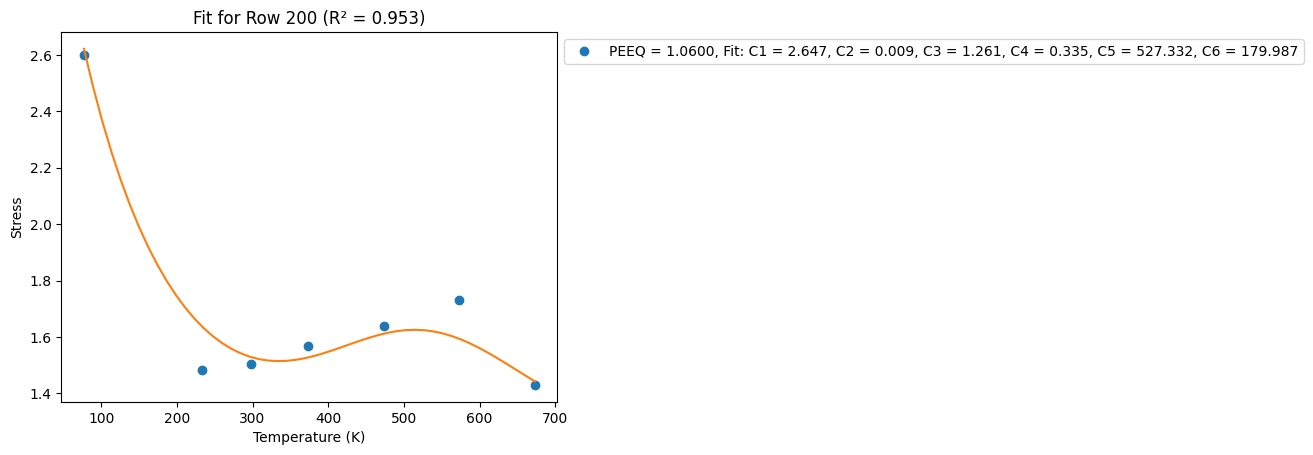

[2.60557407 1.48193632 1.50347289 1.56791749 1.64021823 1.73134002
 1.43161158]


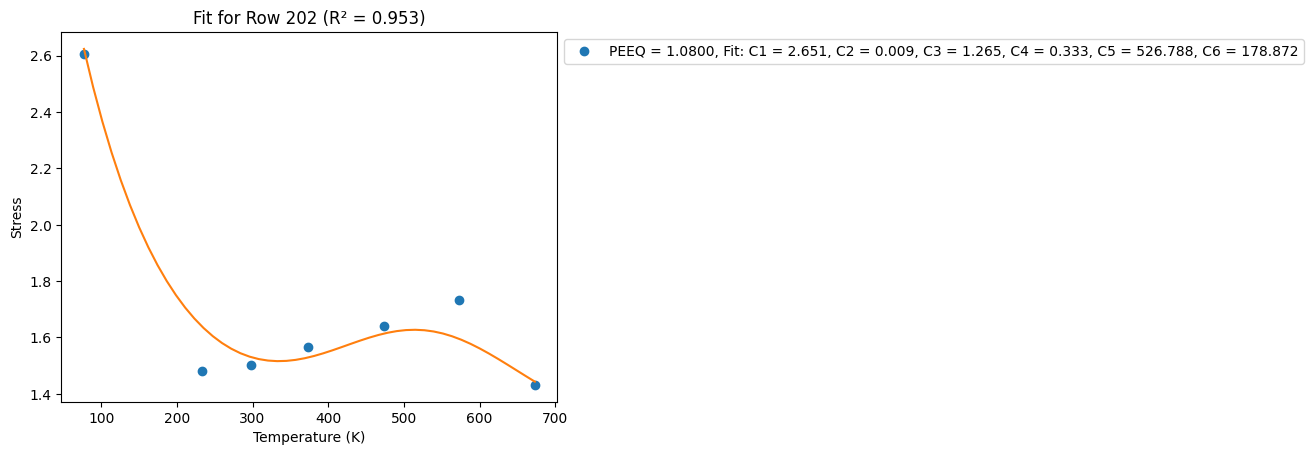

[2.61237225 1.48204902 1.50423679 1.56948496 1.64160279 1.7332239
 1.43304104]


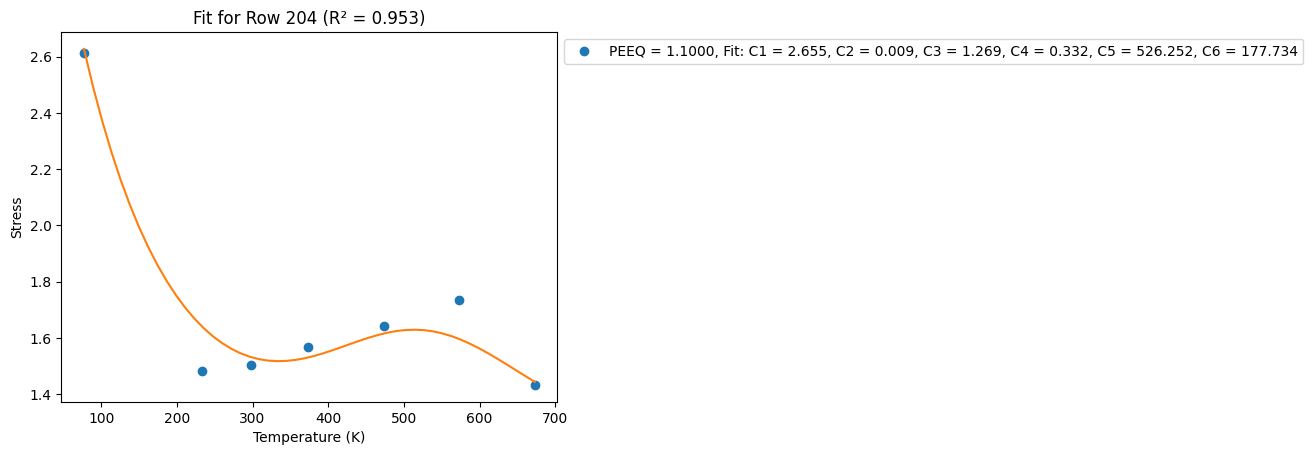

[2.61908469 1.48215794 1.50498393 1.57102397 1.64295982 1.73507155
 1.43444451]


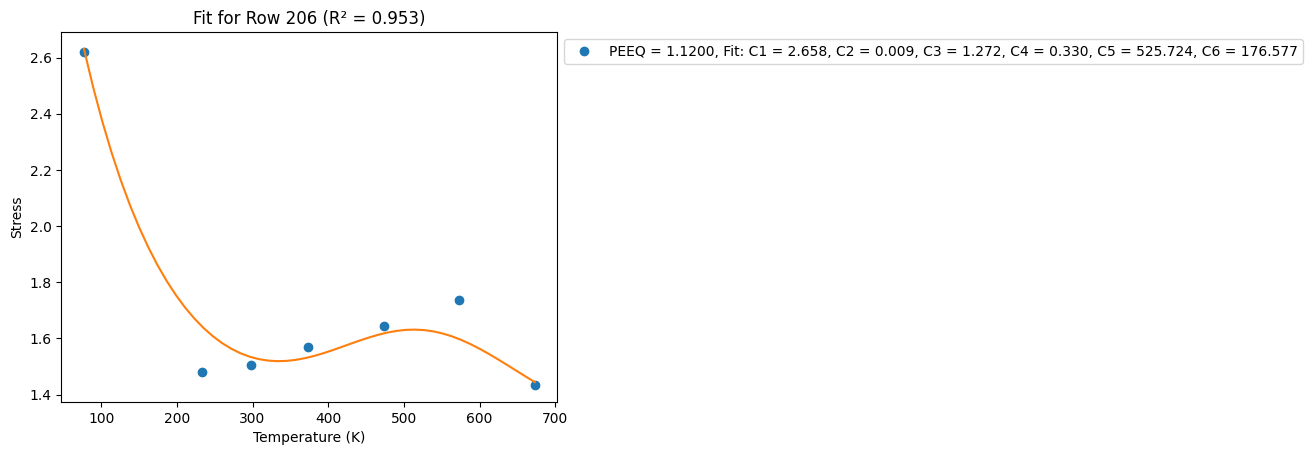

[2.62571398 1.48226326 1.50571496 1.57253553 1.64429036 1.73688429
 1.43582292]


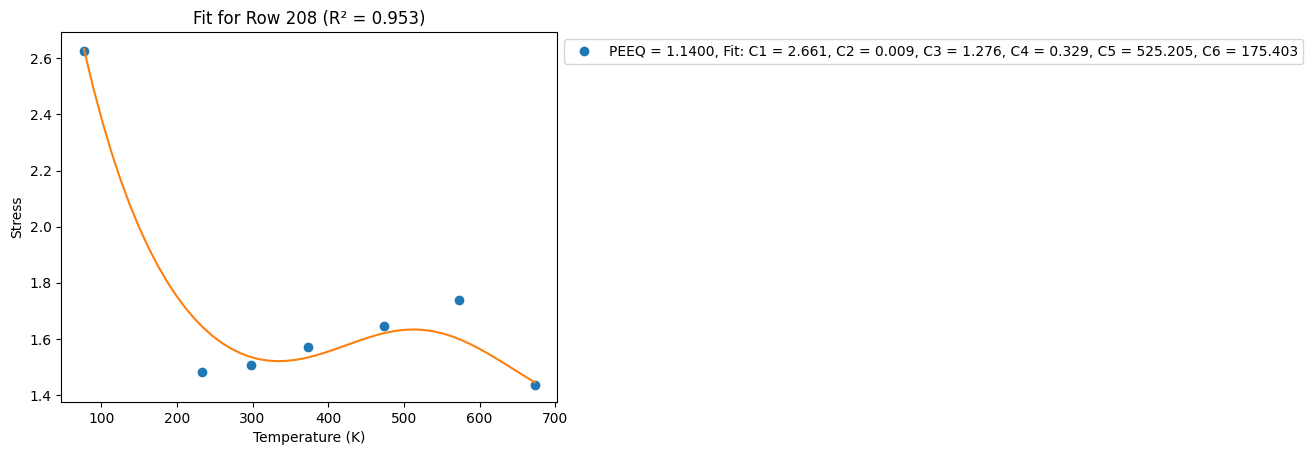

[2.63226259 1.48236516 1.50643051 1.5740206  1.64559538 1.73866339
 1.43717715]


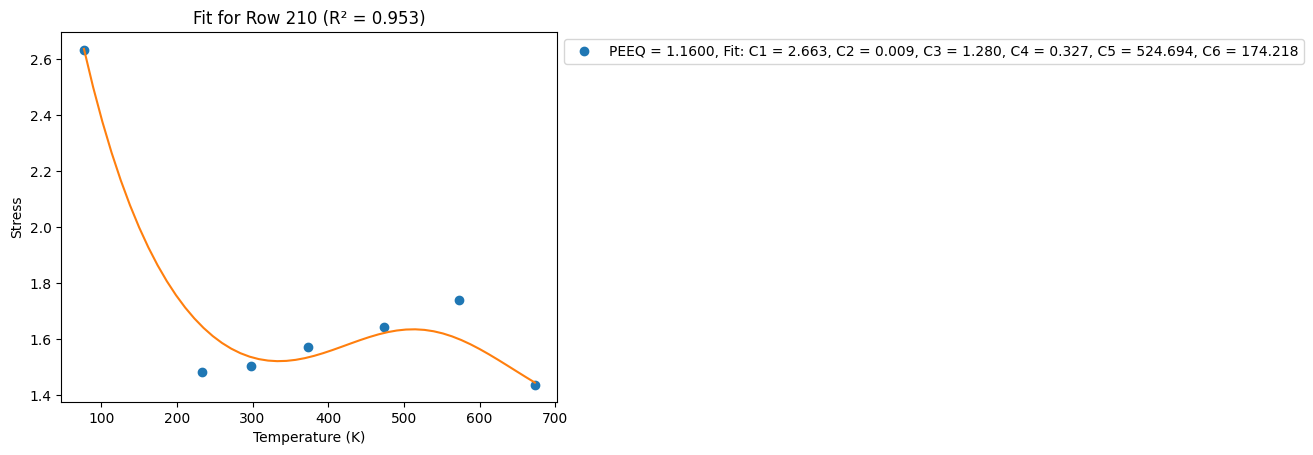

[2.6387329  1.48246382 1.50713116 1.57548011 1.6468758  1.74041004
 1.43850803]


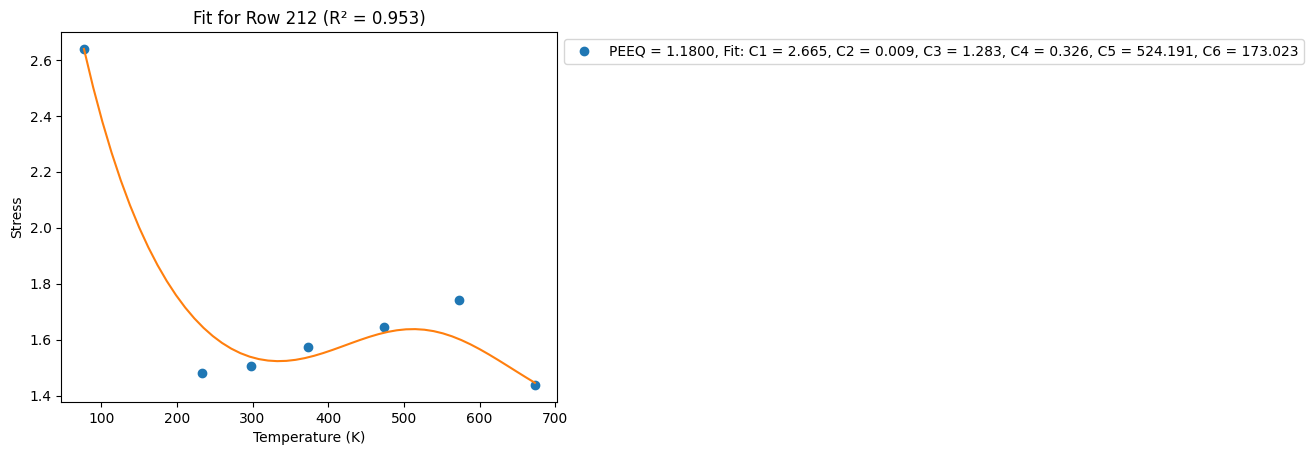

[2.64512714 1.48255939 1.50781748 1.57691491 1.64813249 1.74212537
 1.43981636]


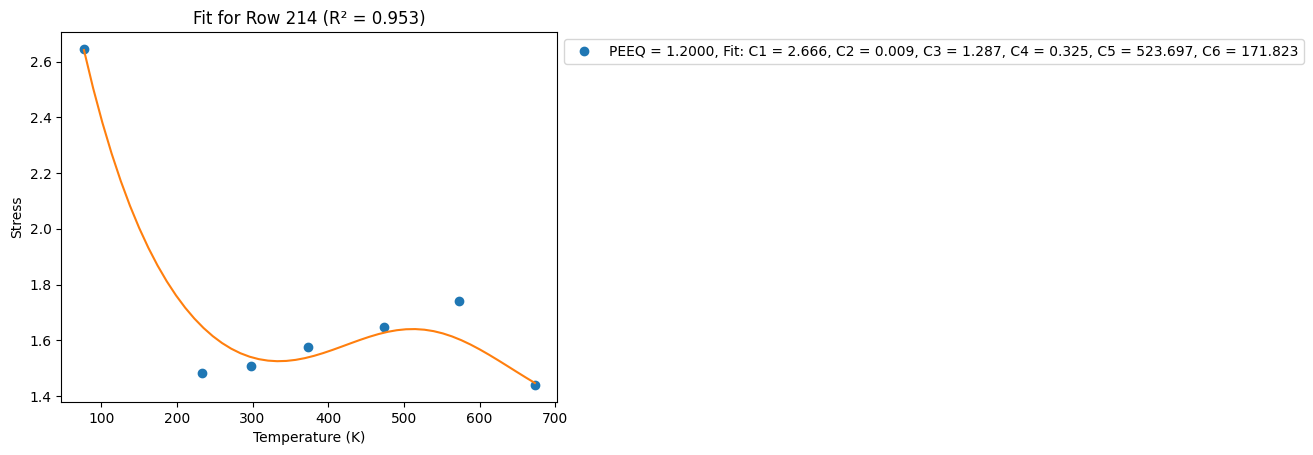

[2.65144747 1.48265201 1.50848998 1.57832583 1.64936628 1.74381045
 1.44110288]


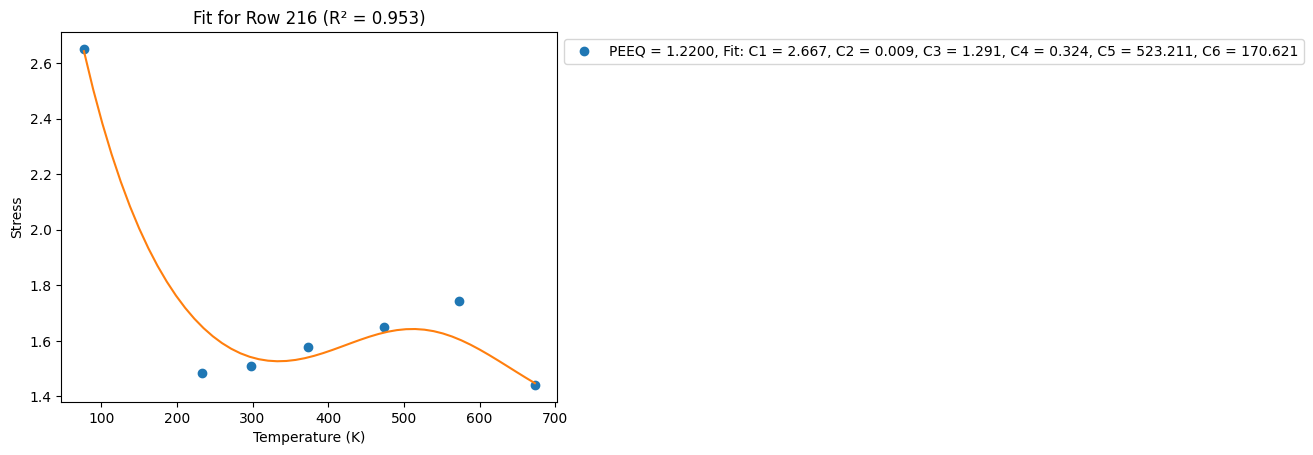

[2.65769595 1.48274182 1.50914918 1.57971364 1.65057796 1.74546631
 1.44236832]


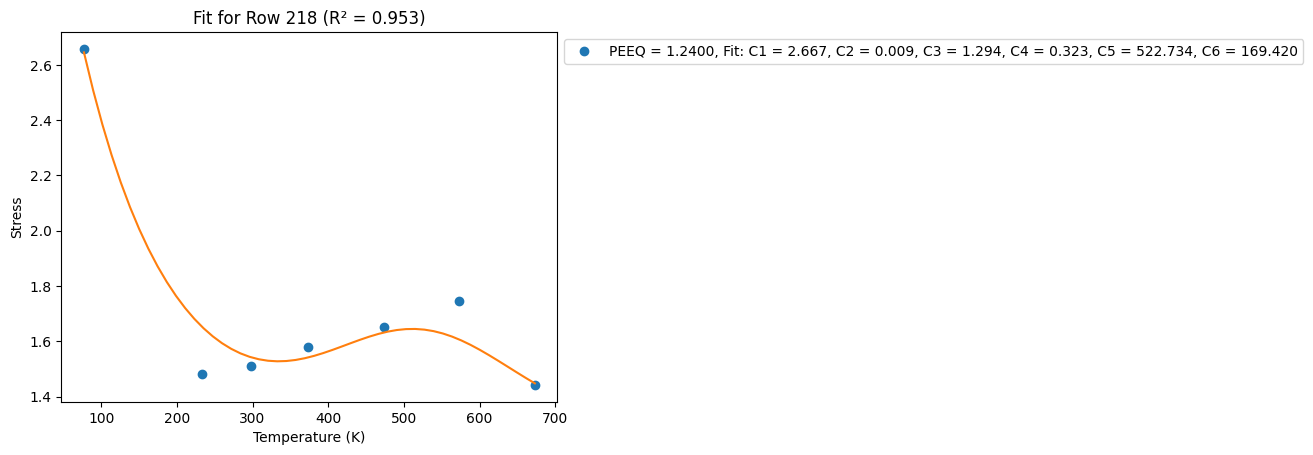

[2.66387453 1.48282895 1.50979554 1.58107911 1.65176827 1.74709391
 1.44361335]


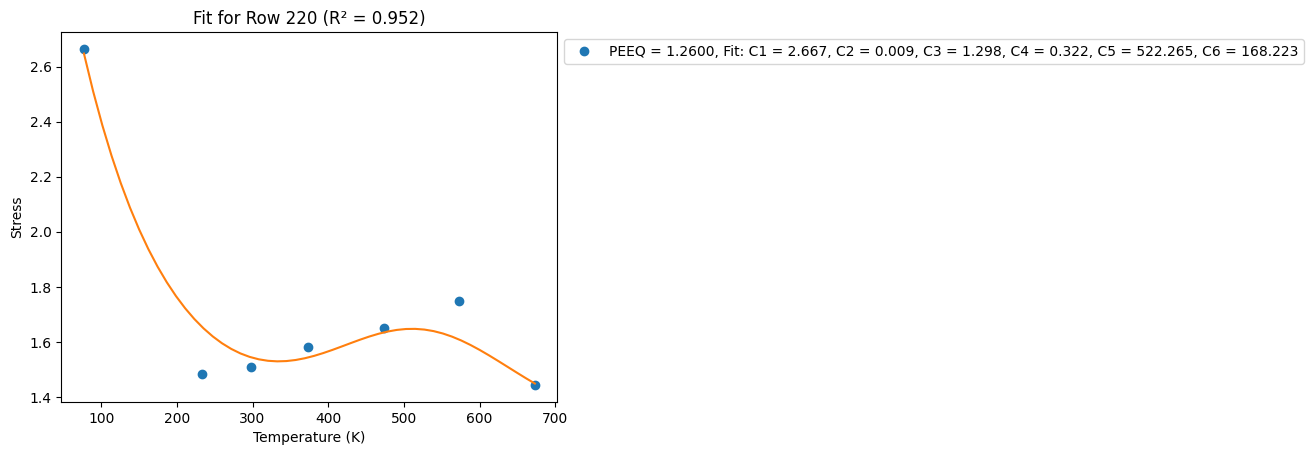

[2.66998511 1.48291352 1.5104295  1.58242293 1.65293791 1.74869418
 1.44483861]


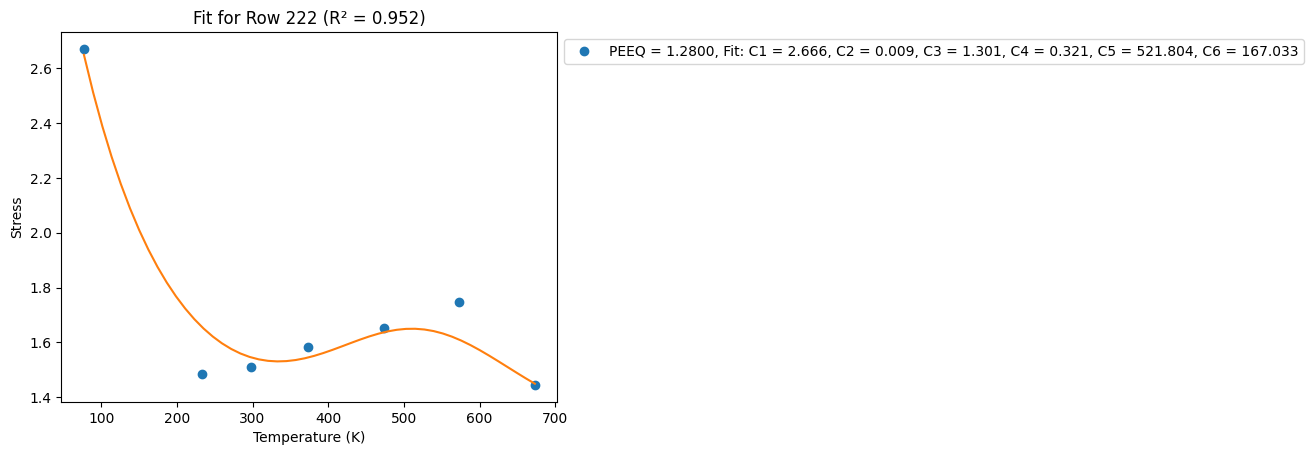

[2.67602948 1.48299565 1.51105151 1.58374578 1.65408757 1.75026799
 1.44604474]


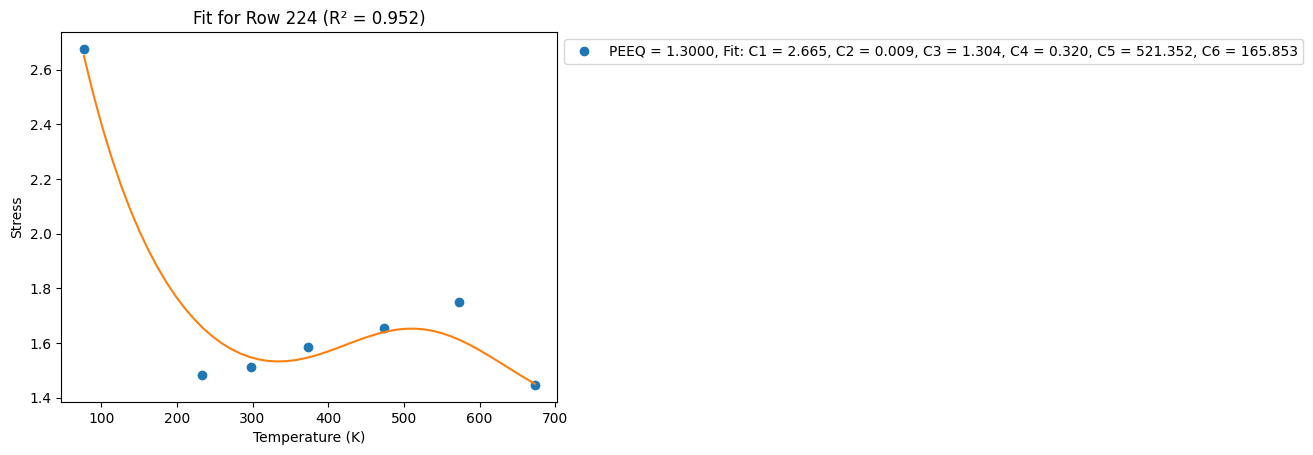

[2.68200936 1.48307543 1.51166196 1.5850483  1.65521789 1.75181618
 1.44723231]


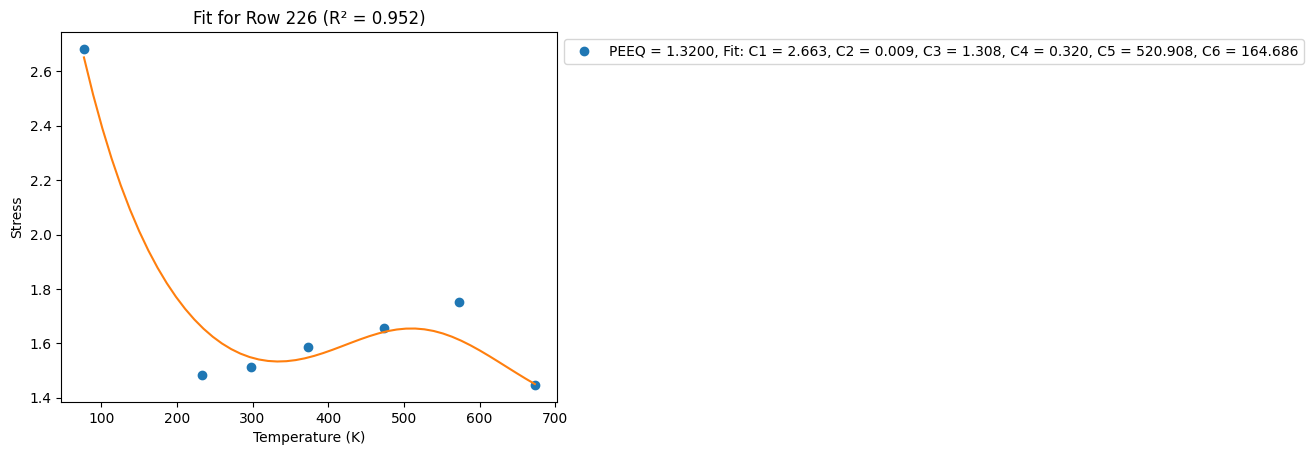

[2.68792643 1.48315298 1.51226124 1.58633112 1.65632948 1.75333956
 1.44840189]


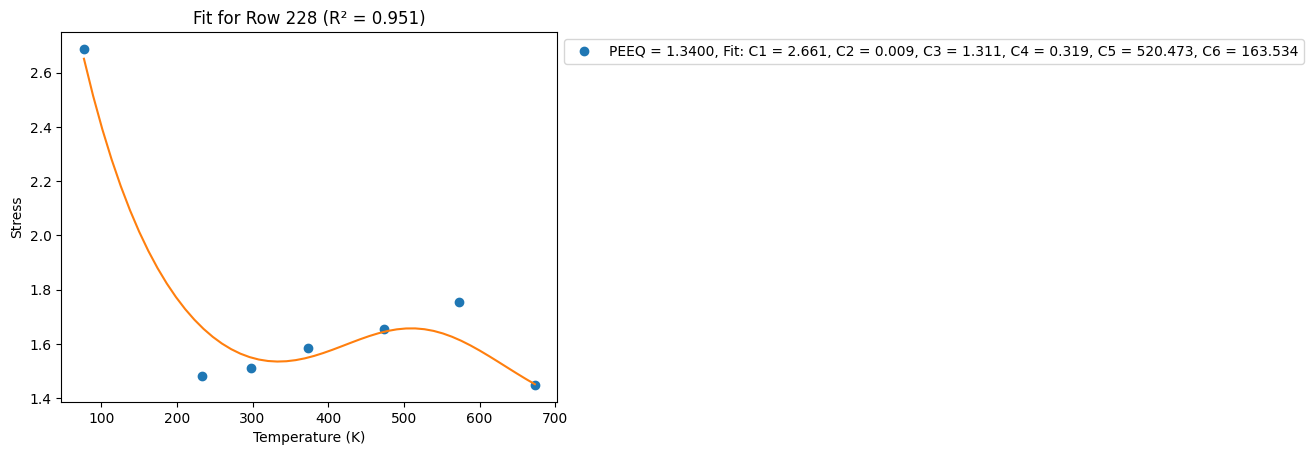

[2.69378226 1.48322839 1.51284972 1.58759481 1.65742293 1.75483887
 1.44955402]


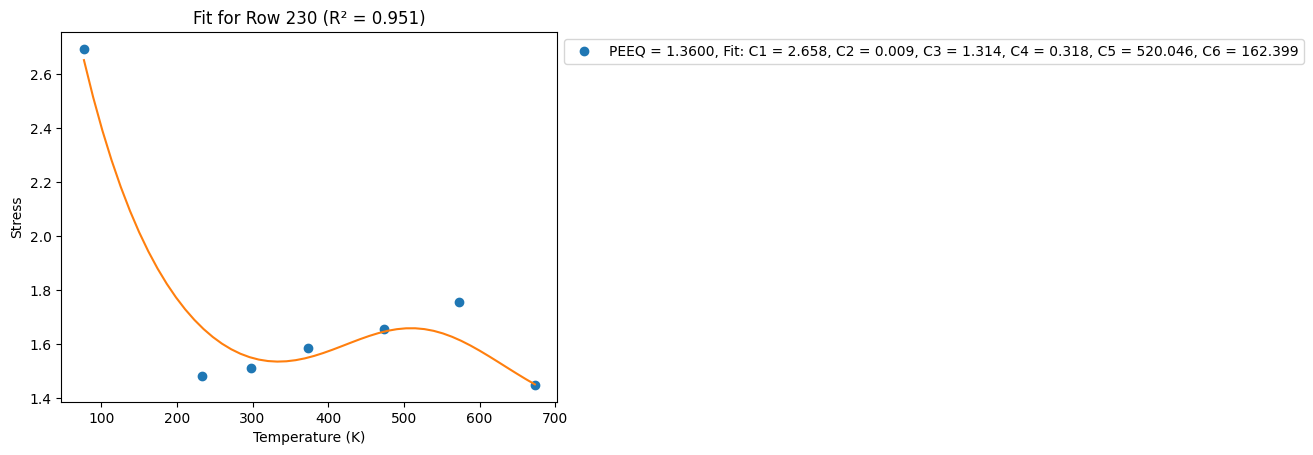

[2.69957839 1.48330174 1.51342775 1.58883995 1.6584988  1.75631486
 1.4506892 ]


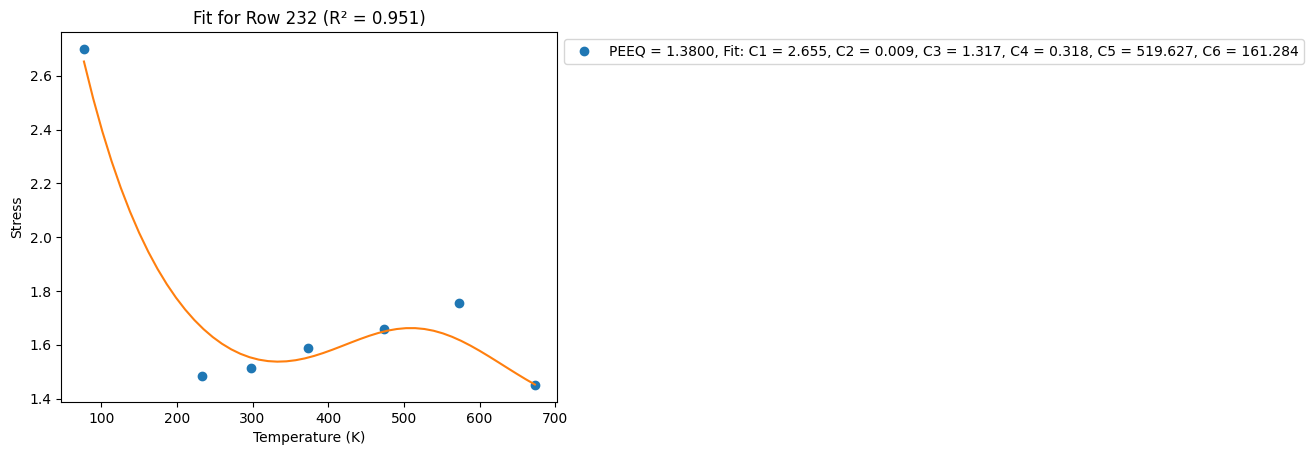

[2.70531628 1.48337313 1.51399566 1.59006706 1.65955761 1.75776822
 1.45180793]


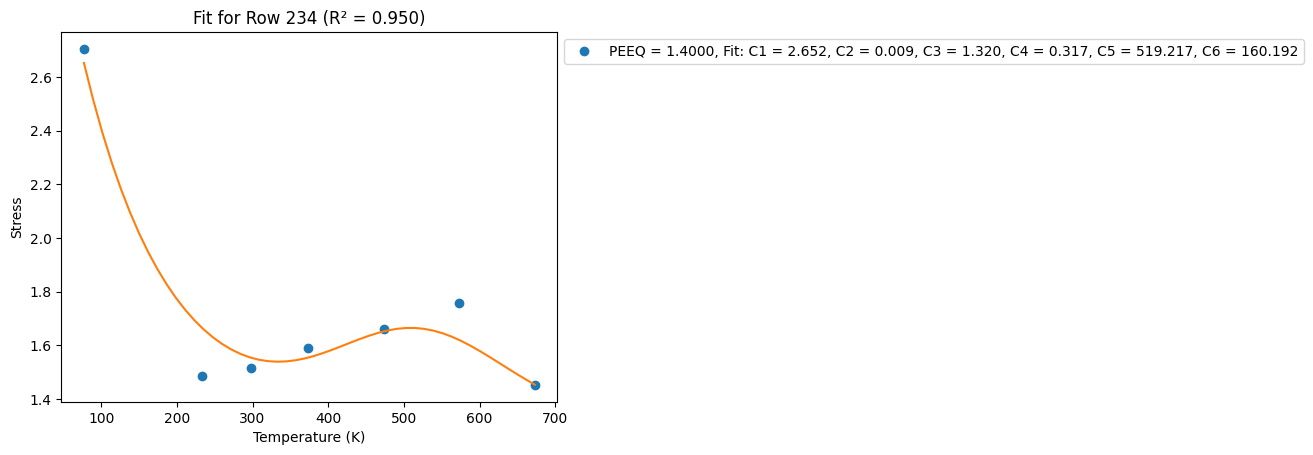

[2.71099734 1.48344262 1.51455378 1.59127667 1.66059988 1.75919961
 1.45291069]


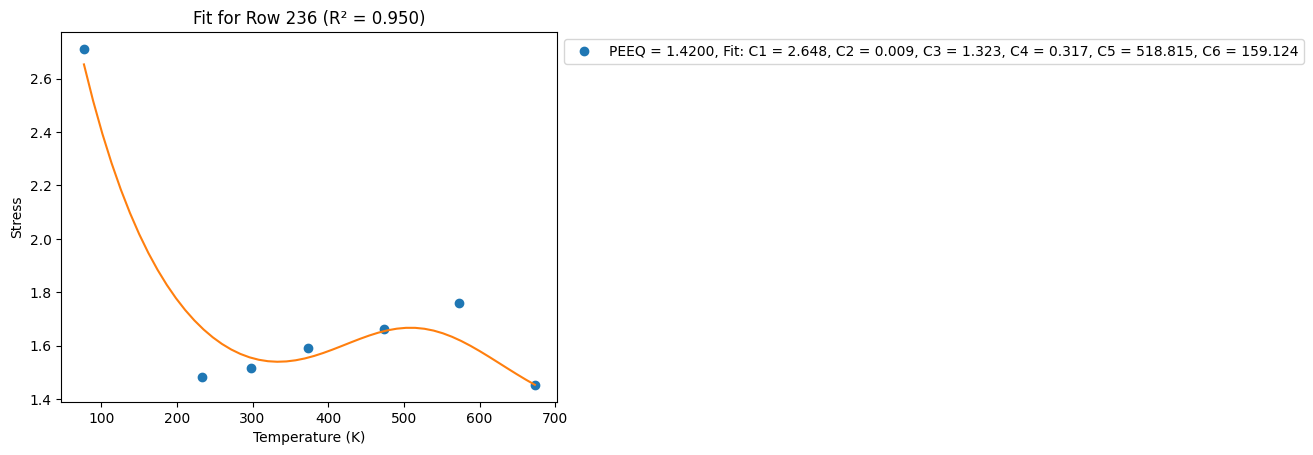

[2.71662293 1.48351031 1.5151024  1.59246926 1.66162609 1.76060966
 1.45399791]


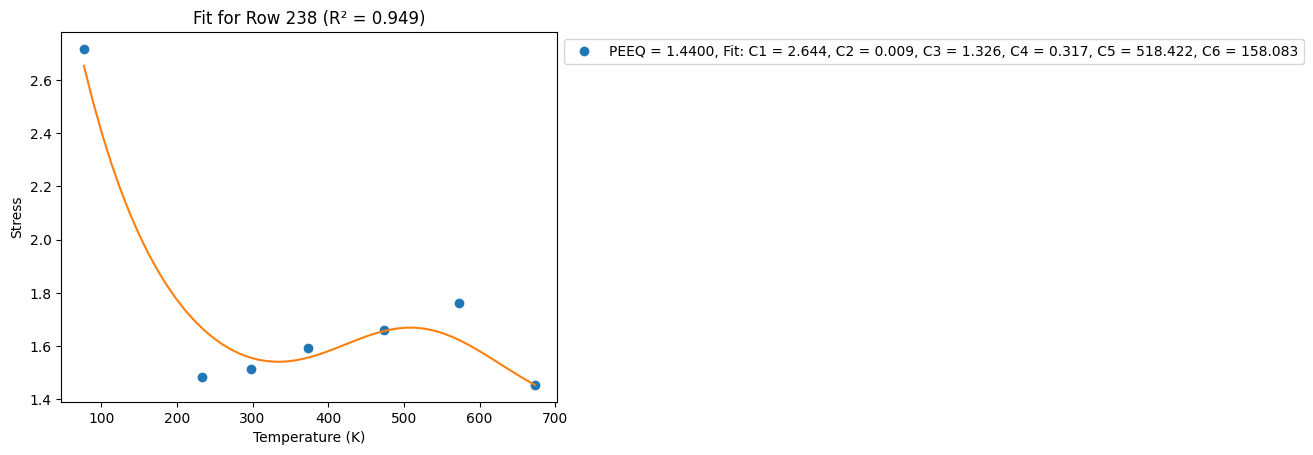

[2.72219435 1.48357625 1.51564182 1.59364531 1.66263672 1.76199899
 1.45507004]


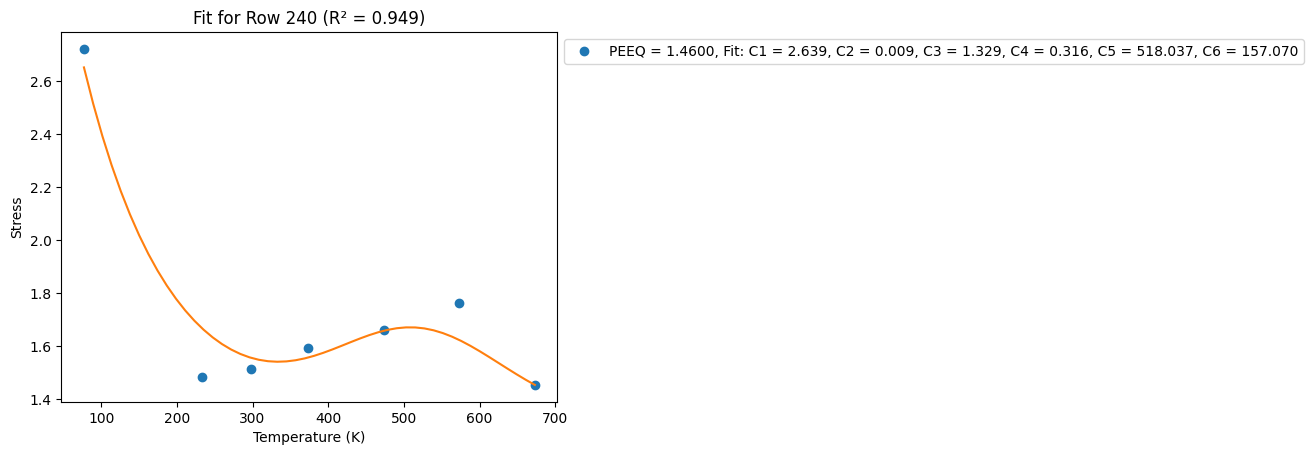

[2.72771287 1.48364052 1.51617231 1.59480528 1.6636322  1.76336819
 1.45612748]


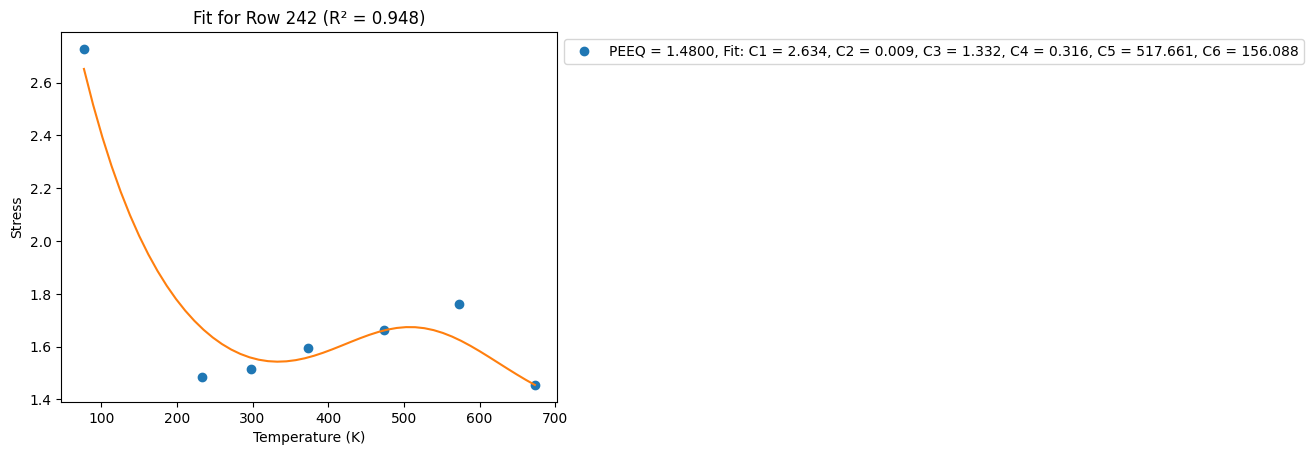

[2.73317969 1.48370317 1.51669414 1.59594958 1.66461297 1.7647178
 1.45717063]


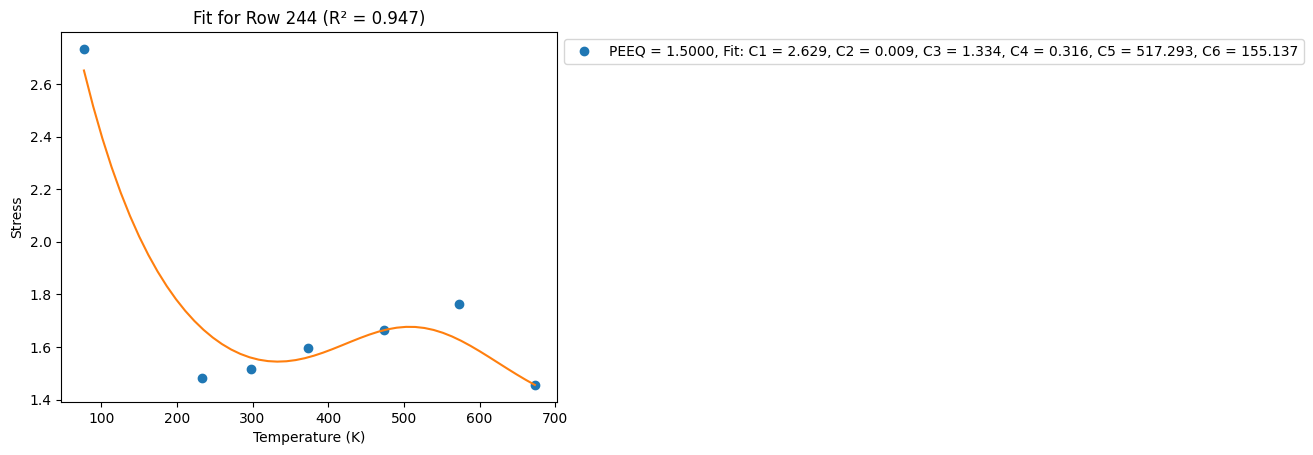

[2.73859598 1.48376428 1.51720757 1.59707865 1.66557944 1.76604838
 1.45819987]


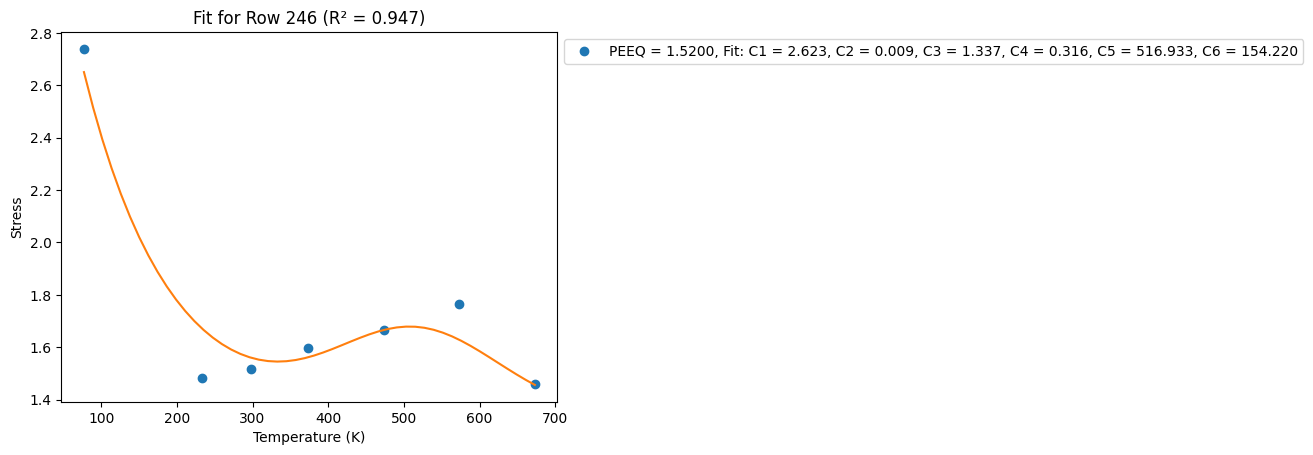

[2.74396288 1.4838239  1.51771284 1.59819289 1.666532   1.76736043
 1.45921558]


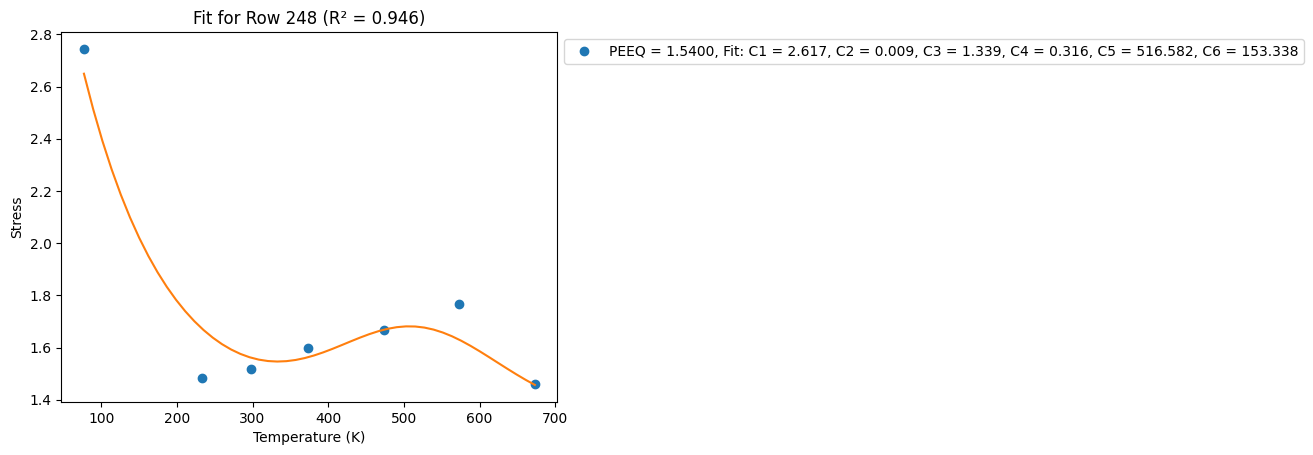

[2.74928146 1.48388209 1.51821018 1.59929267 1.66747103 1.76865445
 1.46021809]


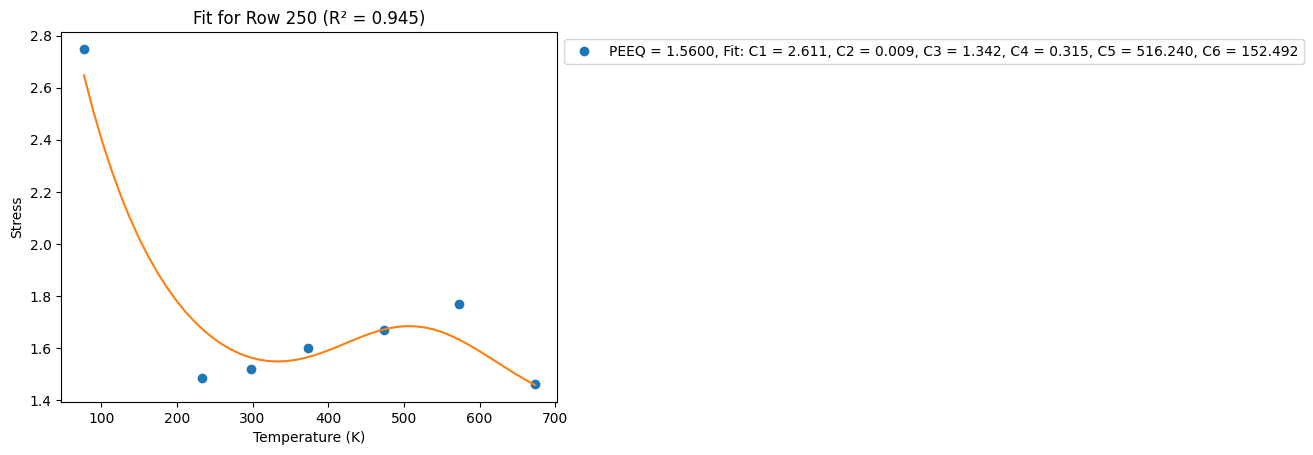

[2.75455278 1.48393889 1.51869982 1.60037837 1.66839689 1.76993091
 1.46120775]


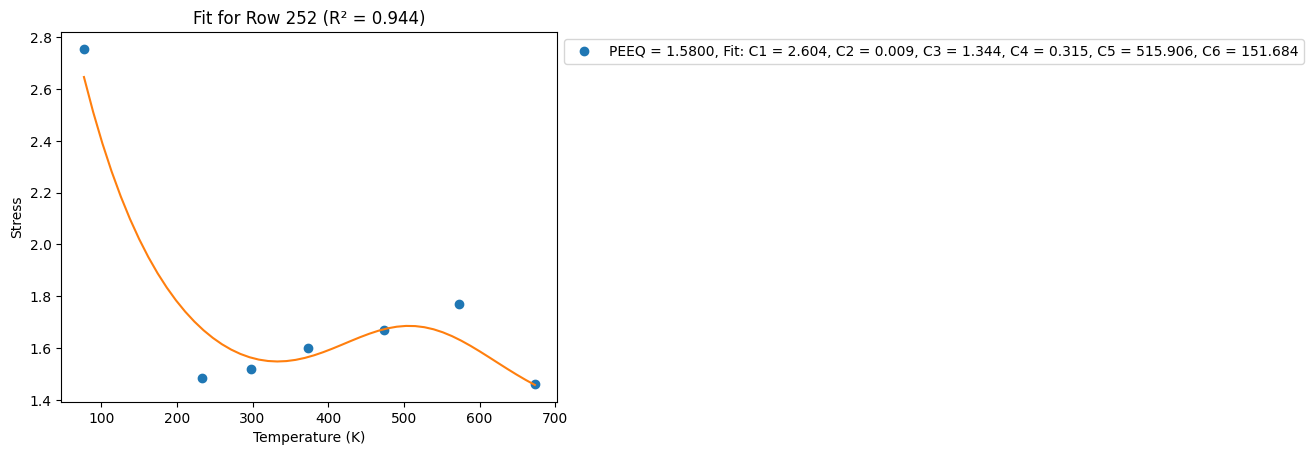

[2.75977785 1.48399436 1.51918197 1.60145035 1.66930994 1.77119028
 1.46218489]


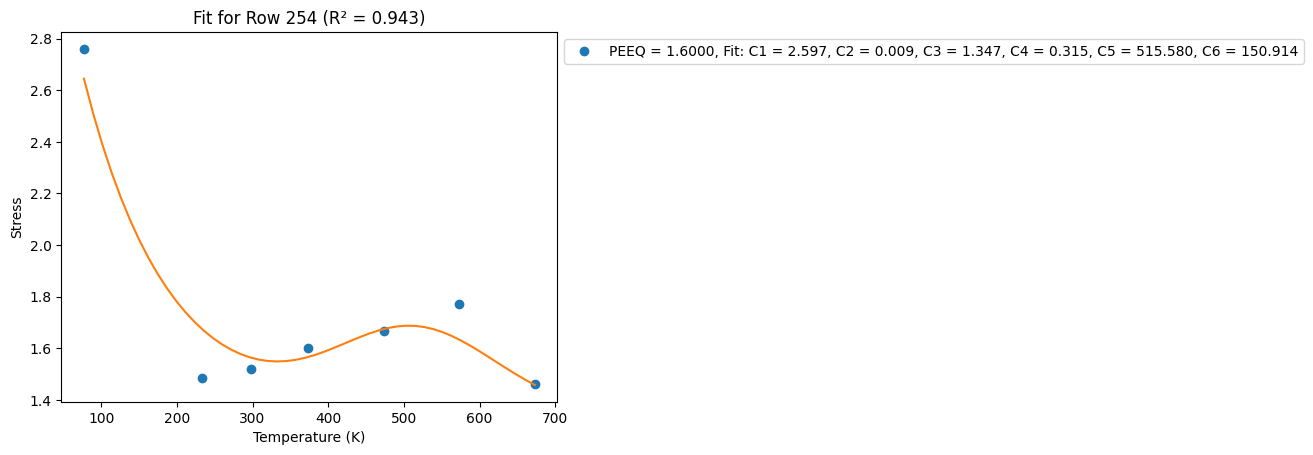

[2.76495765 1.48404854 1.51965684 1.60250894 1.6702105  1.77243298
 1.46314981]


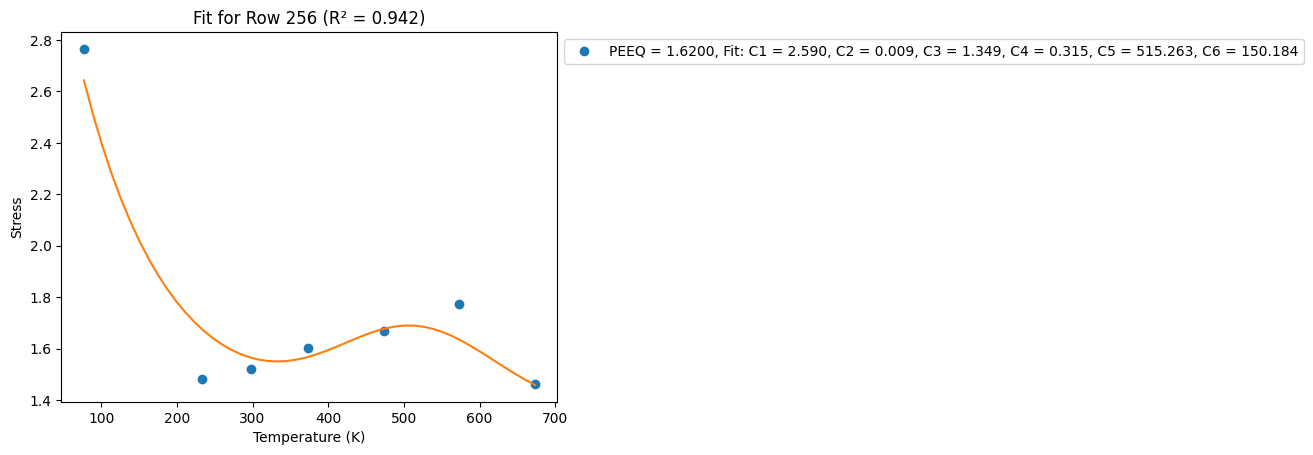

[2.77009313 1.48410149 1.52012464 1.60355449 1.67109889 1.77365946
 1.46410283]


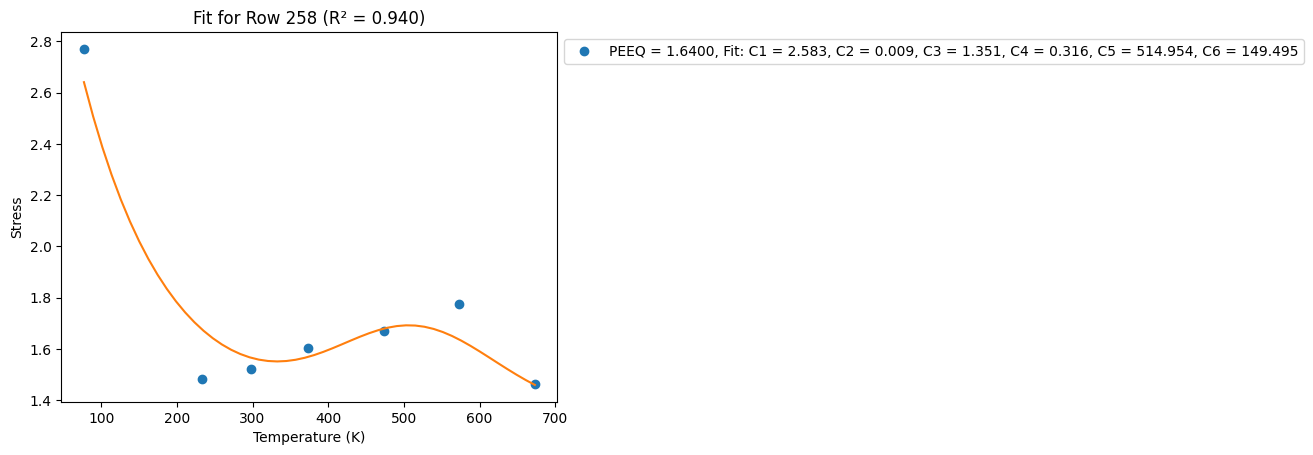

[2.77518521 1.48415323 1.52058553 1.60458729 1.67197544 1.7748701
 1.46504422]


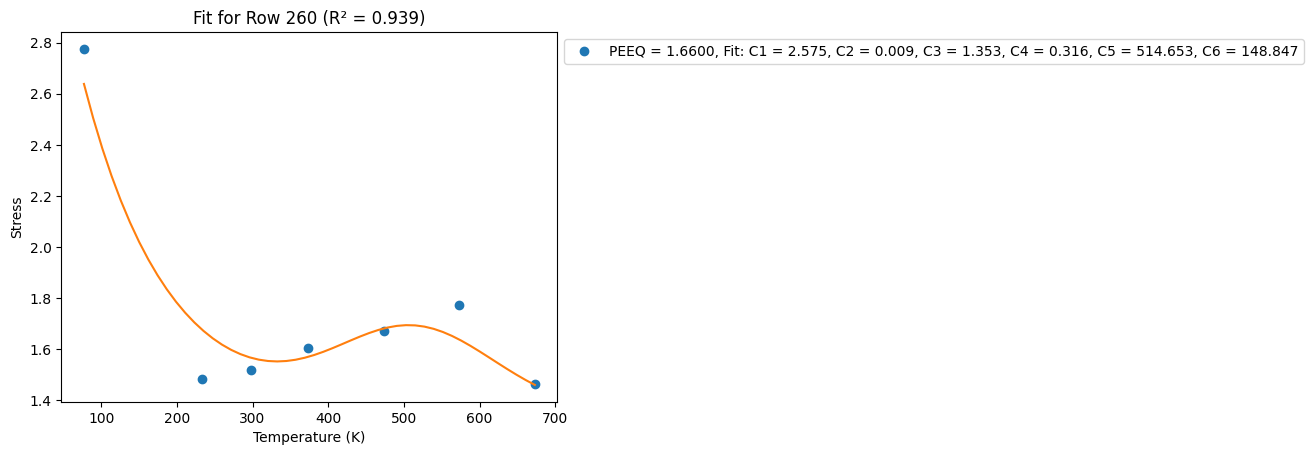

[2.78023477 1.48420382 1.52103972 1.60560768 1.67284043 1.77606531
 1.46597427]


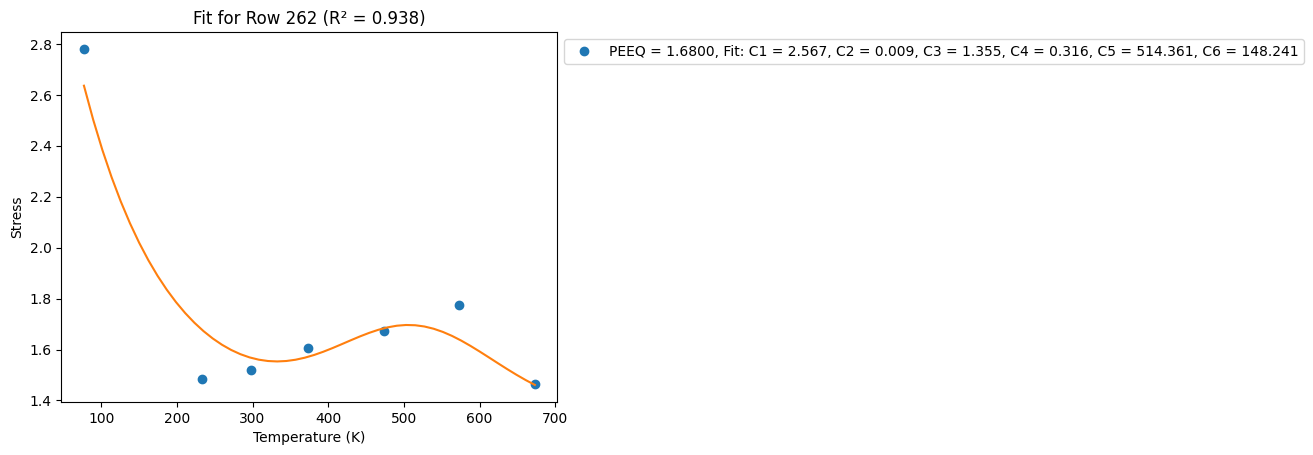

[2.78524267 1.4842533  1.52148738 1.60661593 1.67369416 1.77724547
 1.46689325]


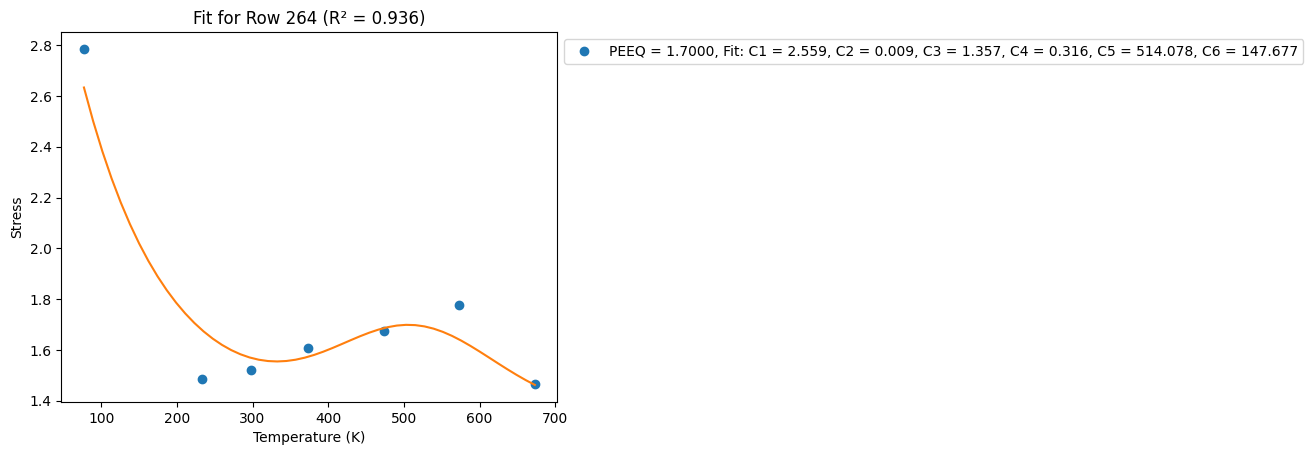

[2.79020974 1.48430169 1.52192868 1.60761233 1.67453691 1.77841093
 1.46780142]


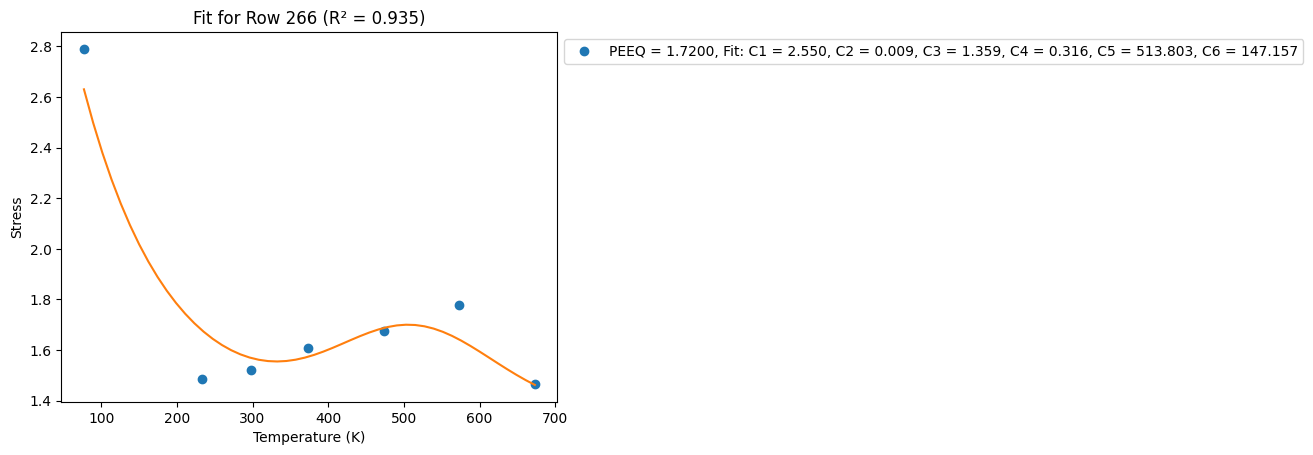

[2.79513678 1.48434904 1.52236377 1.60859716 1.67536893 1.77956204
 1.46869903]


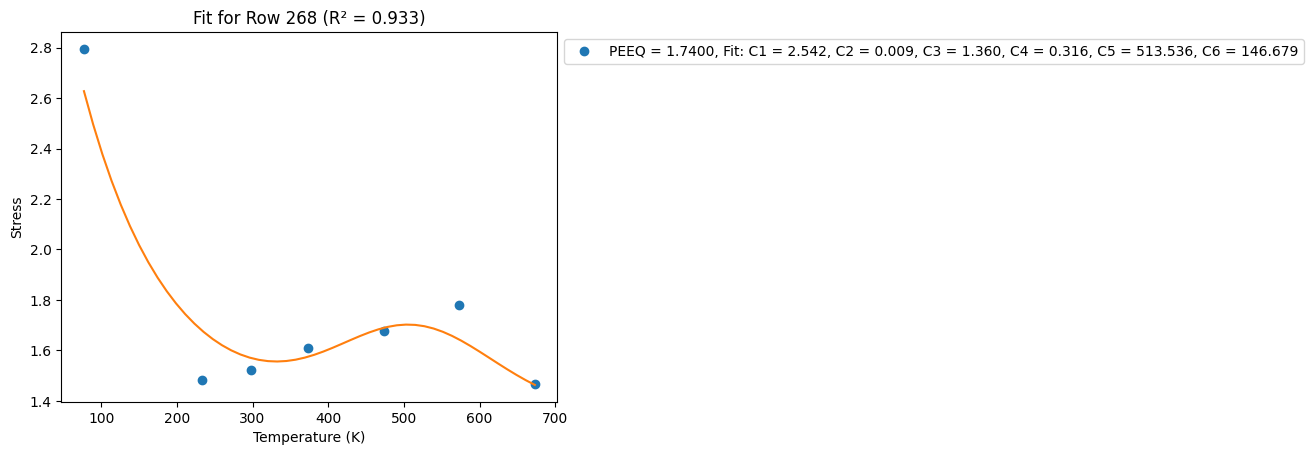

[2.80002458 1.48439538 1.52279283 1.60957069 1.67619049 1.78069916
 1.46958633]


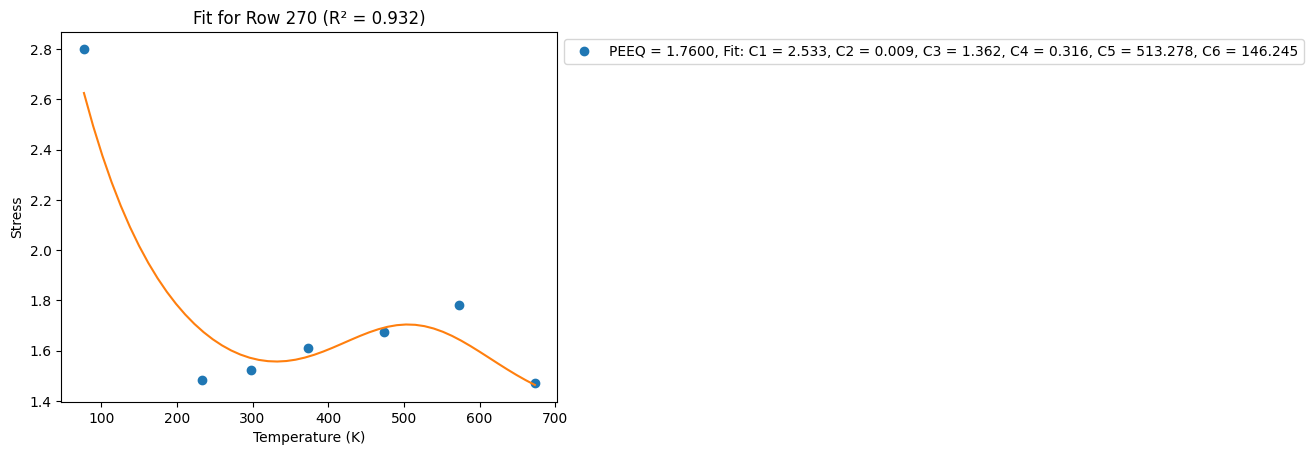

[2.80487389 1.48444074 1.52321599 1.61053317 1.67700184 1.7818226
 1.47046354]


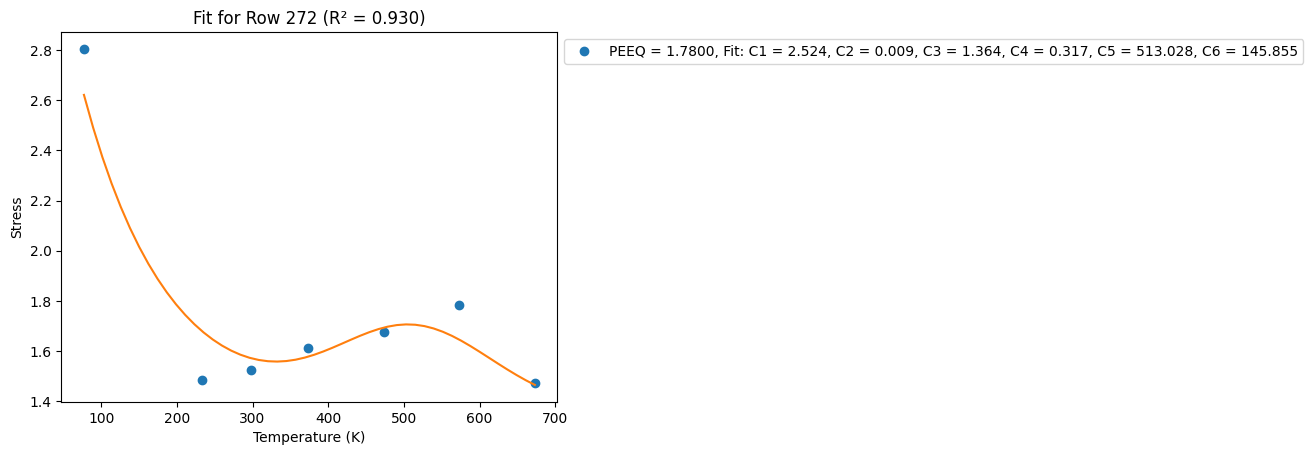

[2.80968544 1.48448516 1.52363341 1.61148485 1.67780322 1.78293269
 1.4713309 ]


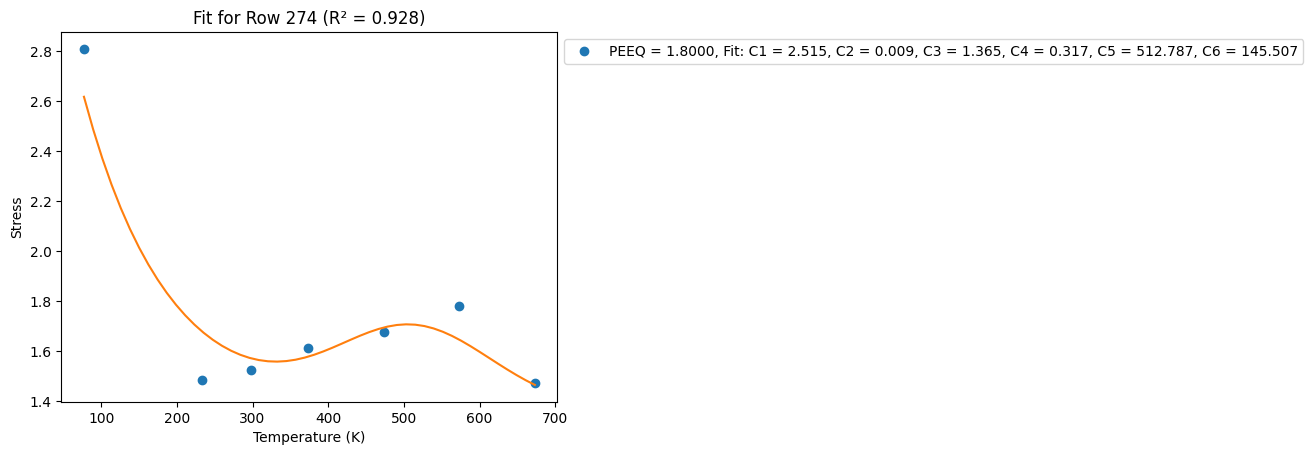

[2.81445994 1.48452866 1.52404522 1.61242597 1.67859486 1.78402972
 1.47218862]


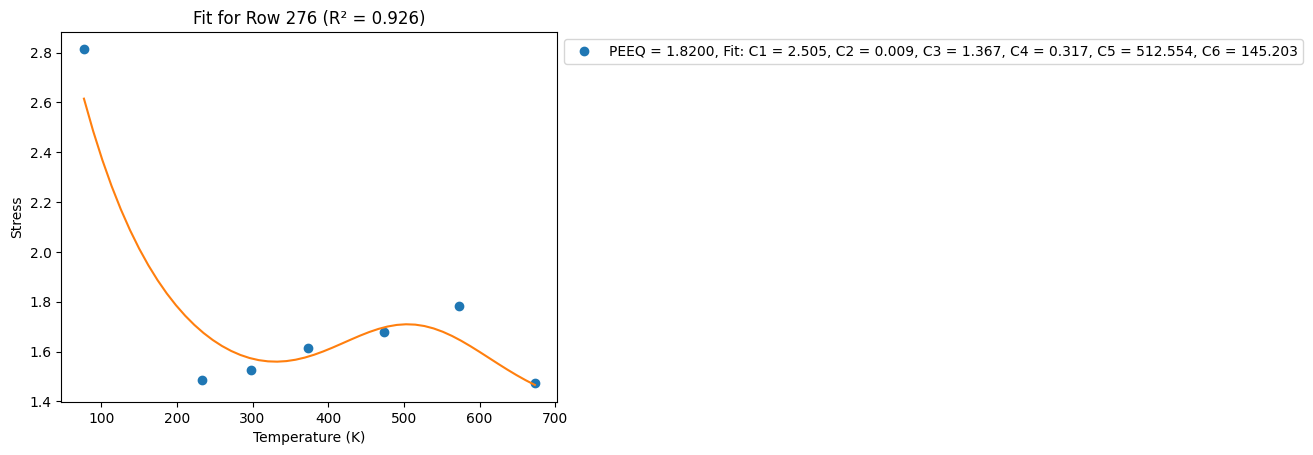

[2.81919809 1.48457127 1.52445157 1.61335677 1.67937697 1.78511399
 1.47303692]


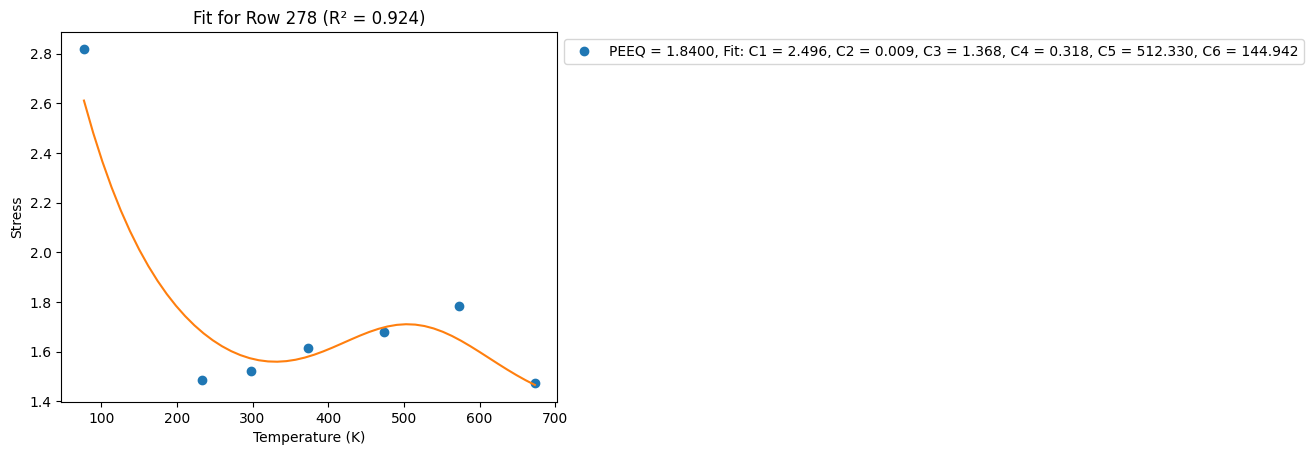

[2.82390055 1.48461303 1.52485258 1.61427745 1.68014979 1.7861858
 1.473876  ]


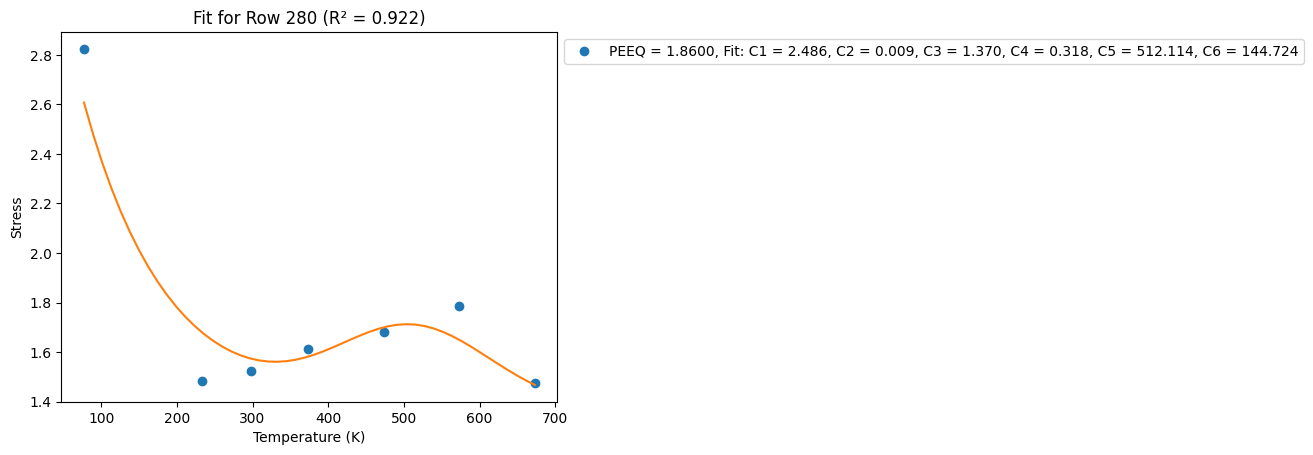

[2.82856798 1.48465395 1.52524838 1.61518825 1.68091352 1.7872454
 1.47470605]


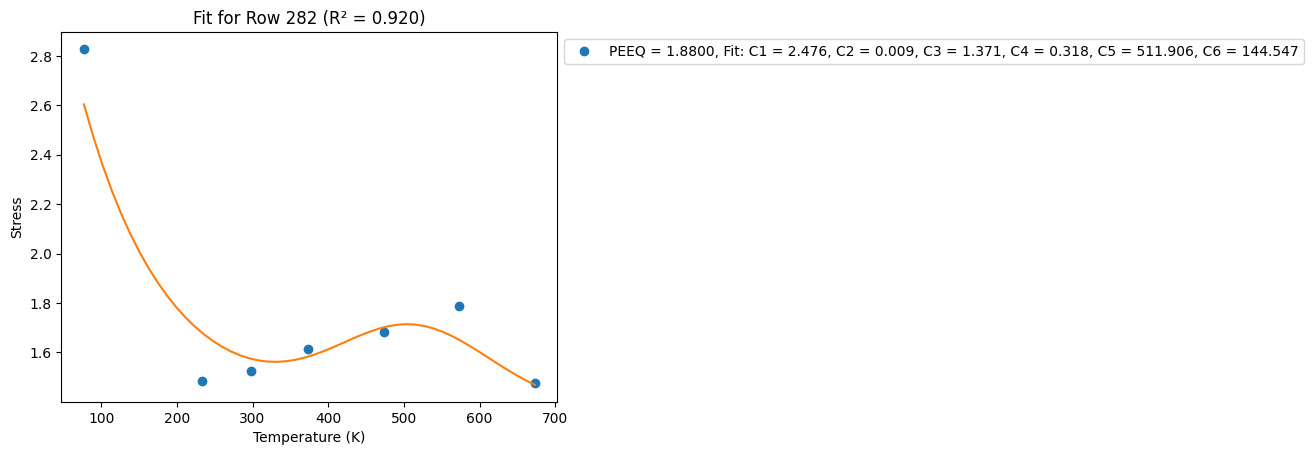

[2.833201   1.48469406 1.52563909 1.61608938 1.68166836 1.78829308
 1.47552728]


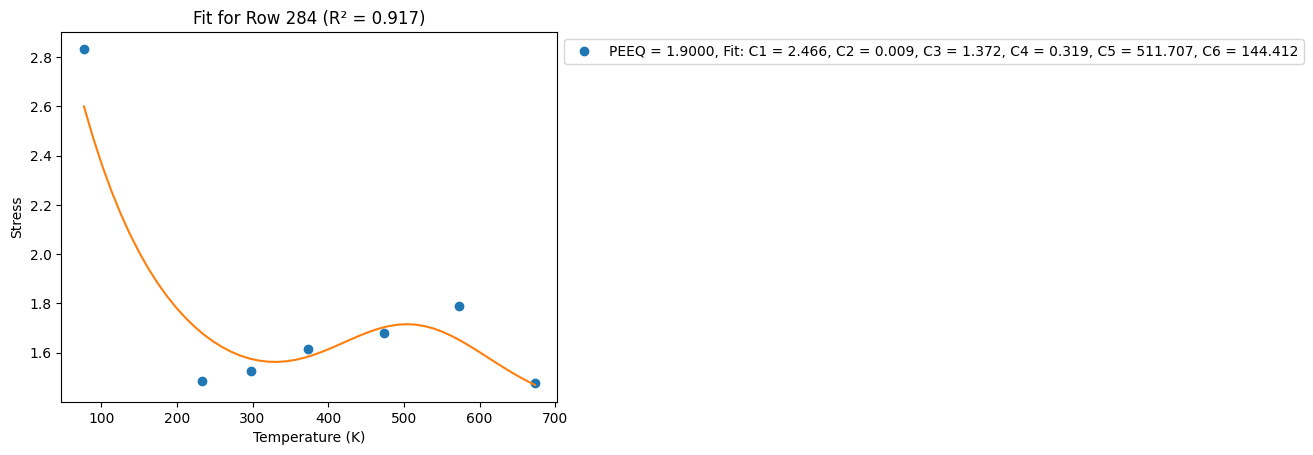

[2.83780023 1.48473339 1.52602484 1.61698103 1.68241451 1.78932908
 1.47633986]


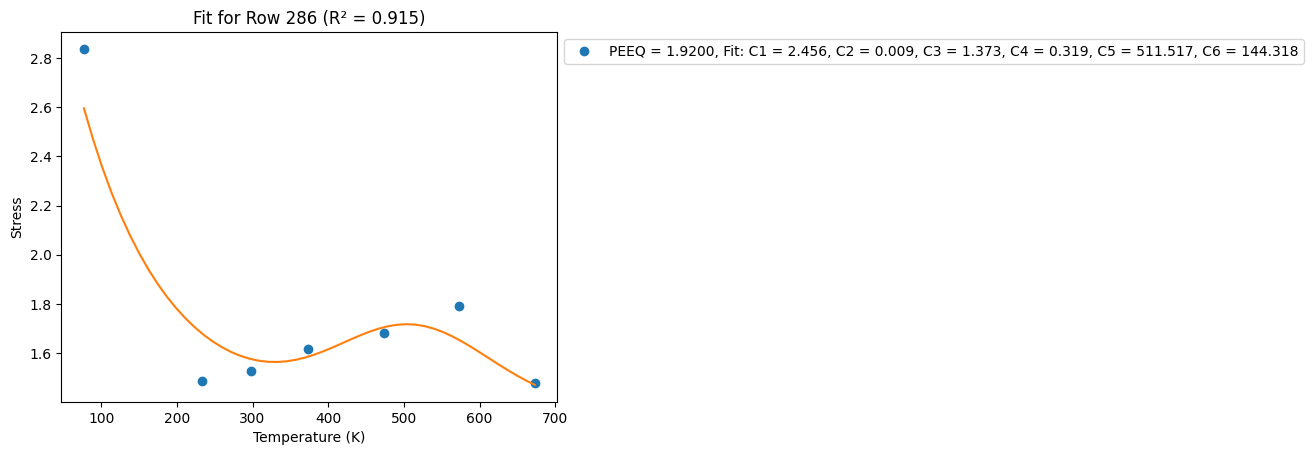

[2.84236626 1.48477196 1.52640573 1.61786341 1.68315215 1.79035366
 1.47714399]


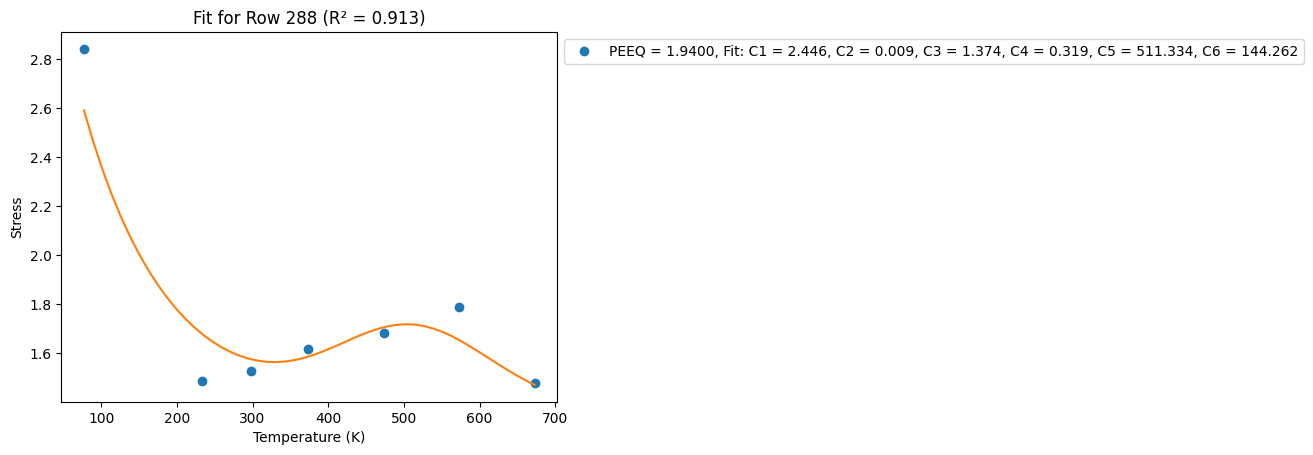

[2.84689968 1.48480979 1.52678187 1.6187367  1.68388147 1.79136707
 1.47793982]


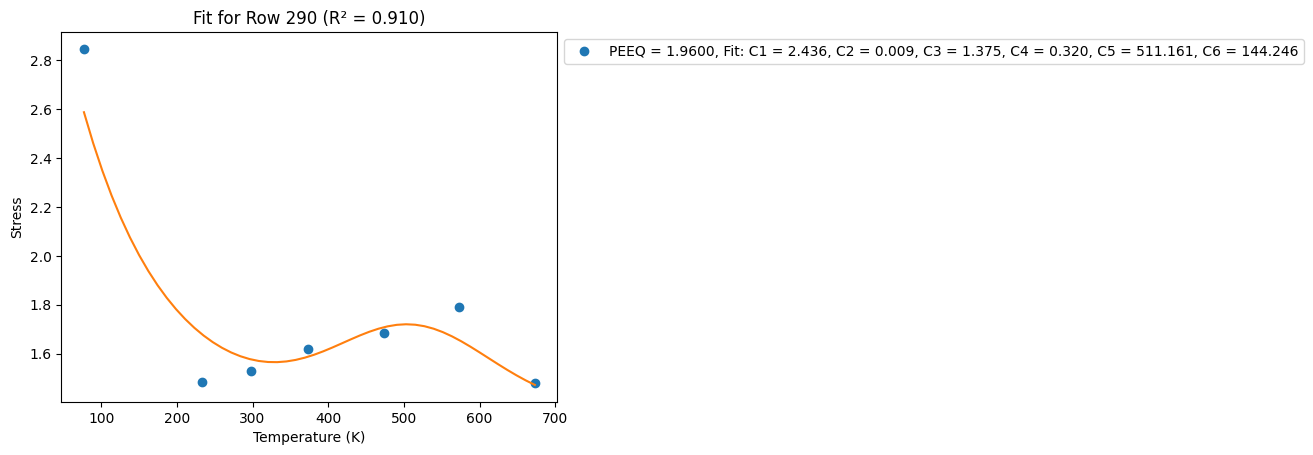

[2.85140105 1.4848469  1.52715337 1.61960109 1.68460265 1.79236953
 1.47872753]


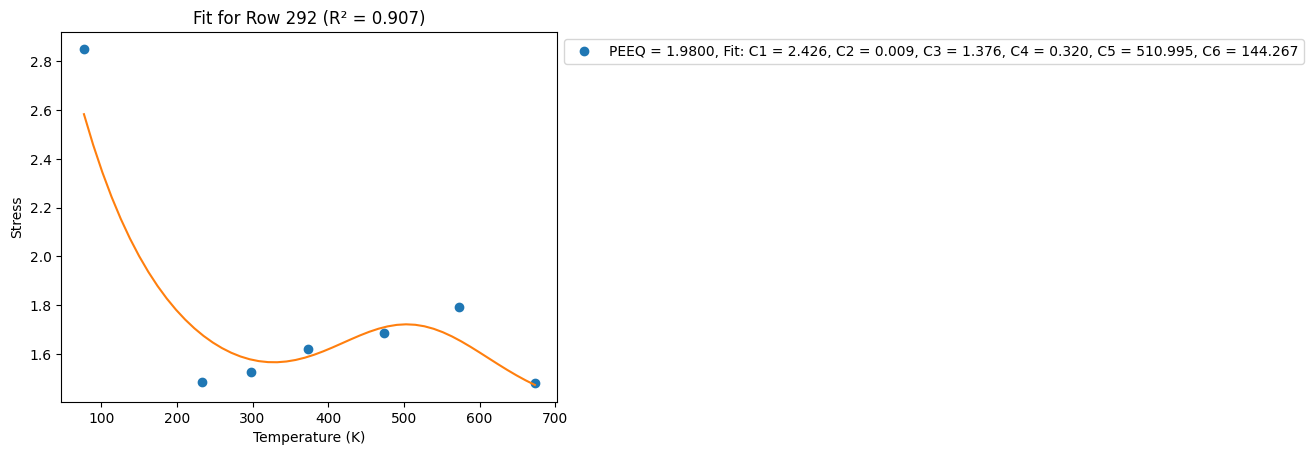

[2.85587092 1.48488332 1.52752035 1.62045676 1.68531587 1.79336128
 1.47950729]


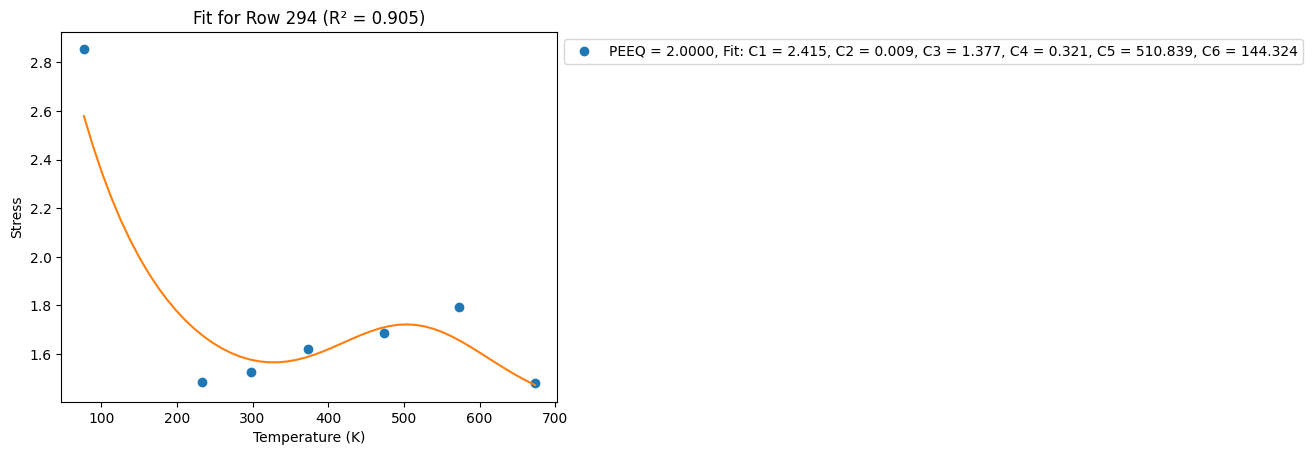

[2.86030982 1.48491906 1.52788288 1.62130389 1.68602127 1.79434252
 1.48027925]


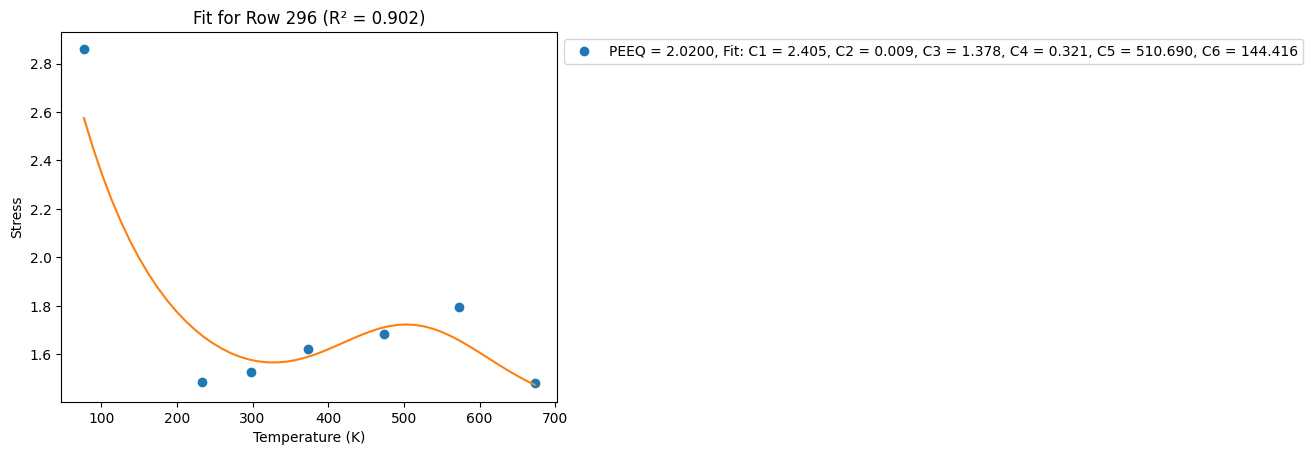

[2.86471827 1.48495415 1.52824108 1.62214264 1.68671904 1.79531349
 1.48104356]


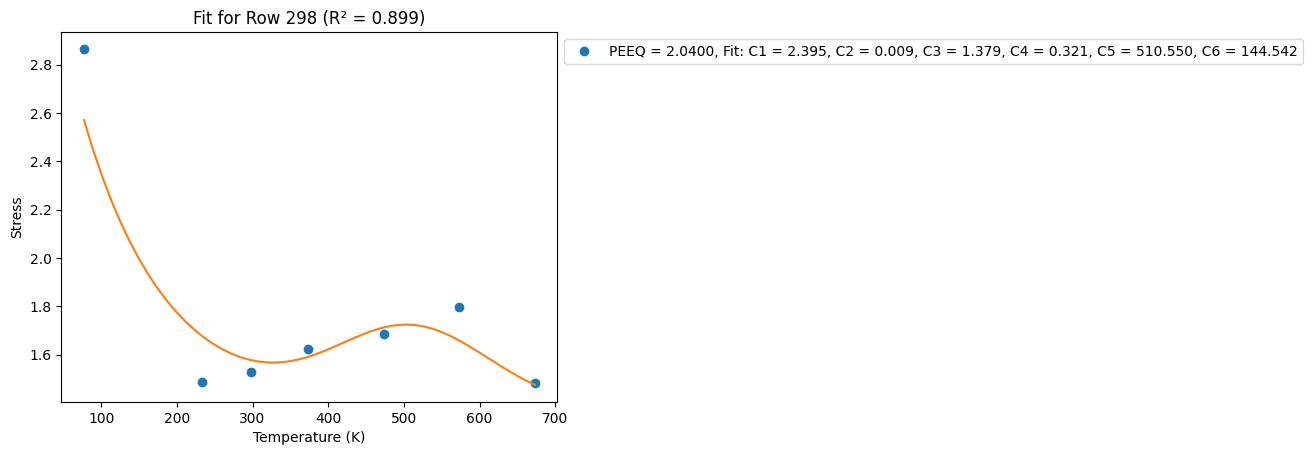

In [5]:
# Temperarute data points
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])

# Temperature function
def f_func(T, cT1, cT2, cT3, cT4, cT5, cT6):
    return cT1*(np.exp(-cT2*T))+cT3+cT4*(np.exp(-((T-cT5)/cT6)**2))

for j, i in enumerate(np.arange(0,300,2)):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6] = fitted_para.iloc[i, 1:]
    y = stress_data.iloc[i, 8:].values
    print(y)
    gaussian_fit = f_func(T_fit, C1, C2, C3, C4, C5, C6)

    # Calculate residuals for error estimation
    residuals = y - f_func(T, C1, C2, C3, C4, C5, C6)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, y, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
else:
    str(0)